## Notebook to plot overview Graph of  BIC for every Subject and Target Position for 2-Handed condition

In [1]:
import errno  # handy system and path functions
import glob
import locale
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import os

import pandas as pd
import sys  # to get file system encoding
import scipy.linalg
from scipy import signal
from scipy import stats
import seaborn as sns
from sklearn import preprocessing


# set Matplotlib parameters globally
params = {'legend.fontsize': 12,
          'legend.handlelength': 2,
         'figure.autolayout': True,
         'font.serif' : 'Ubuntu',
         'font.family' : 'serif',
         'font.monospace' : 'Ubuntu Mono',
         'font.size' : 12,
         'axes.labelsize' : 18,
         'axes.titlesize' : 20,
         'xtick.labelsize' : 20,
         'ytick.labelsize' : 20,
         'figure.titlesize' : 12,
         'figure.dpi' : 300}

rcParams.update(params)


# set Seaborn parameters globally
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/michael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# define color palettes for later plotting
blues = sns.color_palette("PuBu", 11)
reds = sns.color_palette("OrRd", 11)
greens = sns.color_palette("BuGn", 11)
purples = sns.cubehelix_palette(11)

sub-07
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


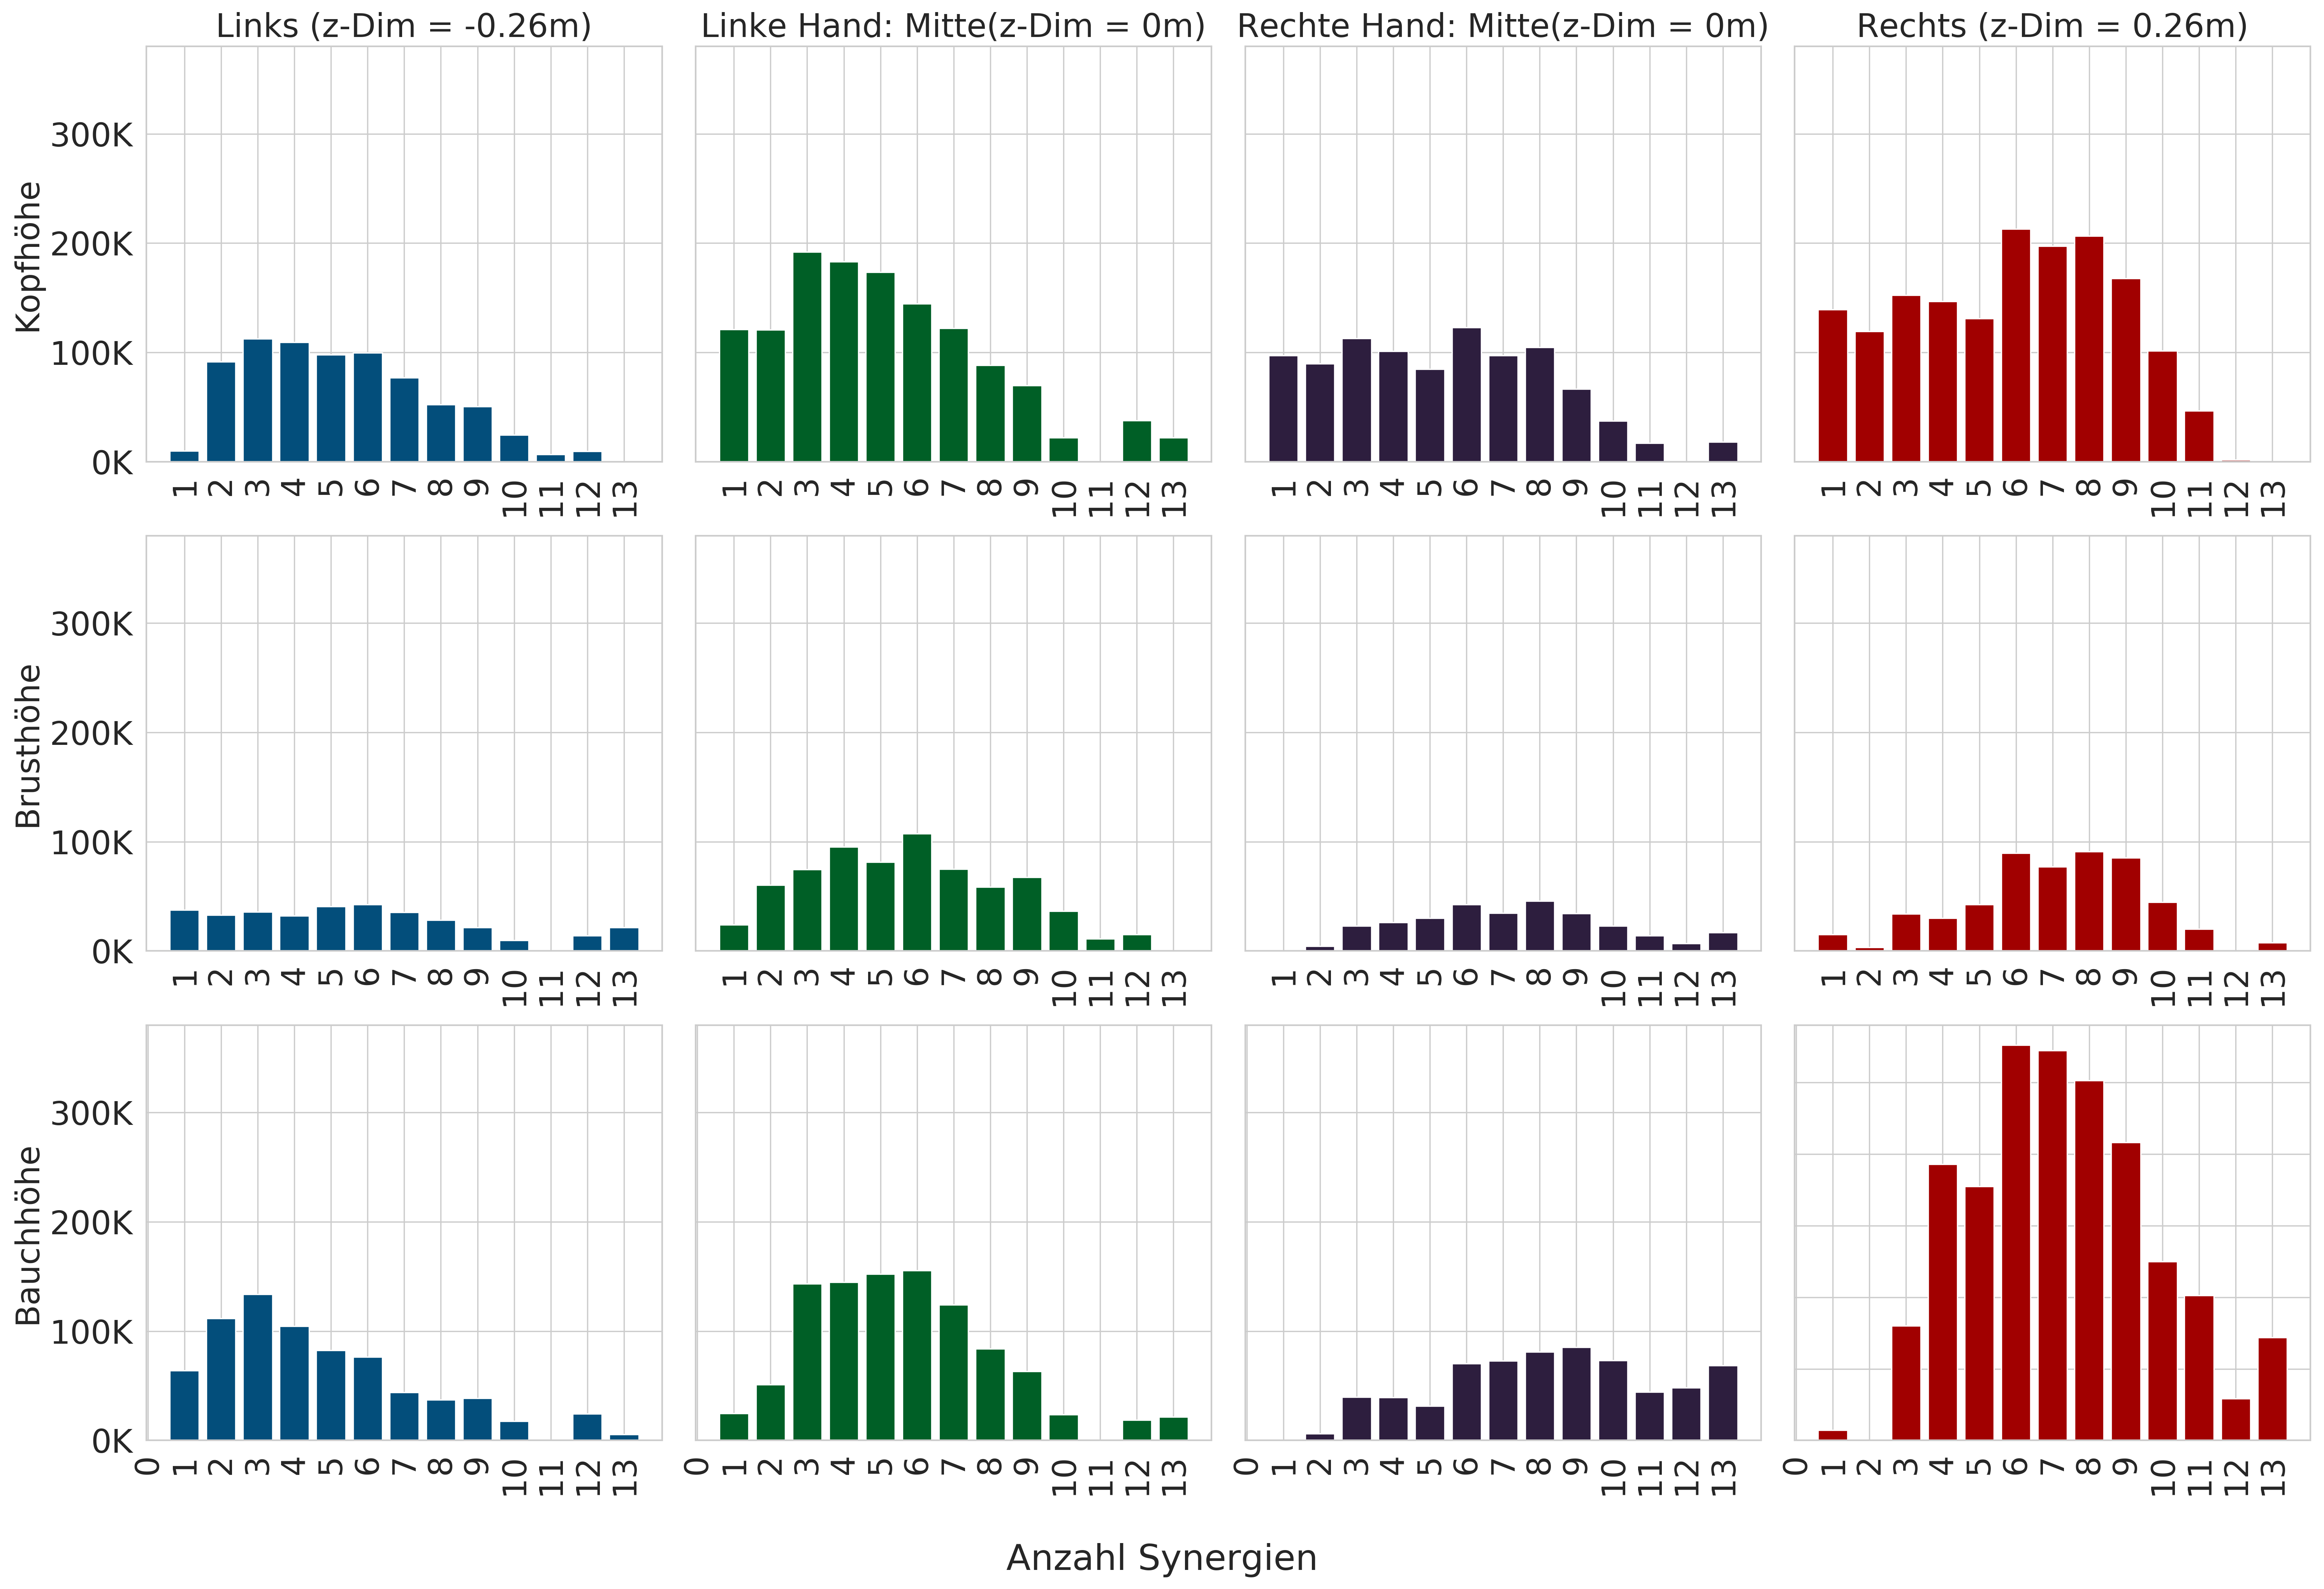

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


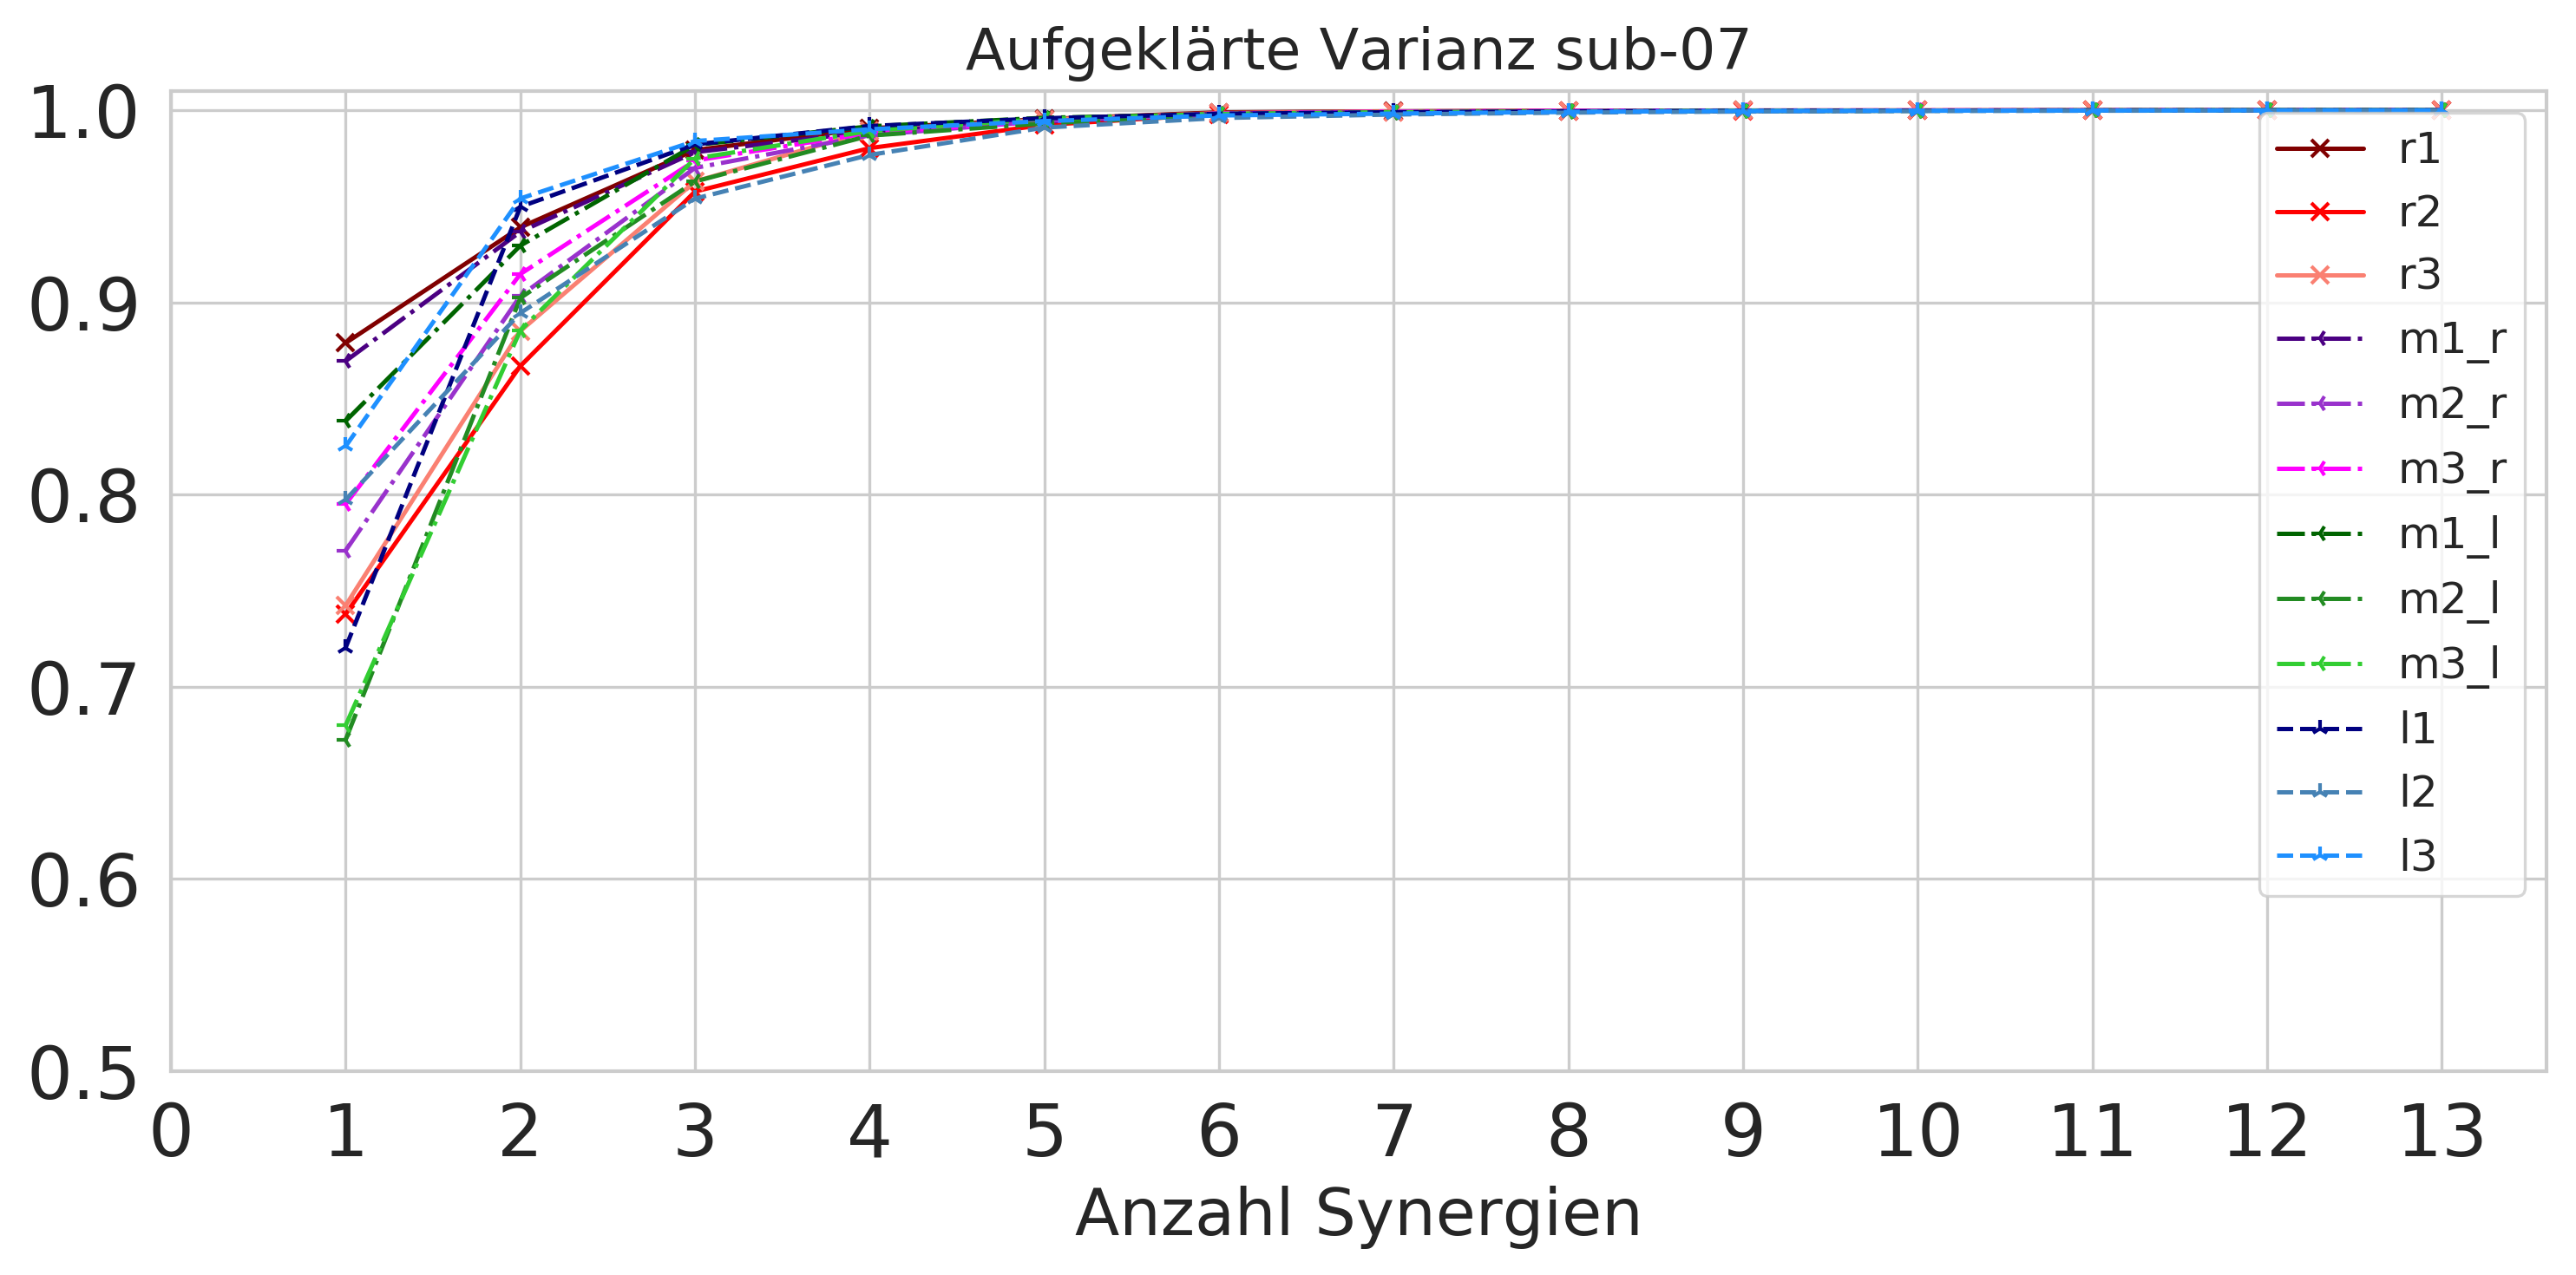

Subject Done!!
sub-01
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


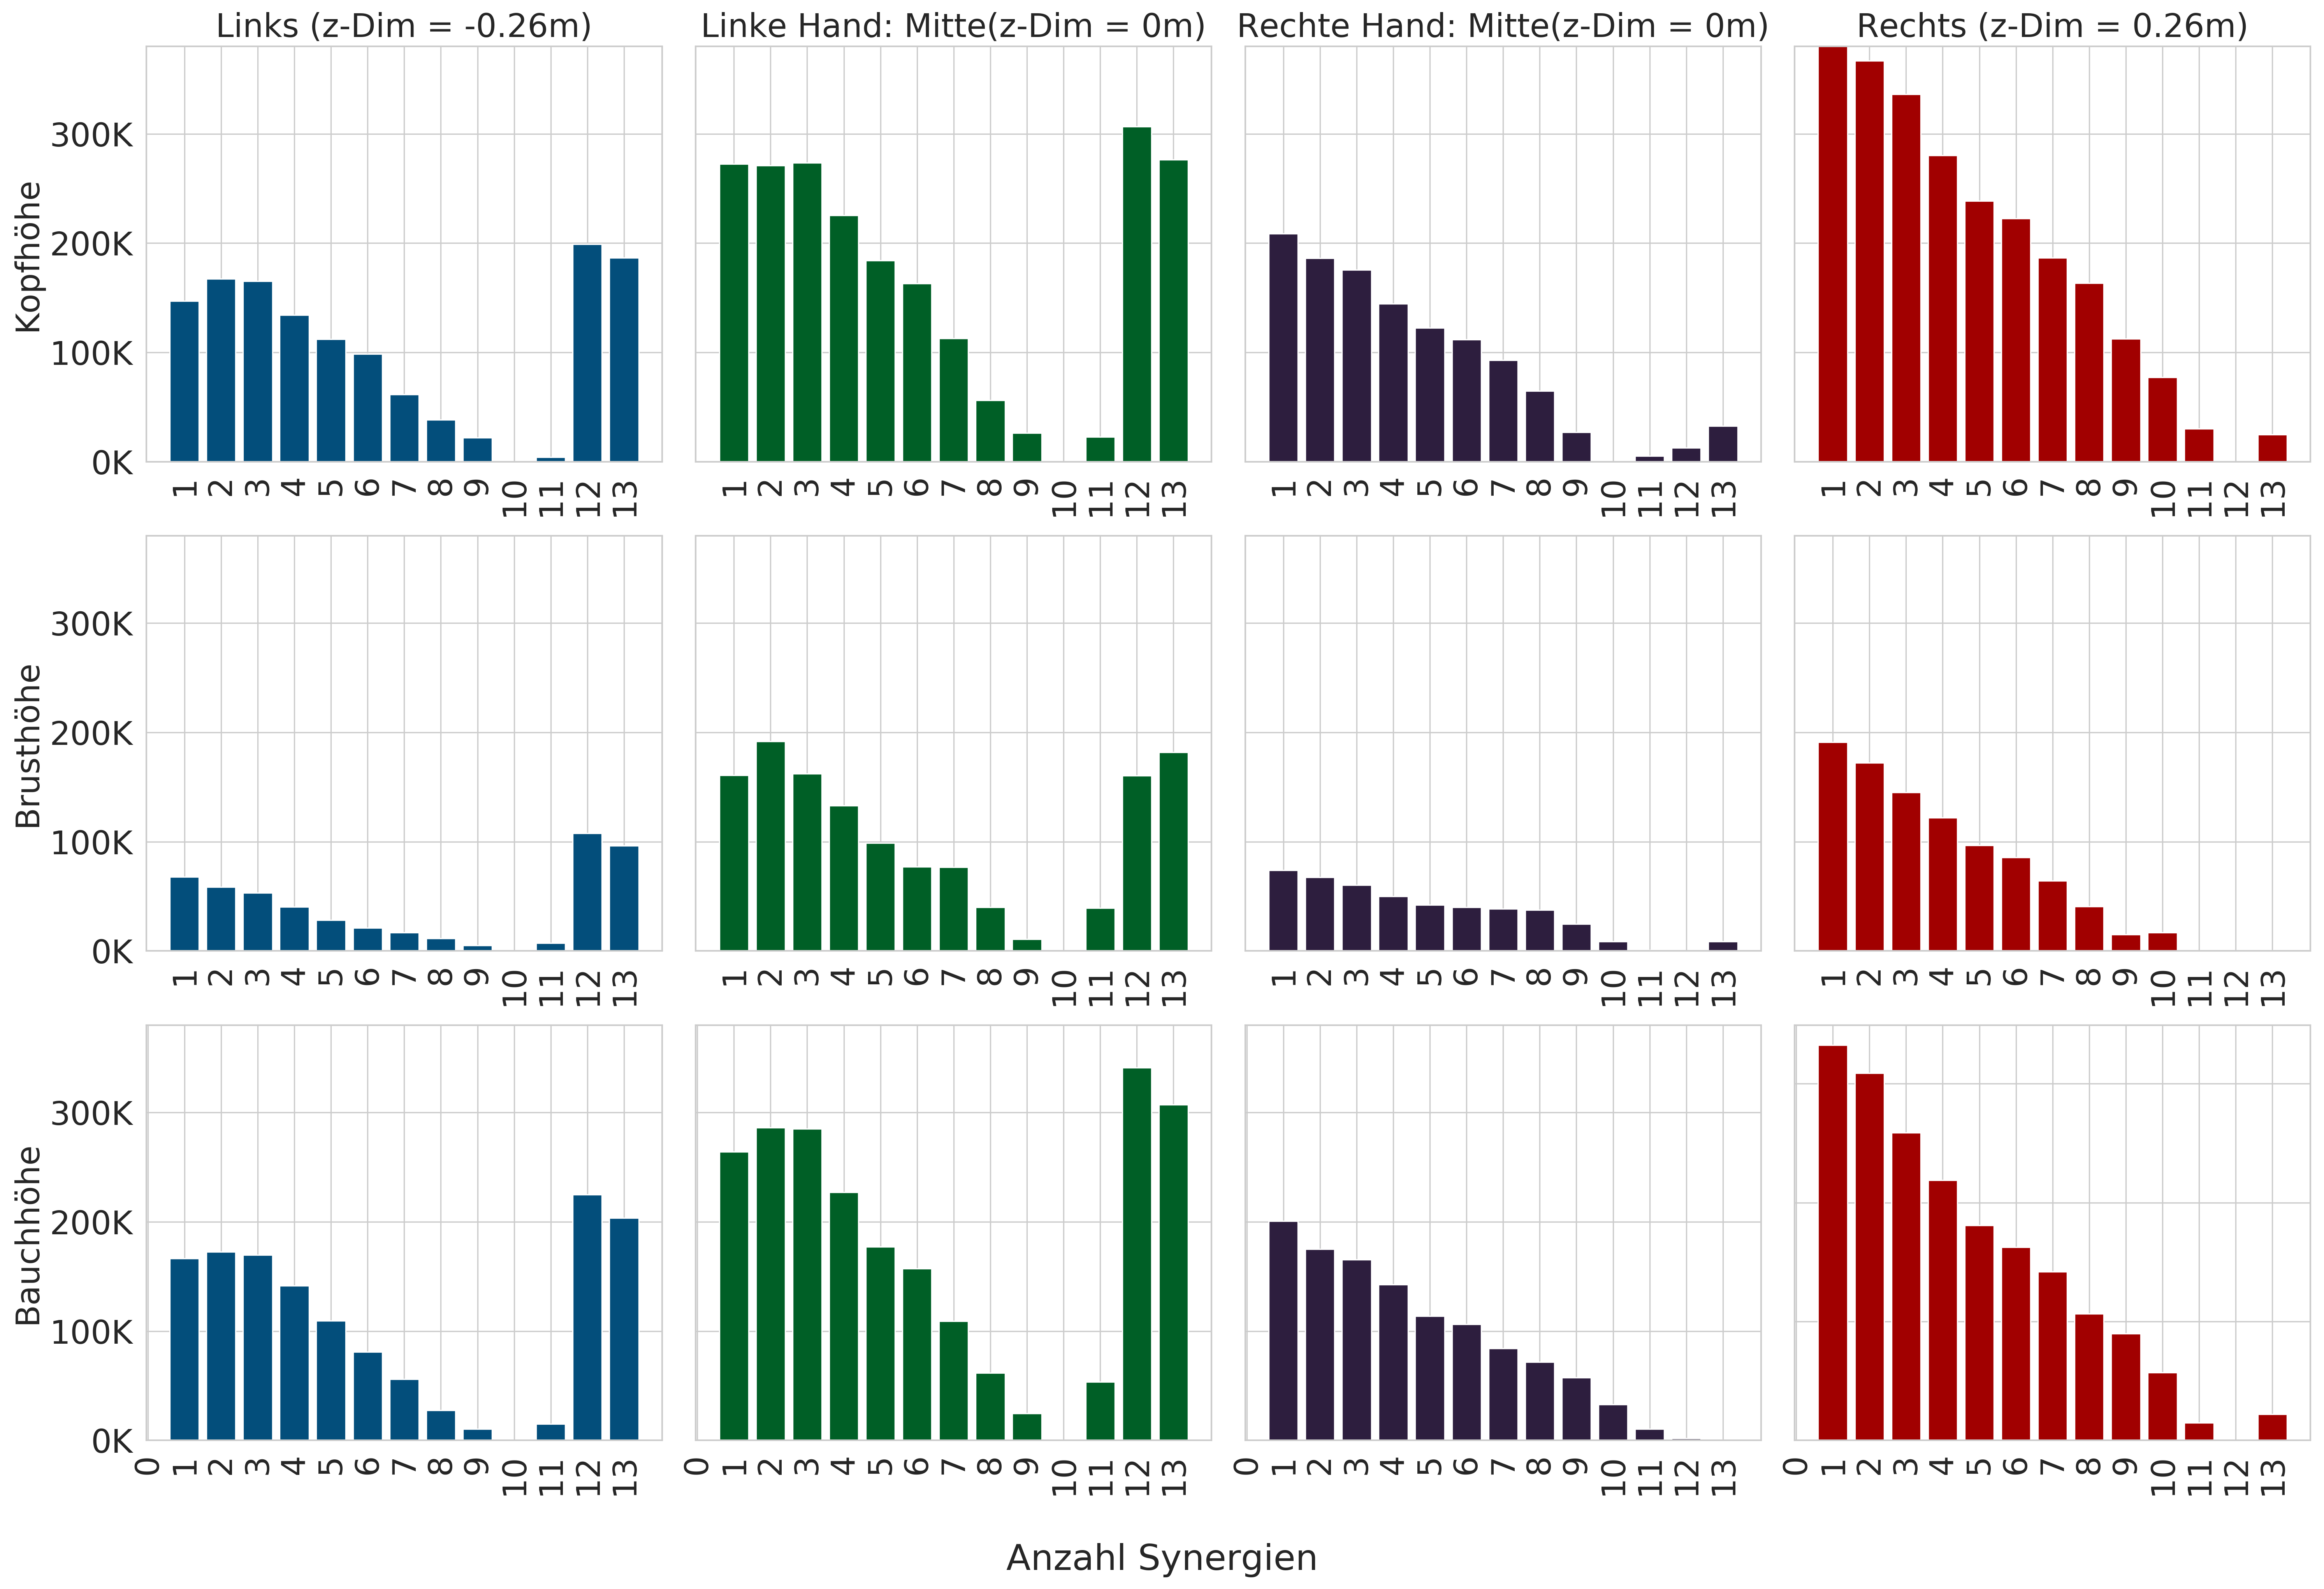

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


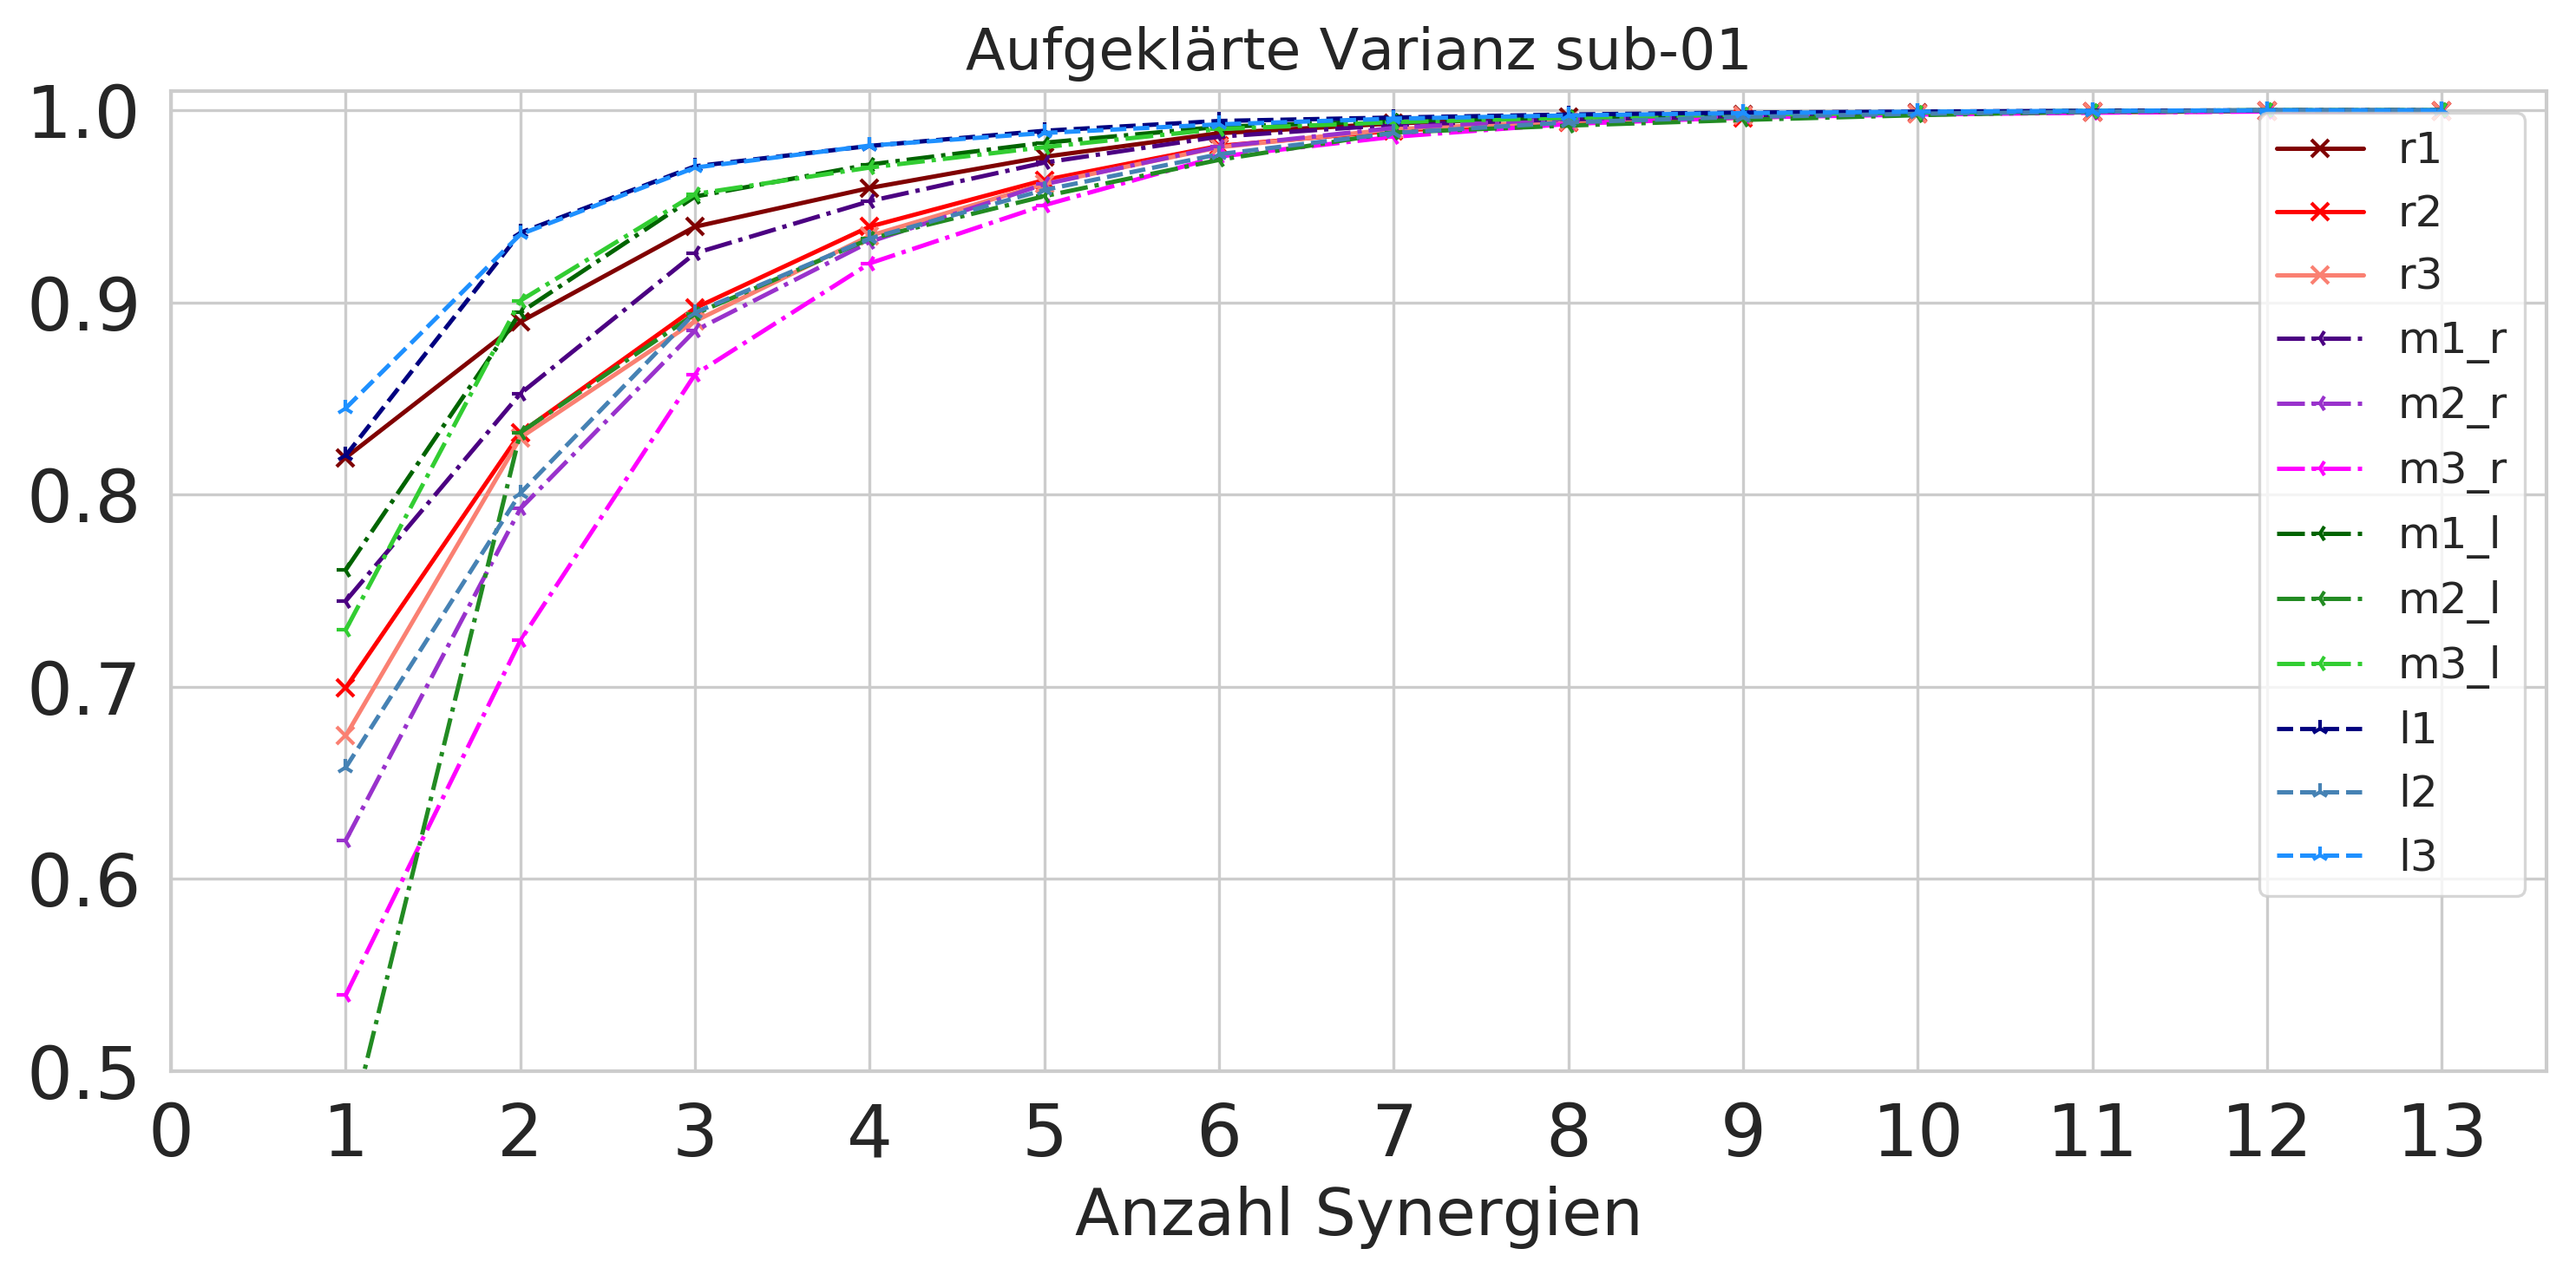

Subject Done!!
sub-05
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


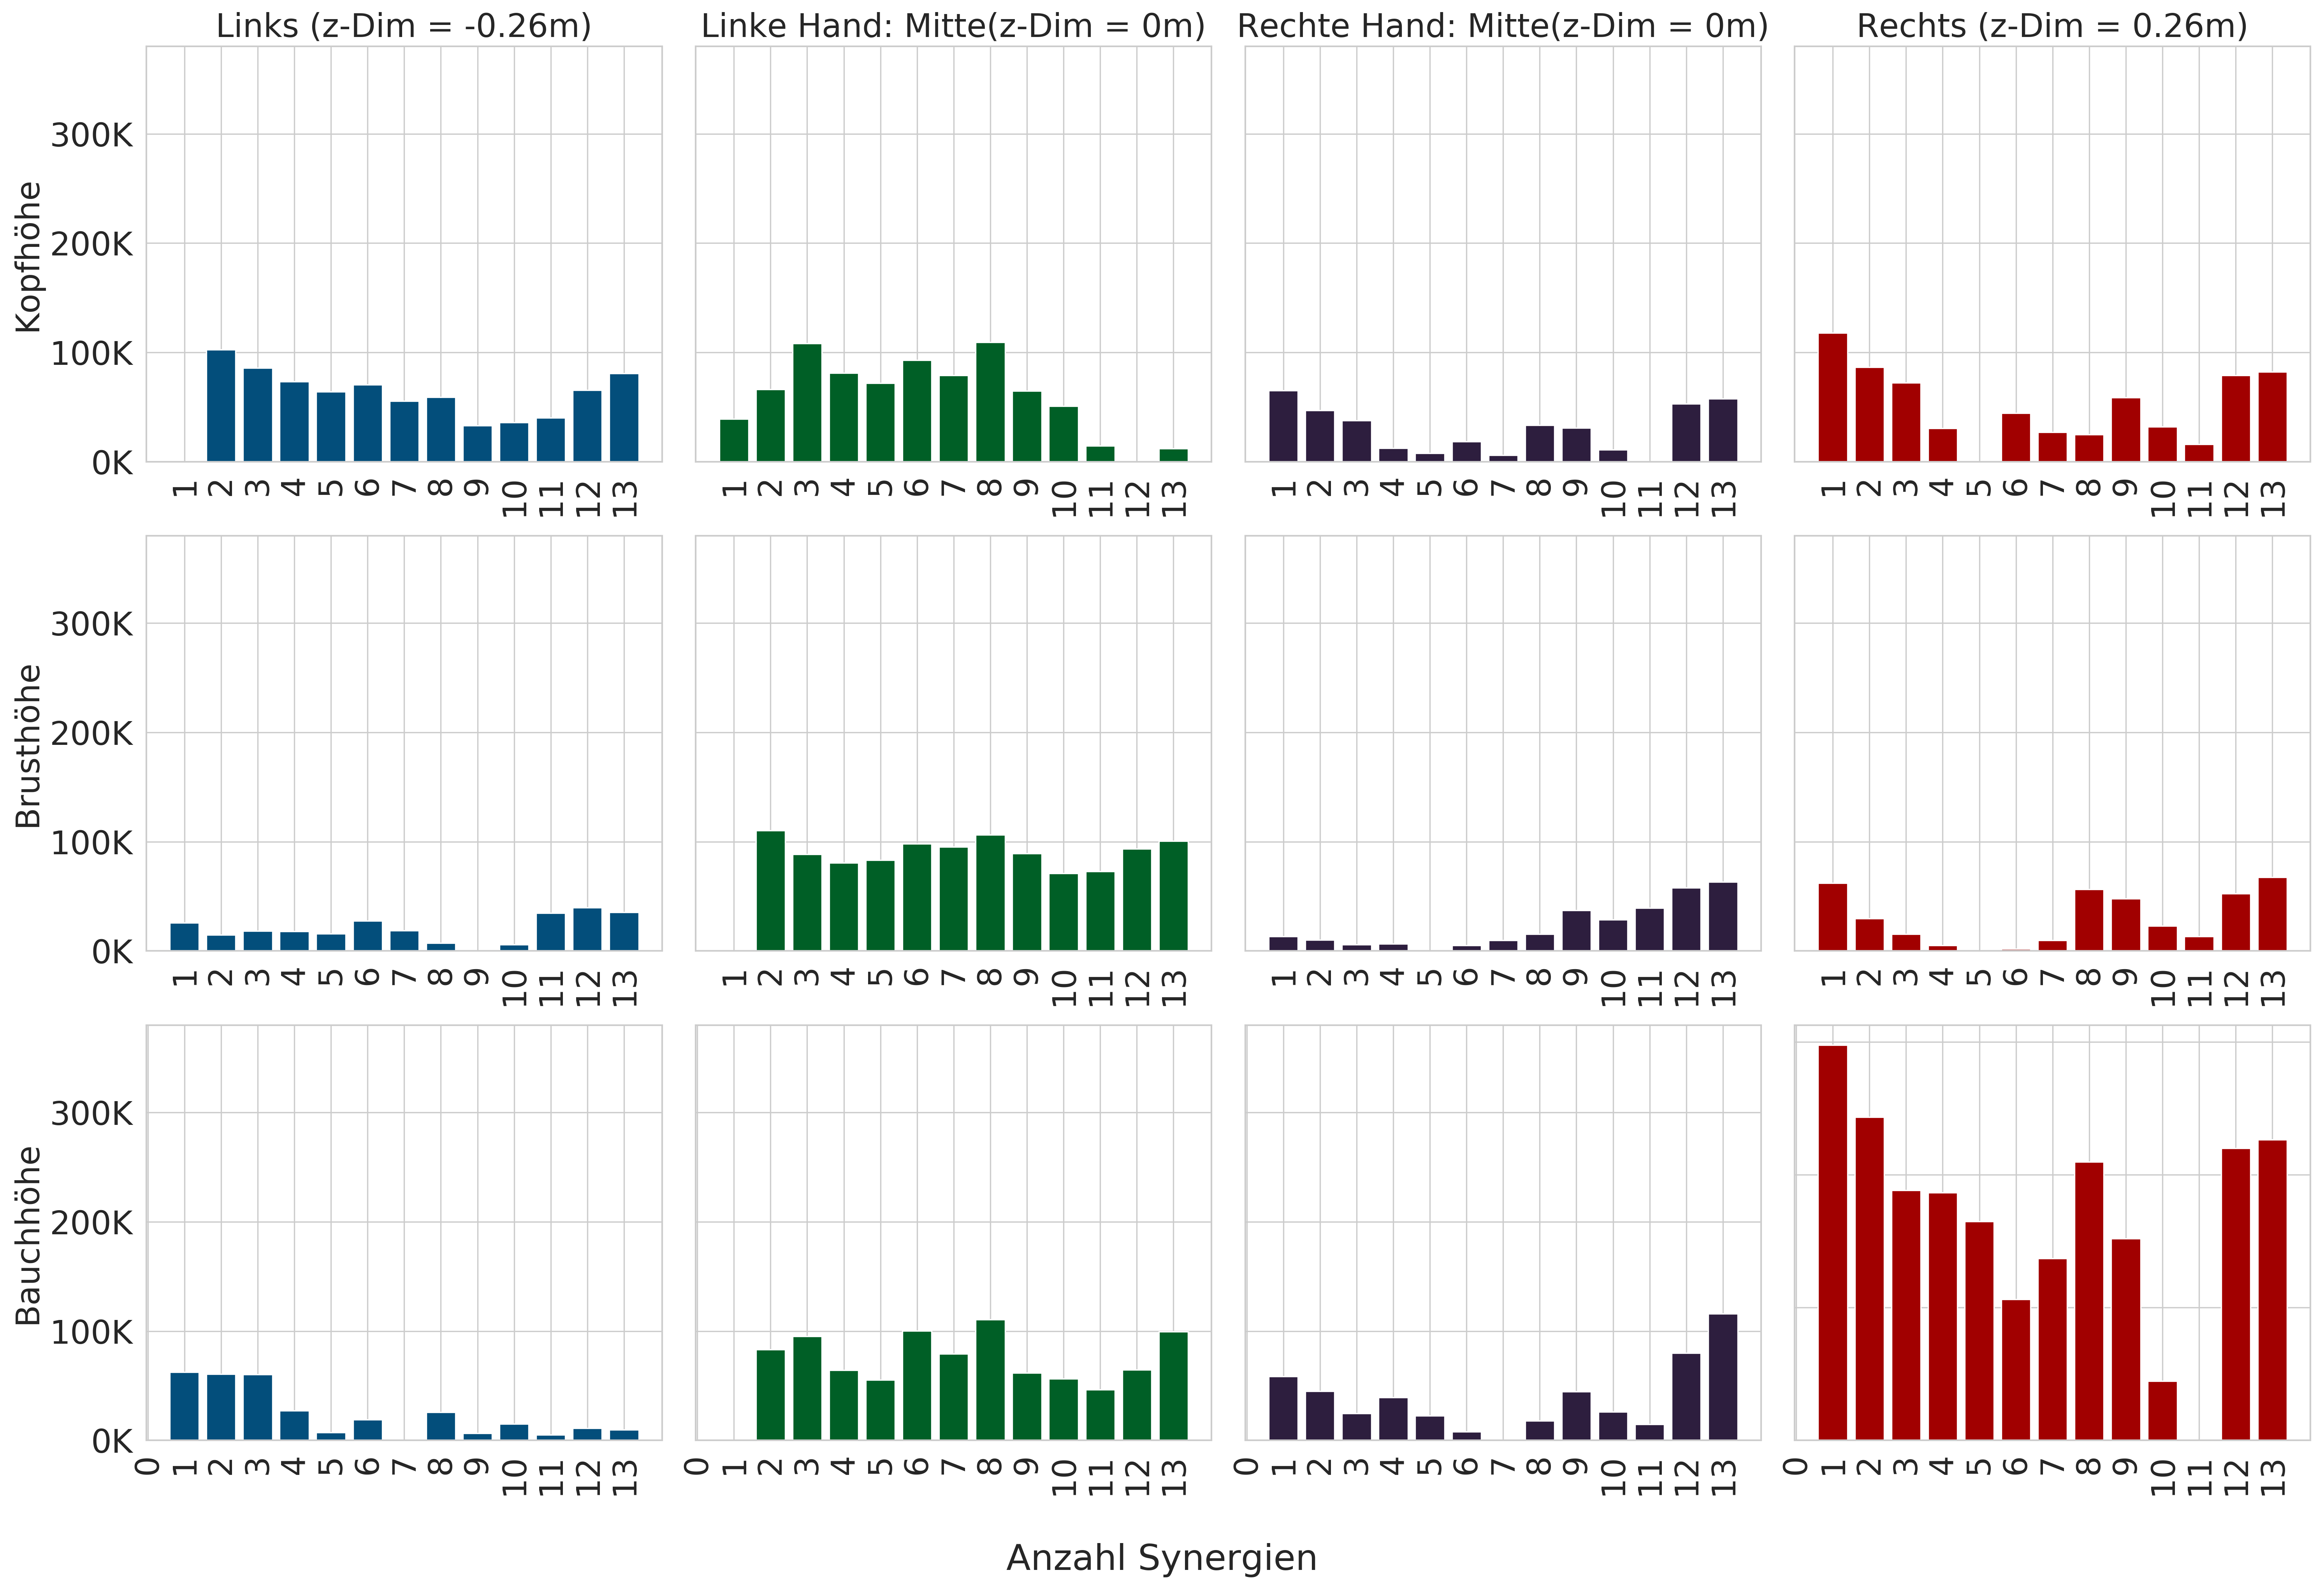

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


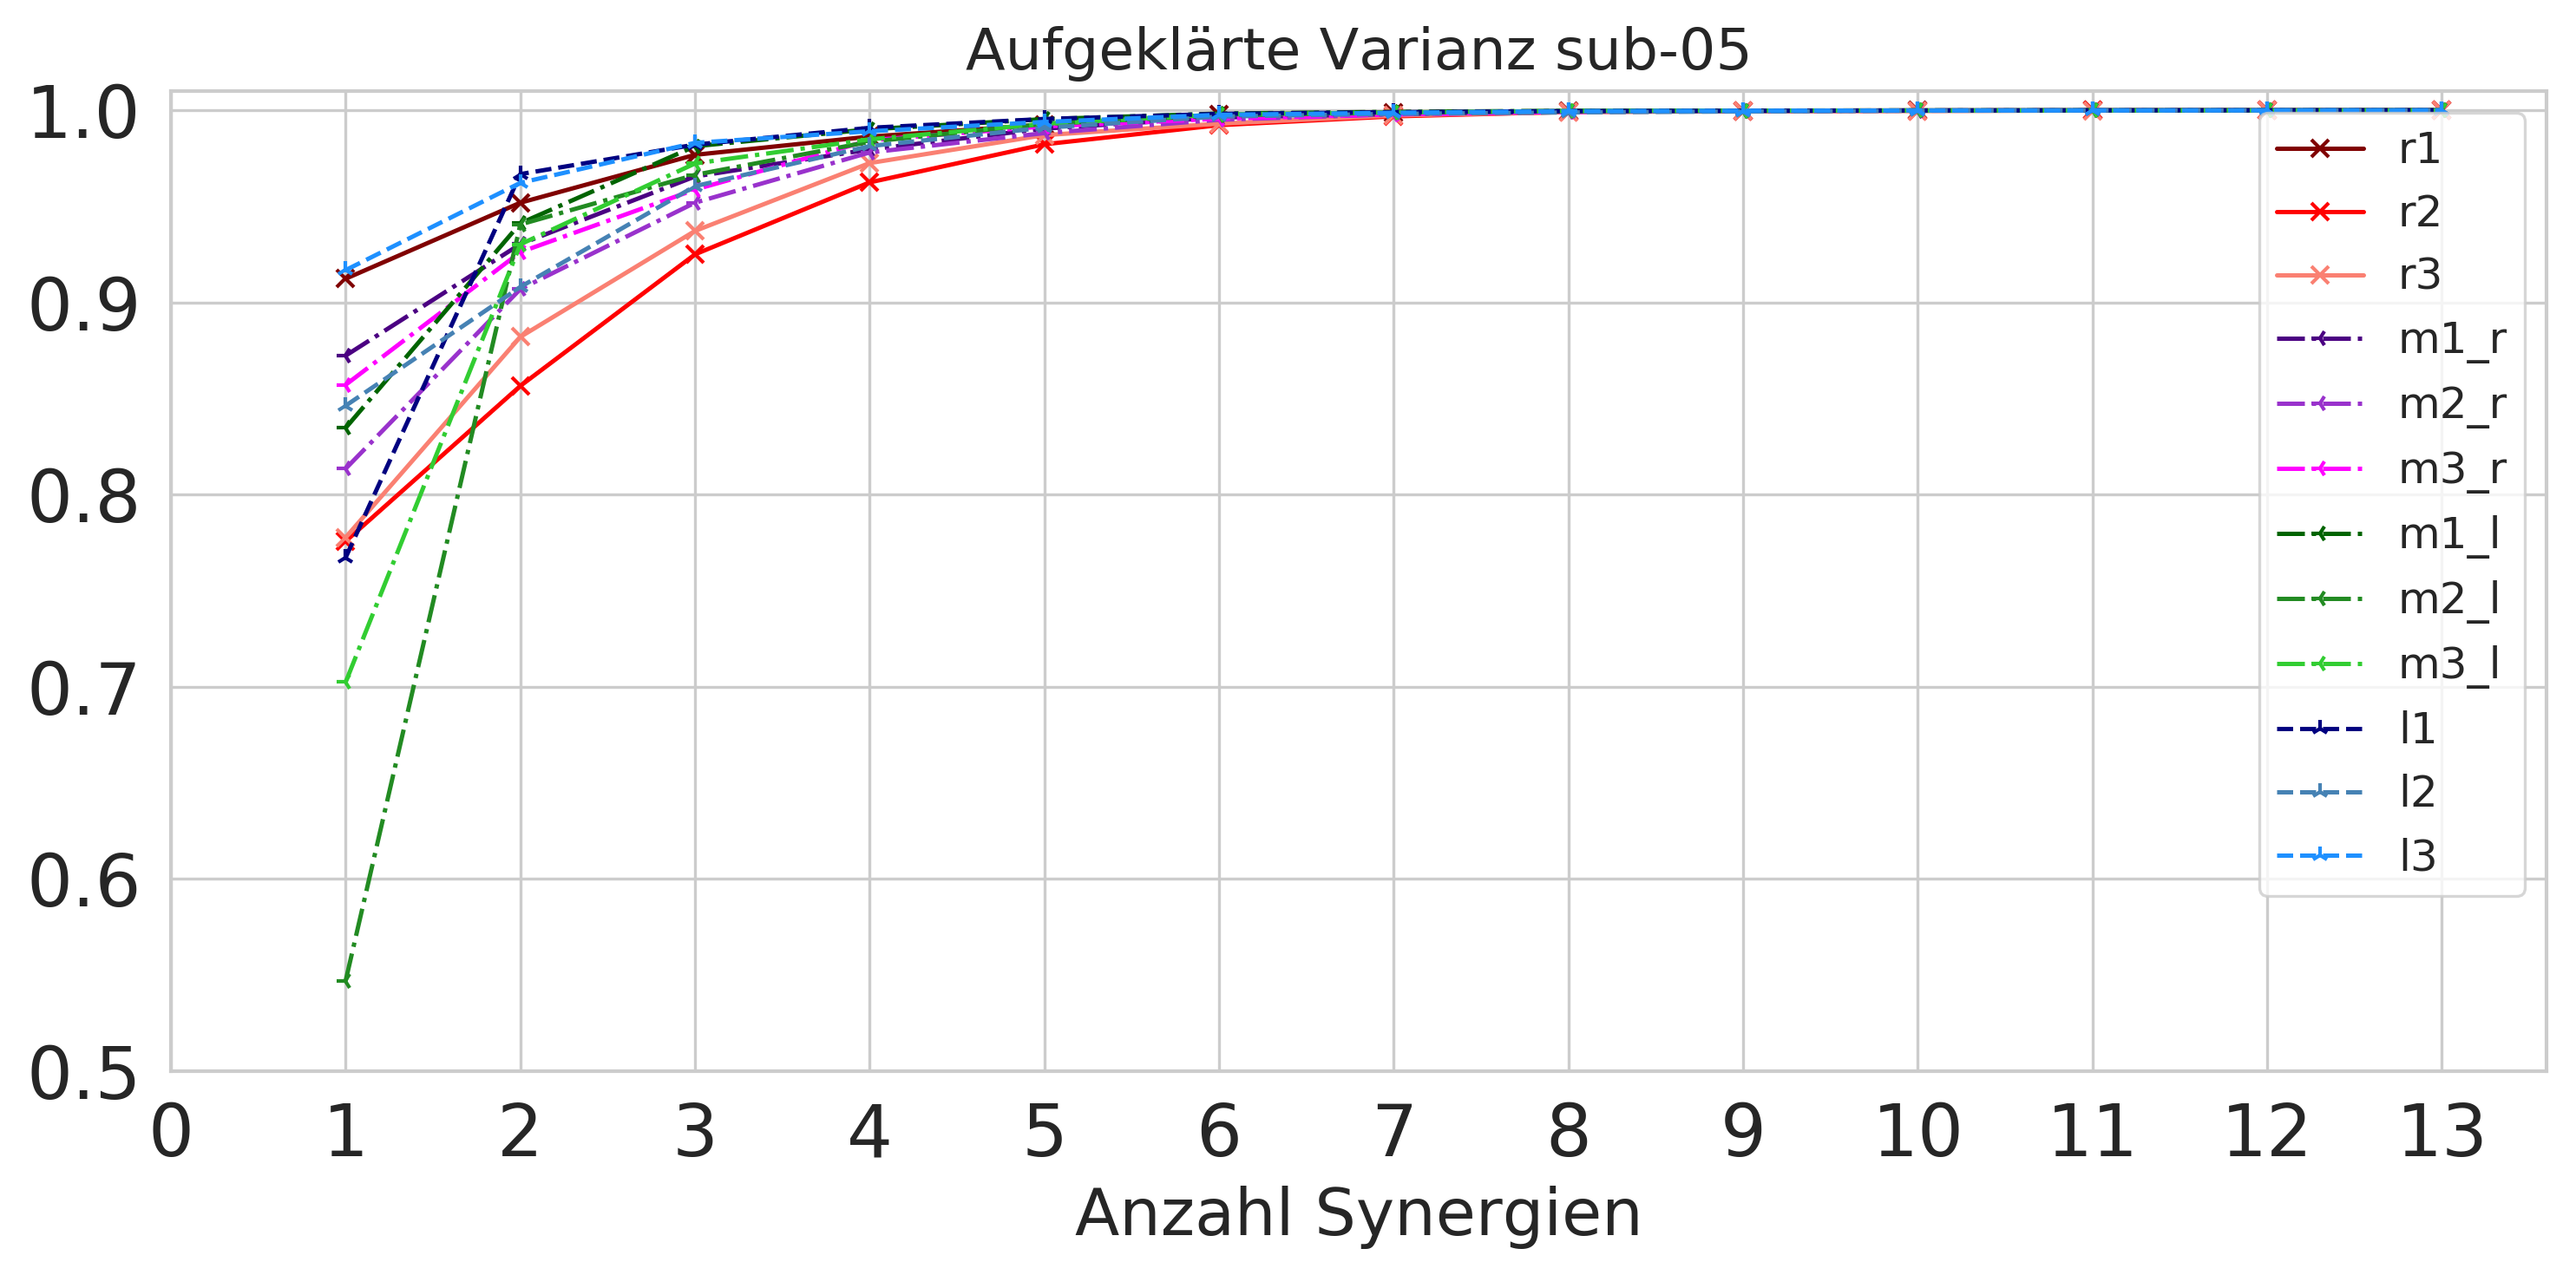

Subject Done!!
sub-06
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


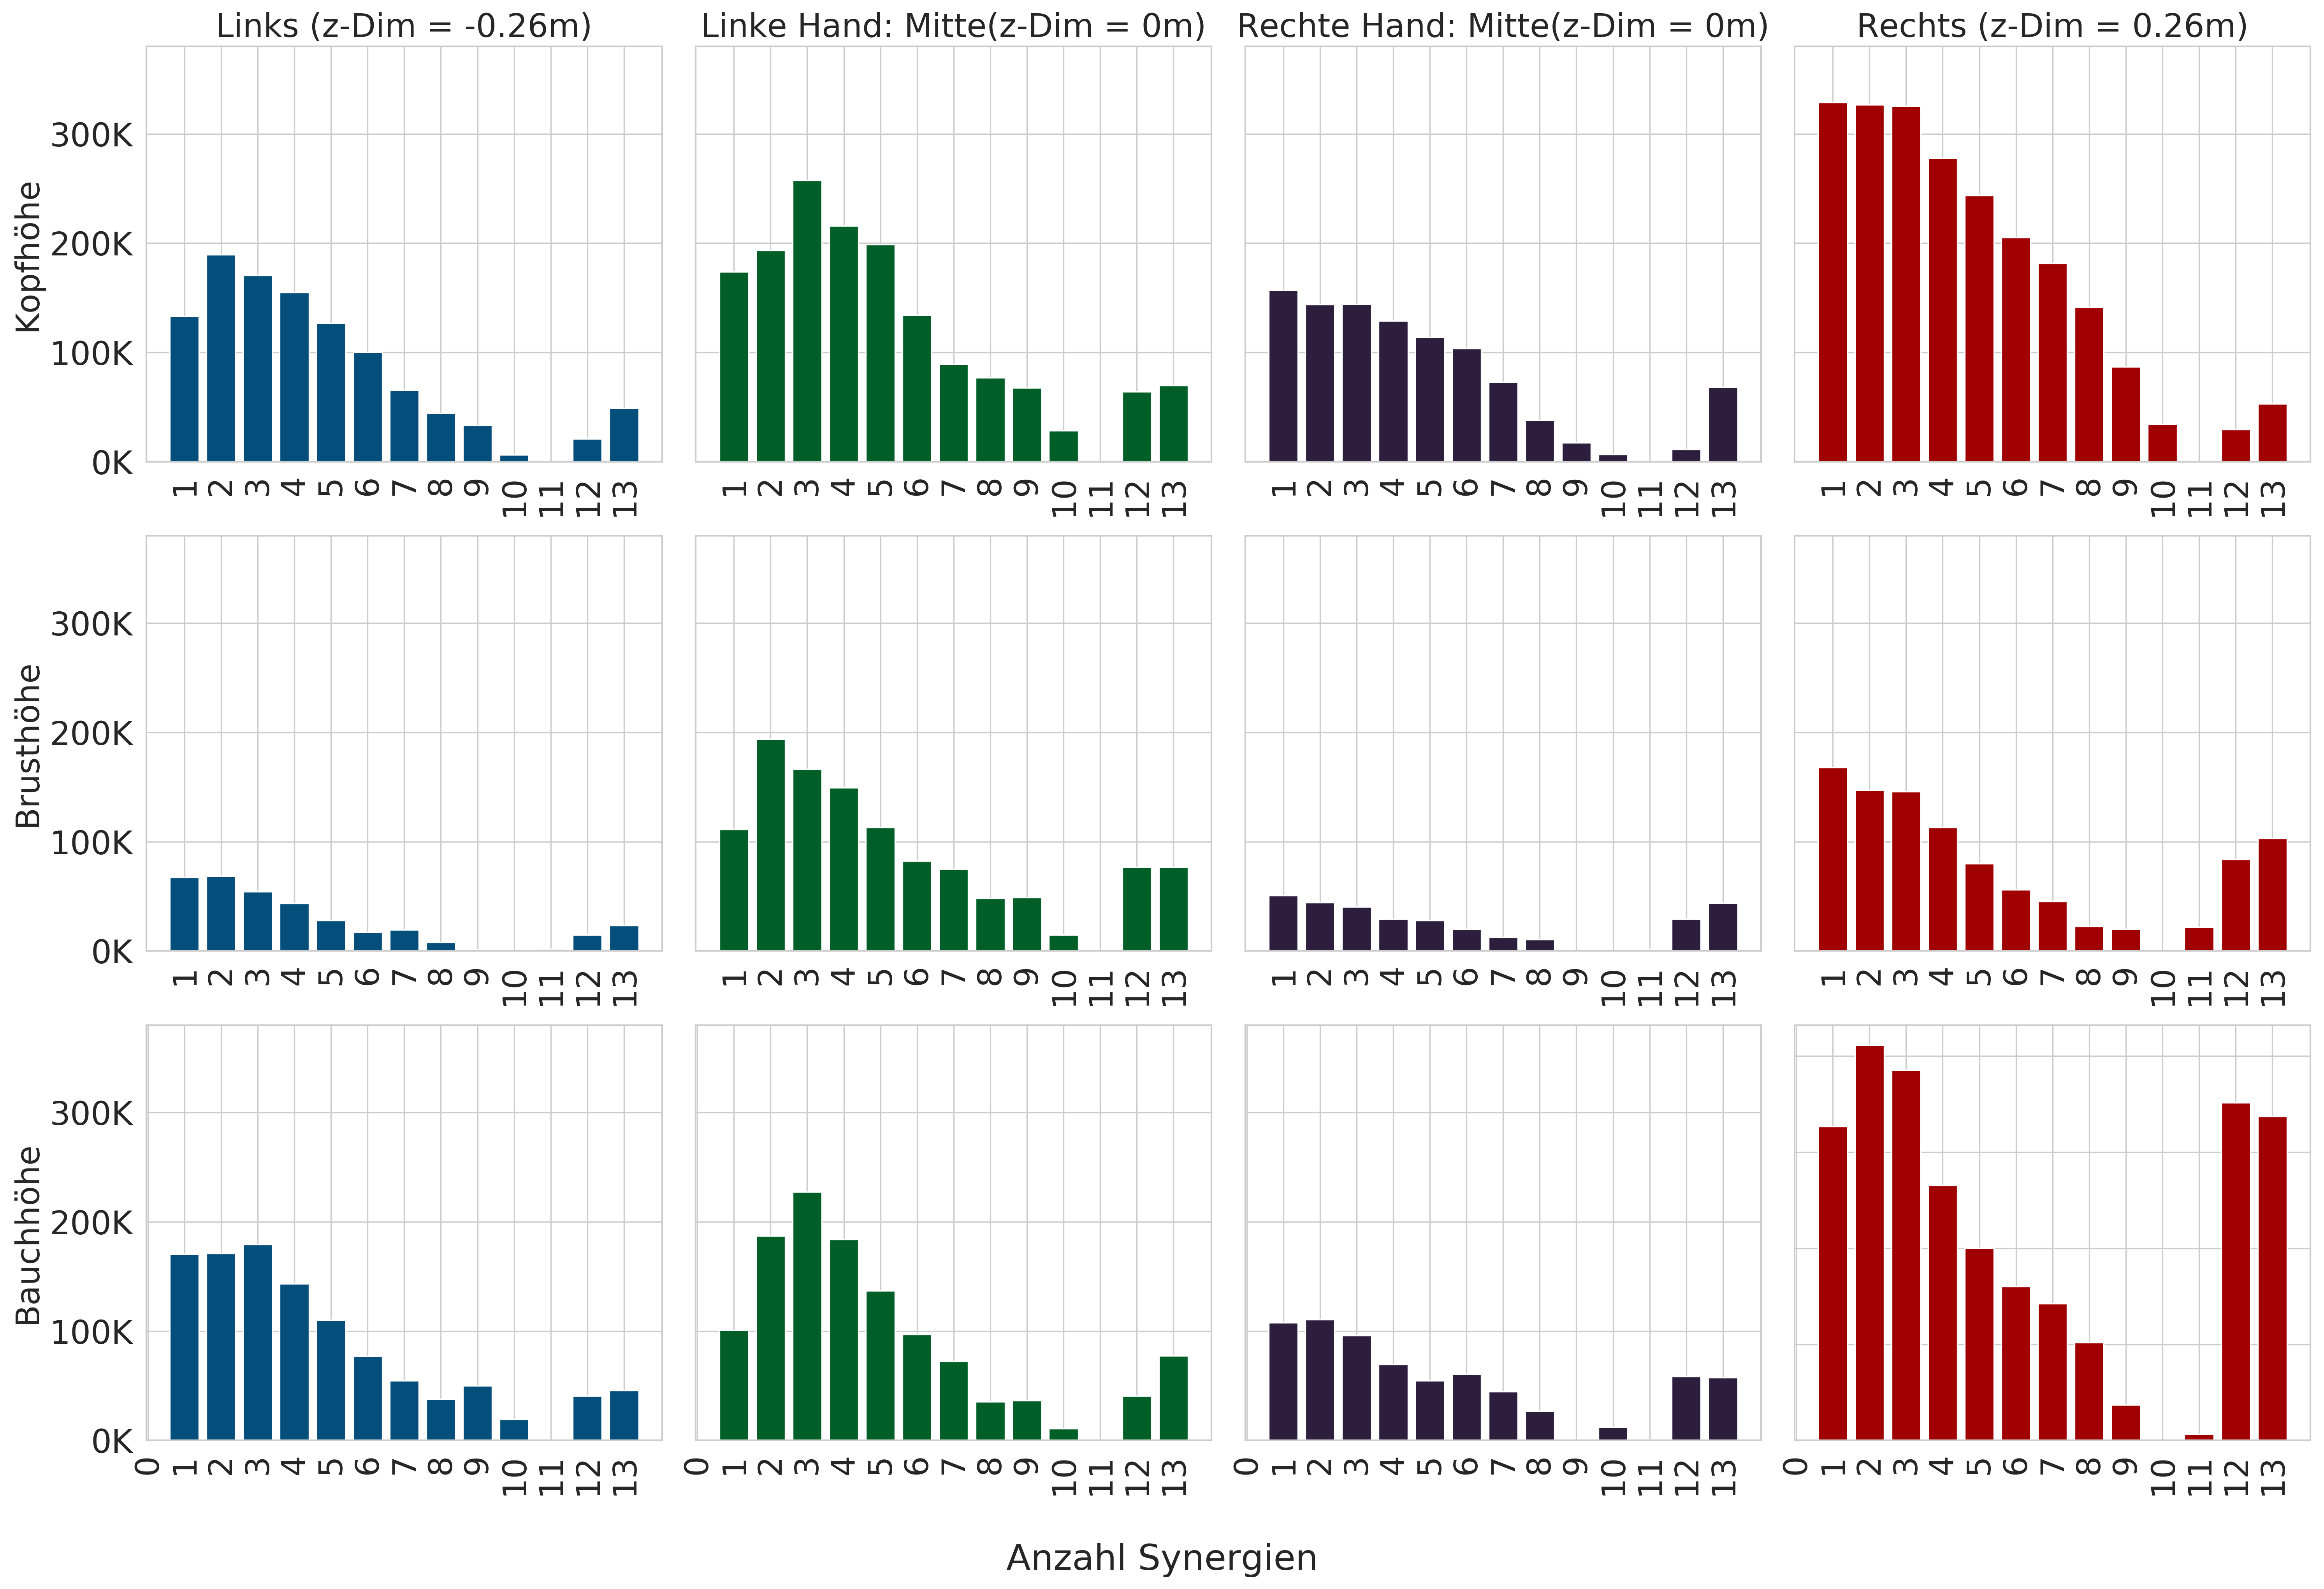

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


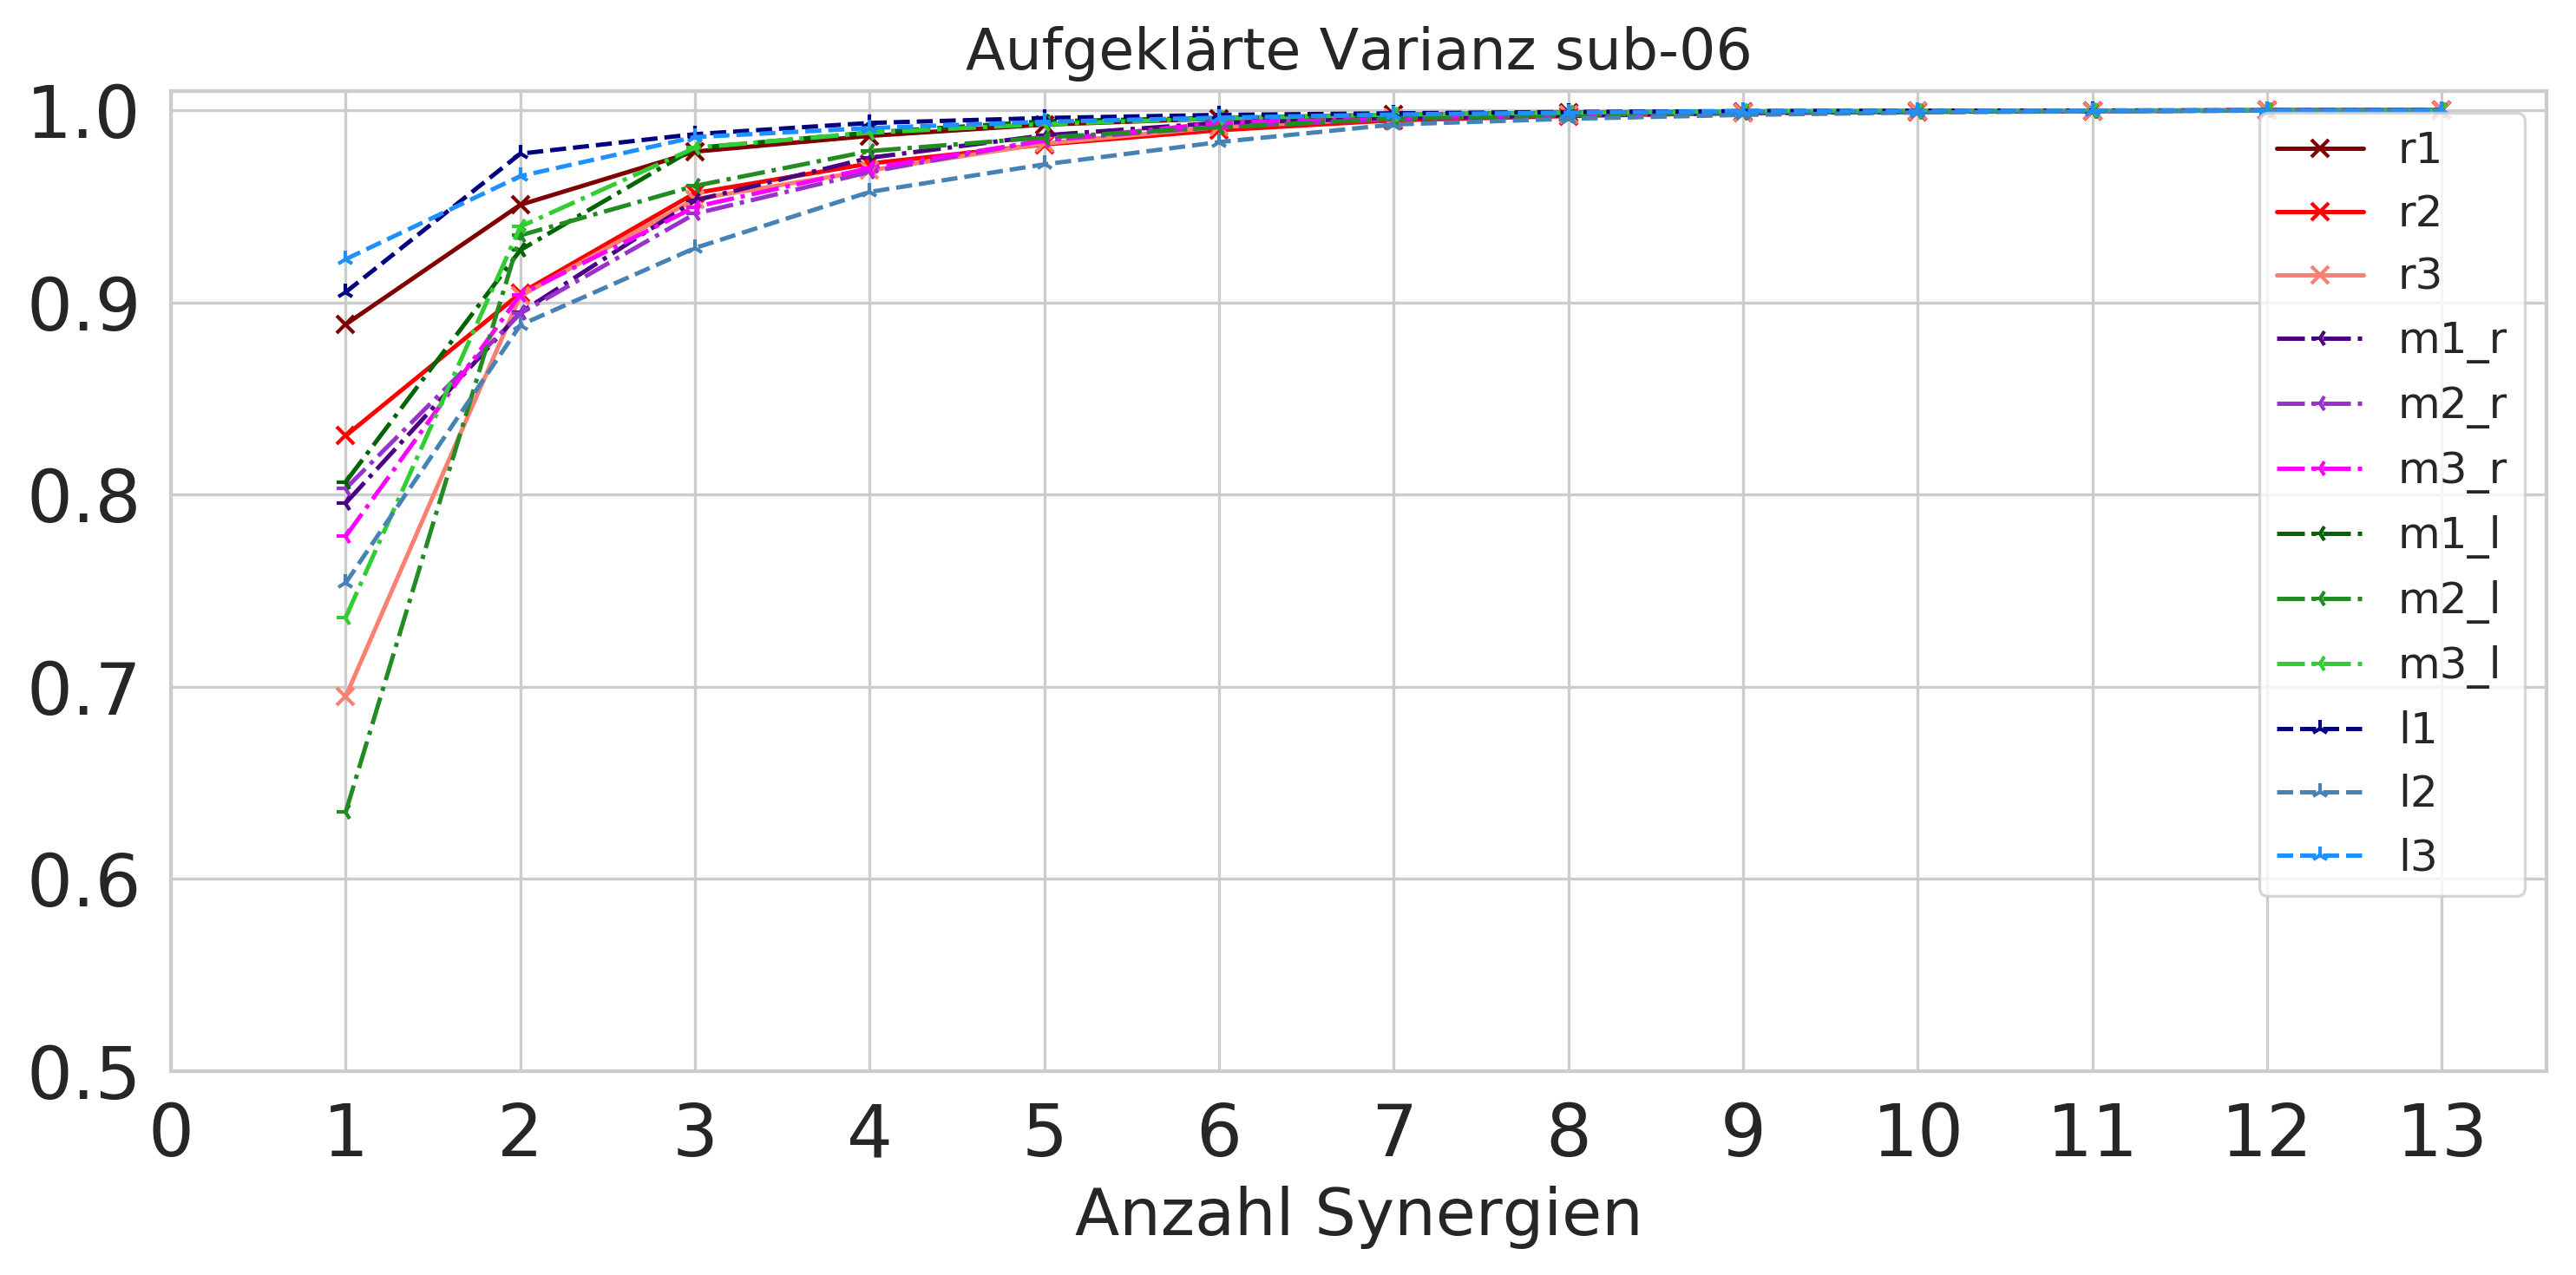

Subject Done!!
sub-12
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


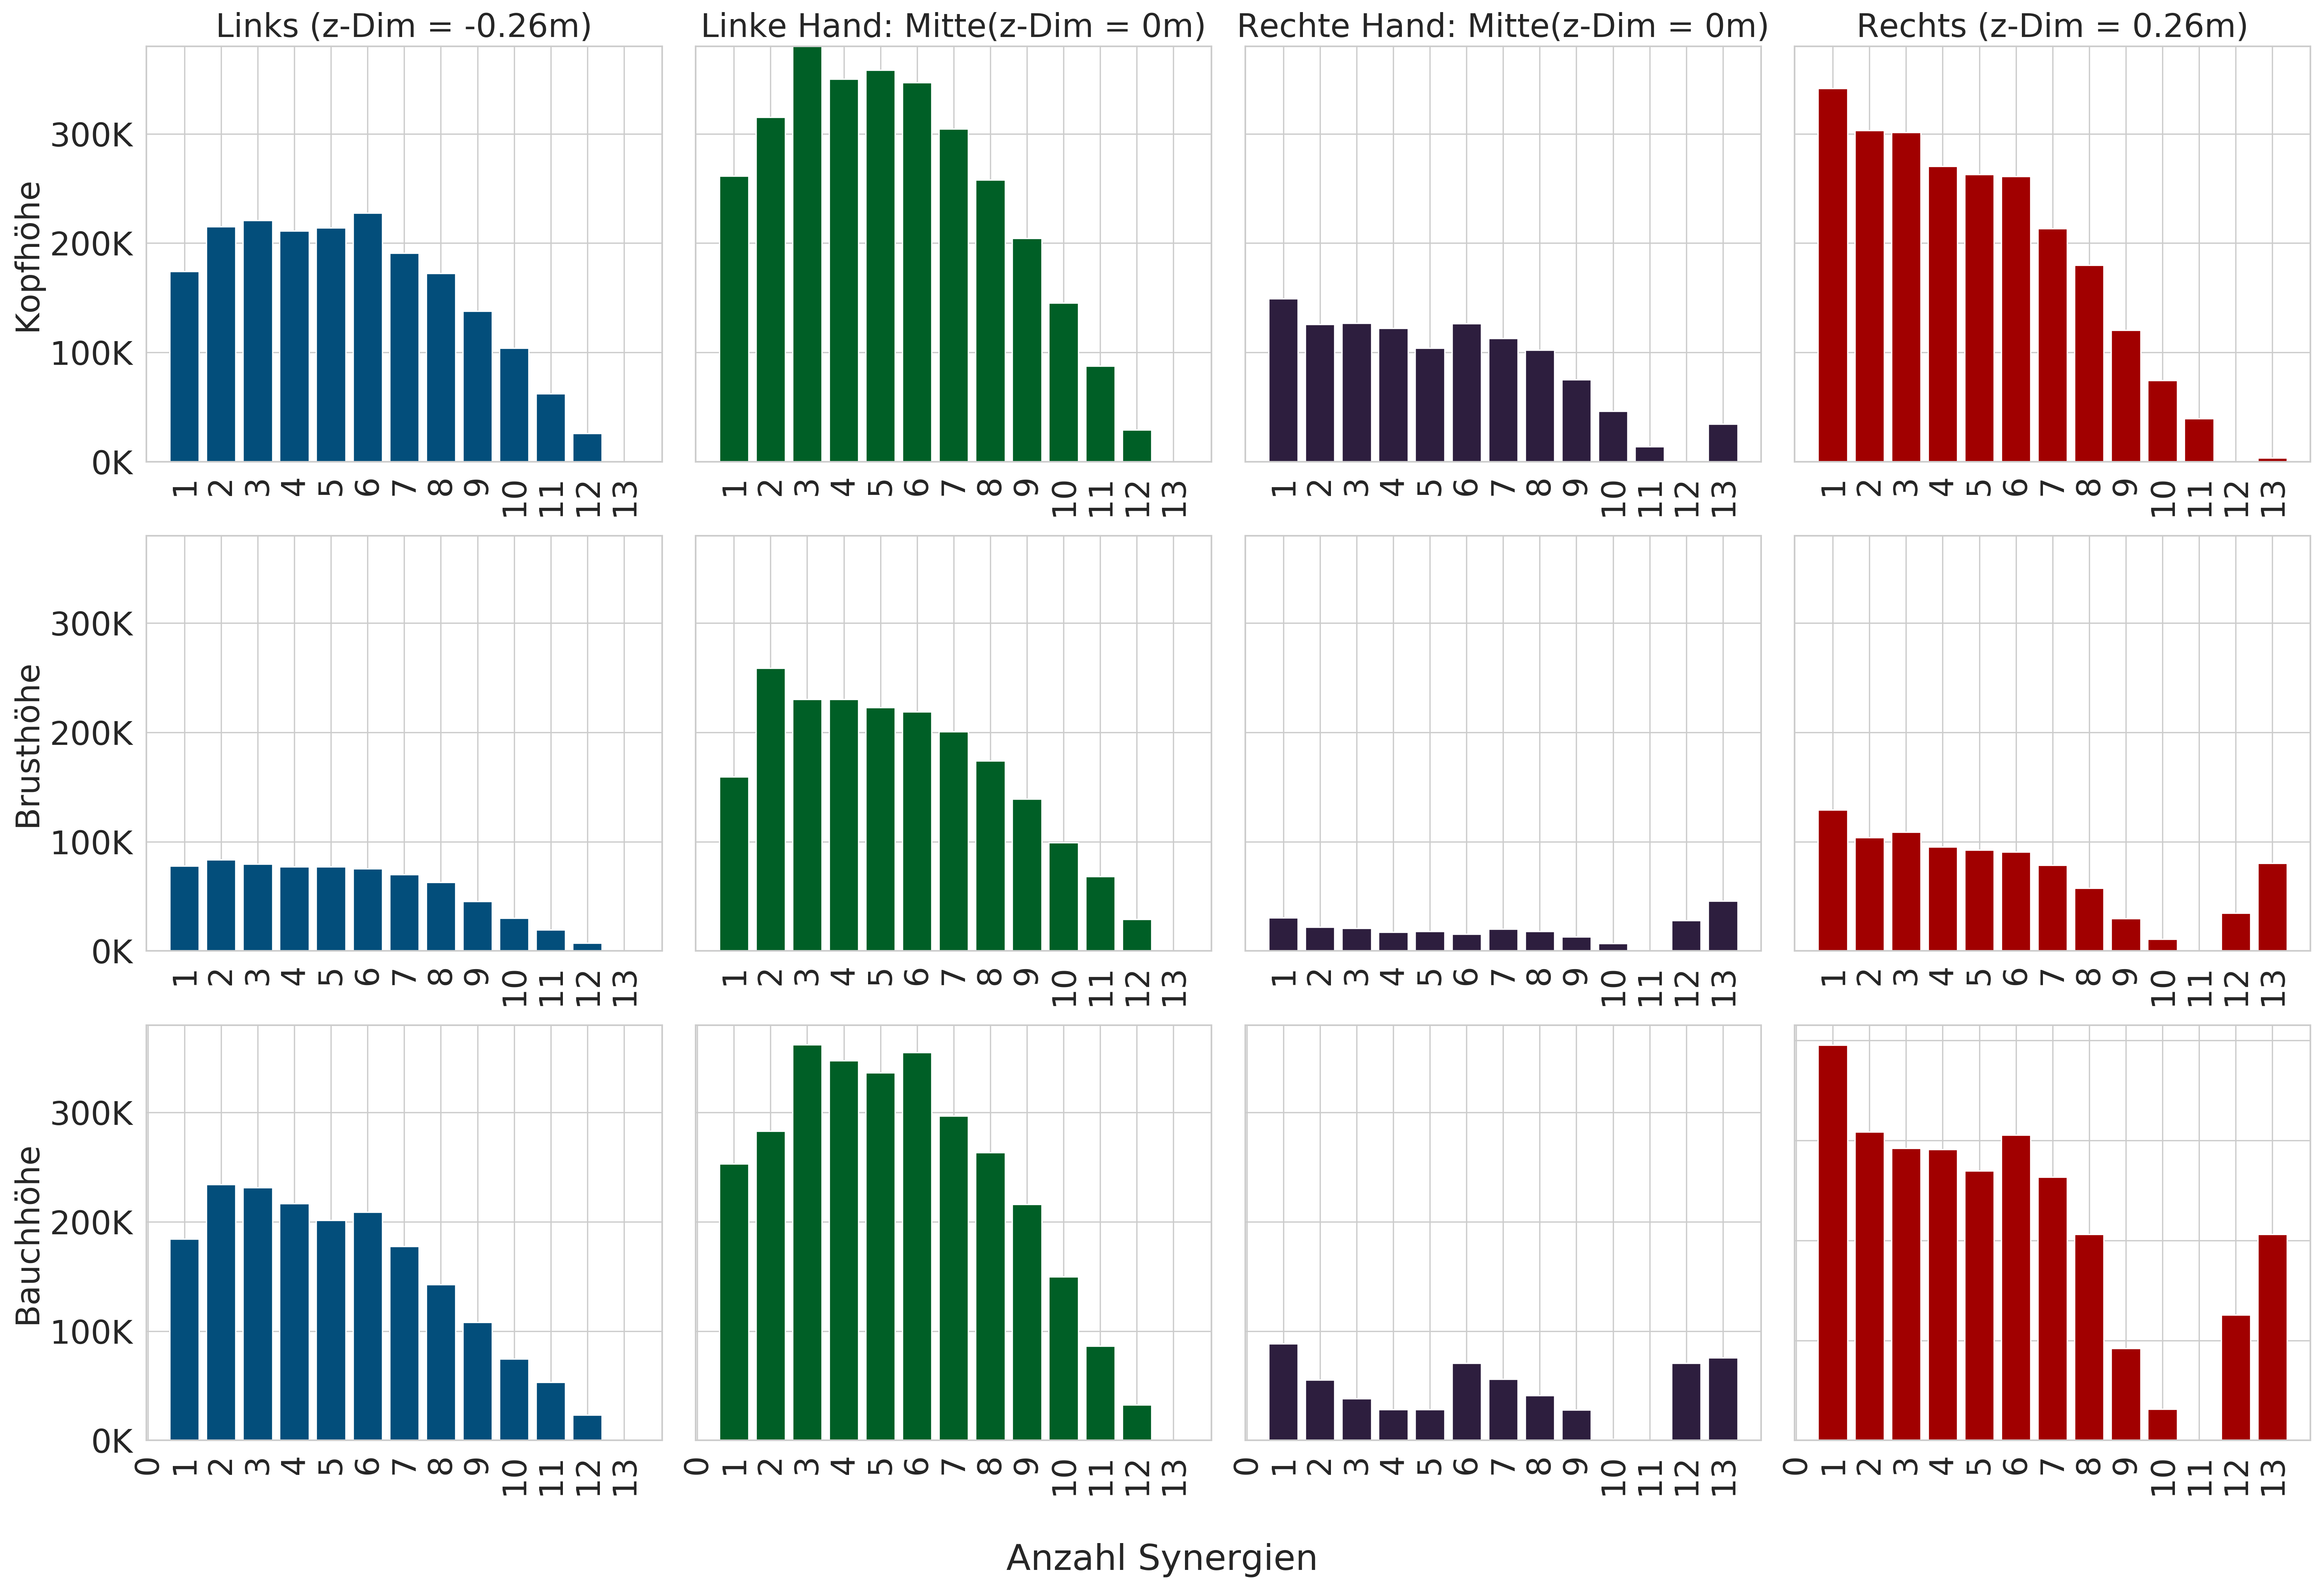

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


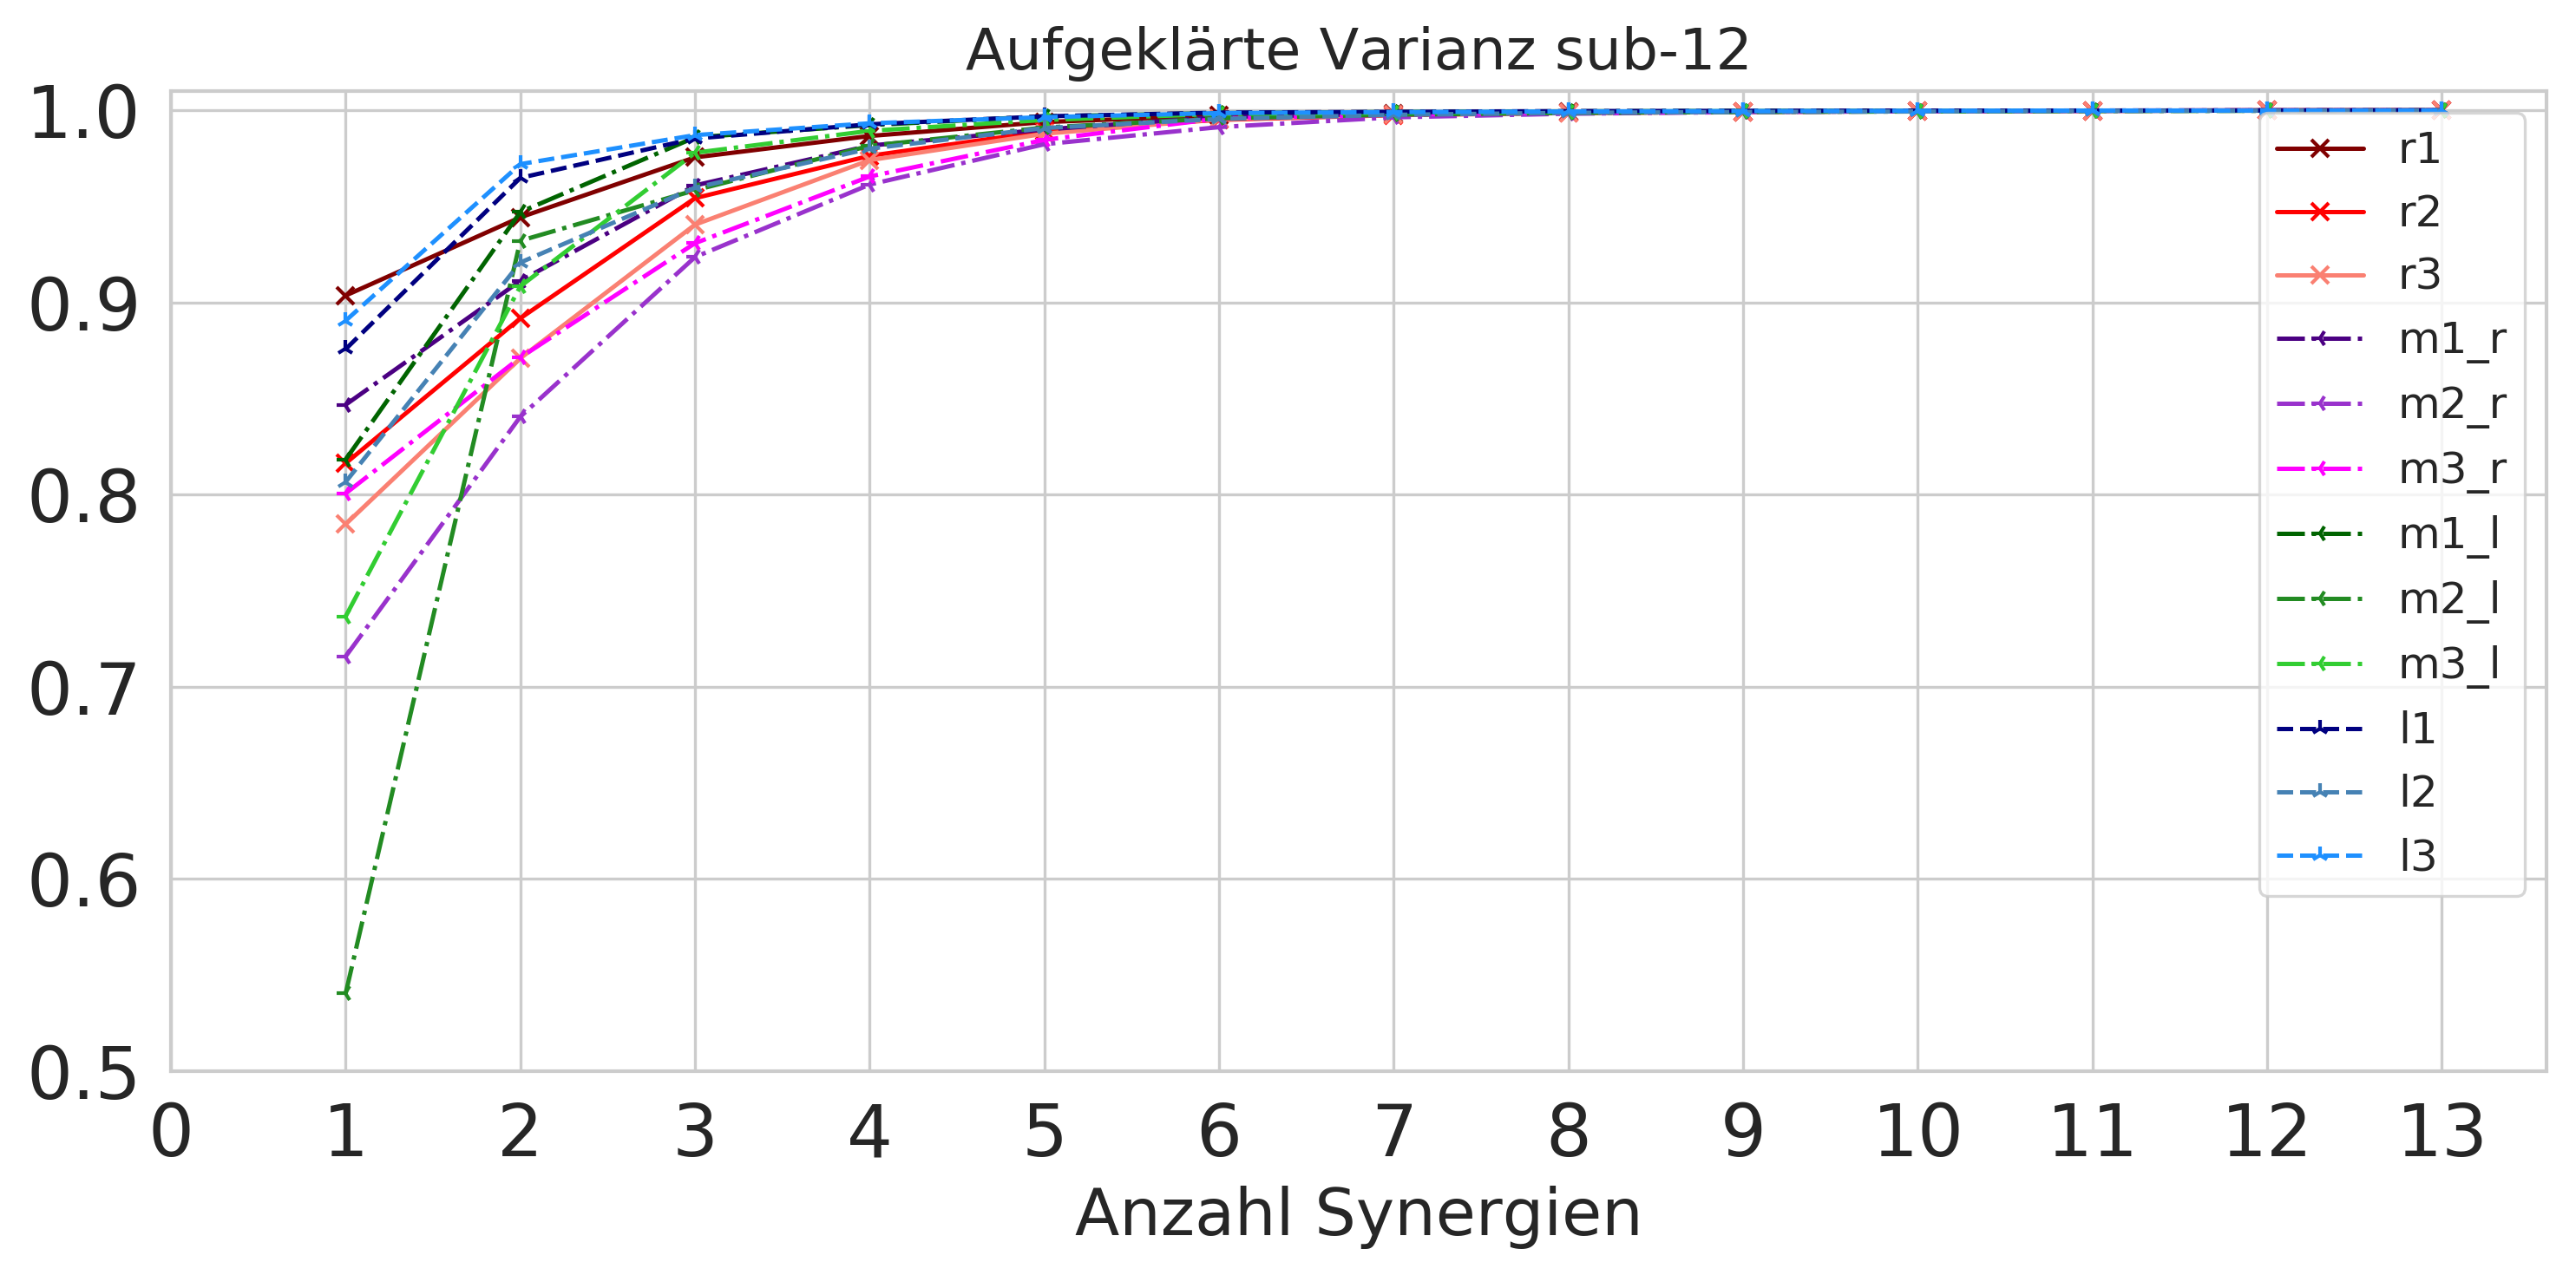

Subject Done!!
sub-04
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


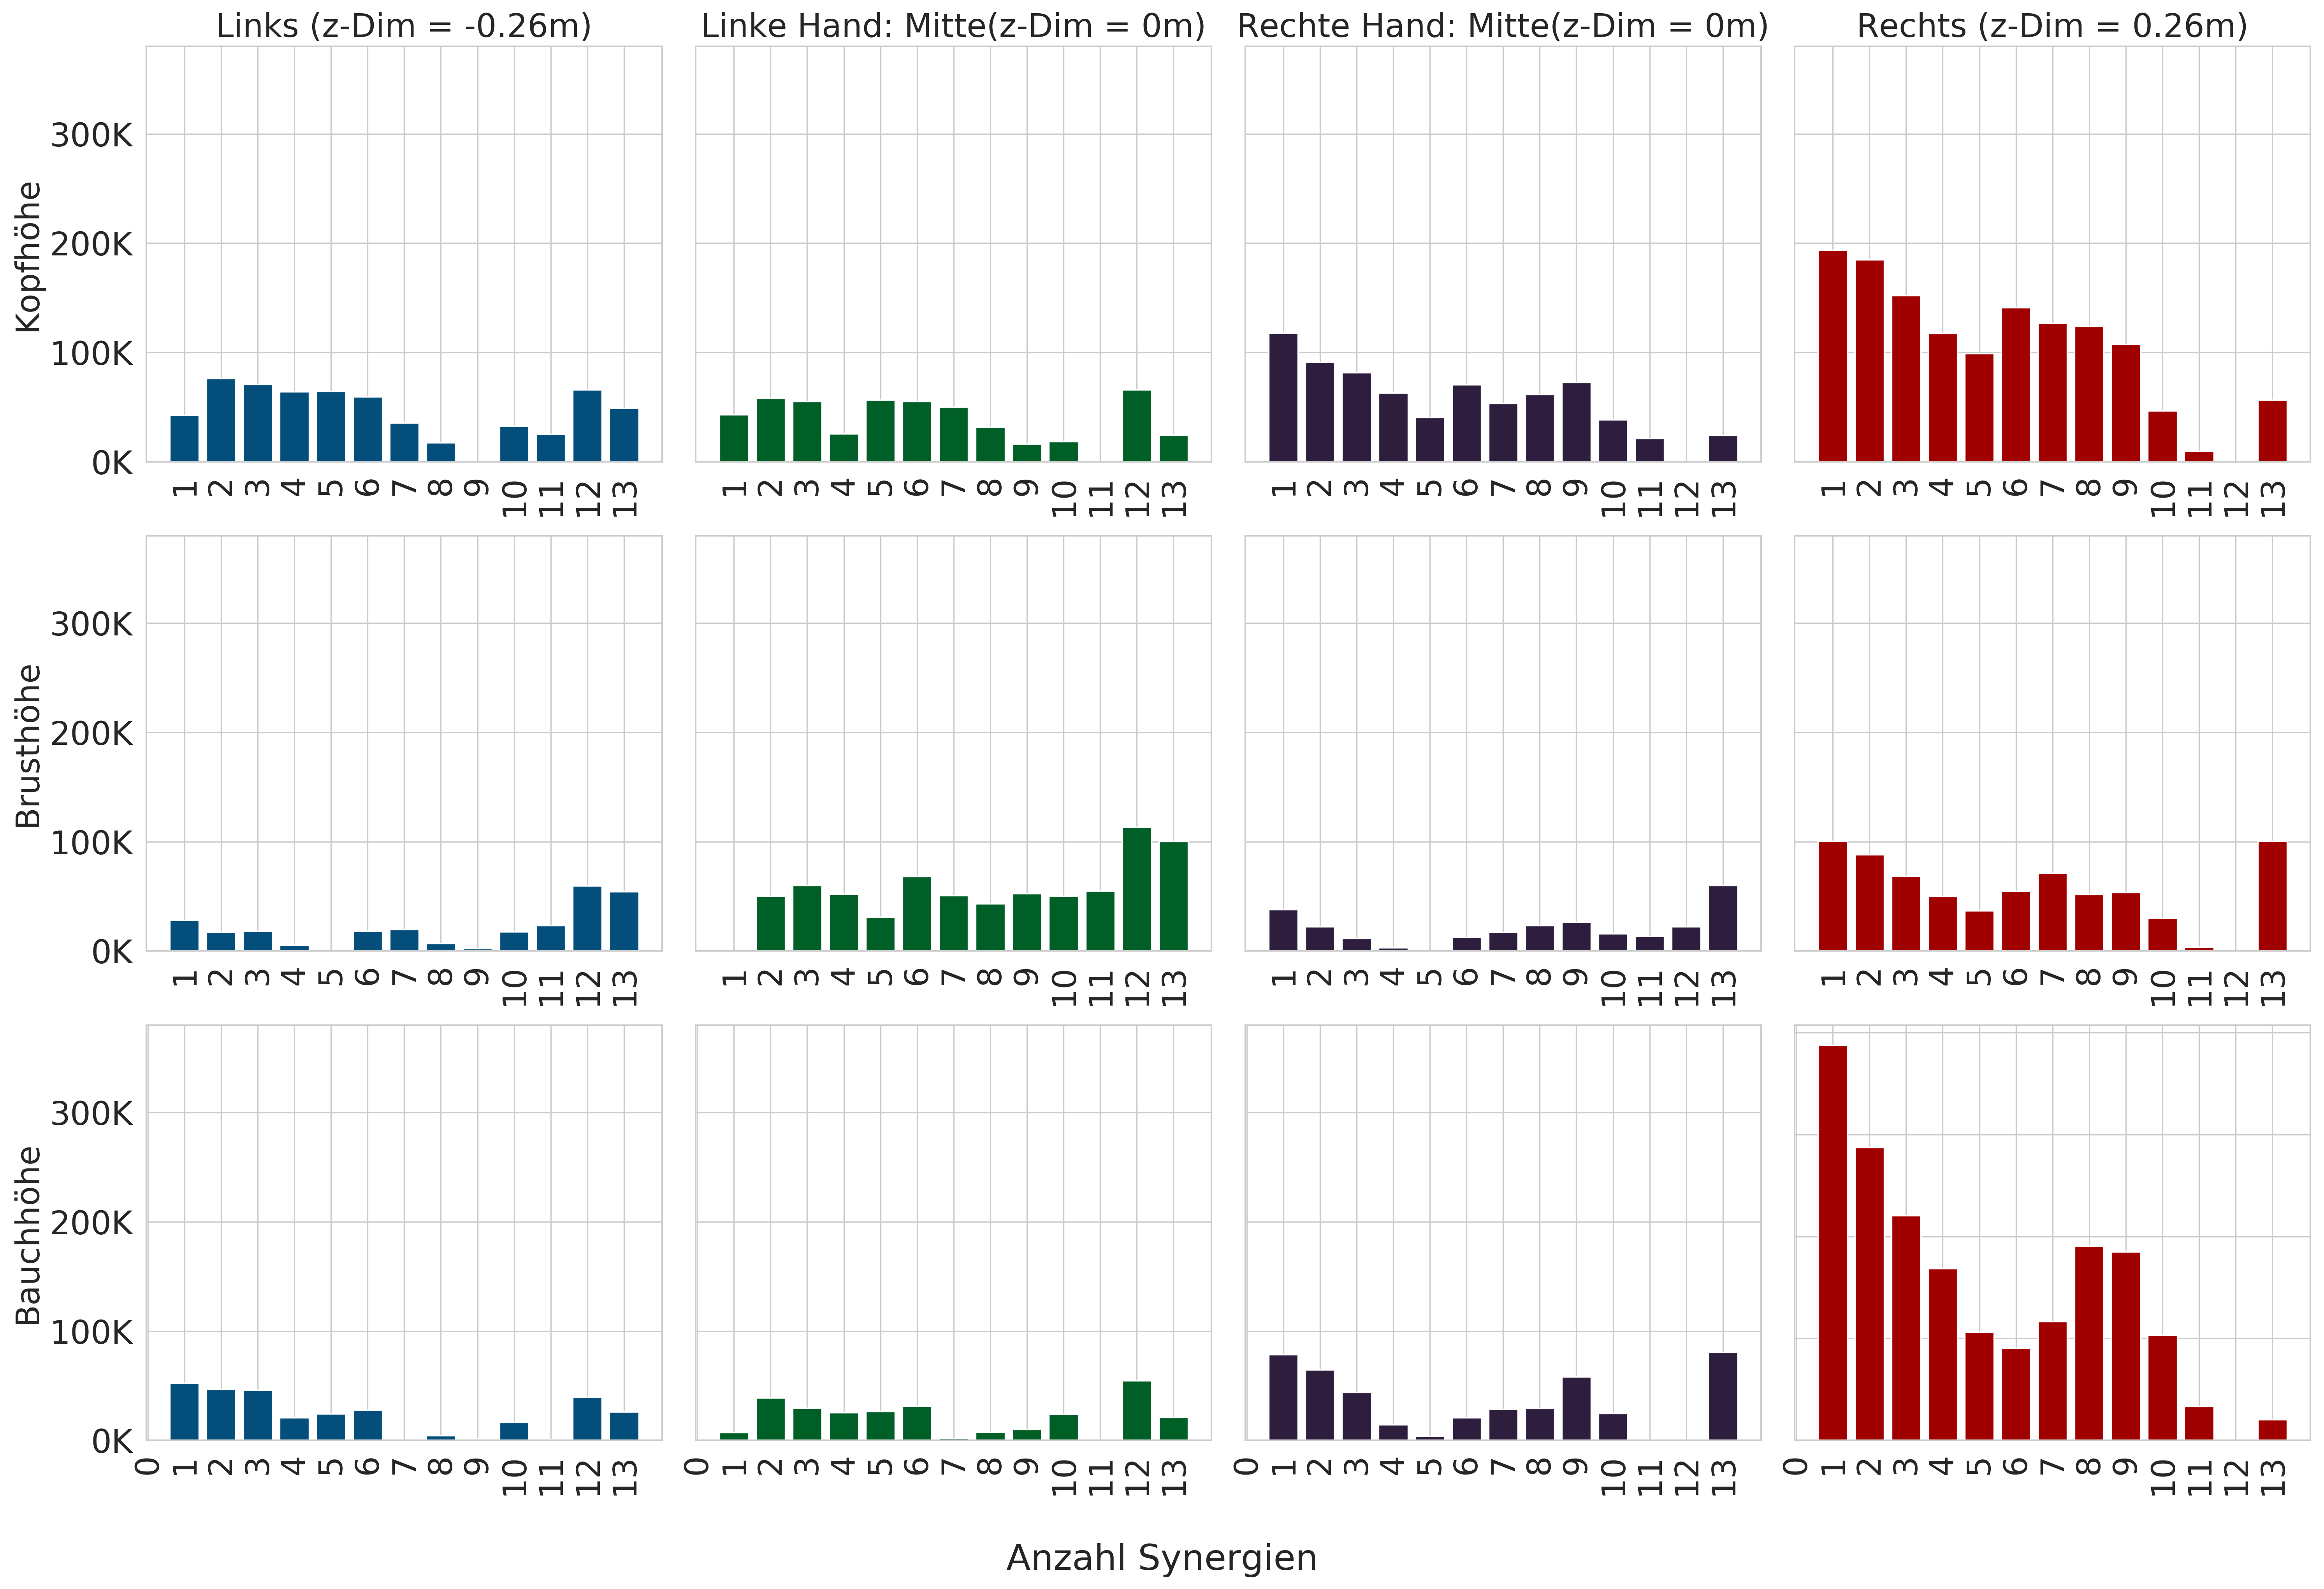

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


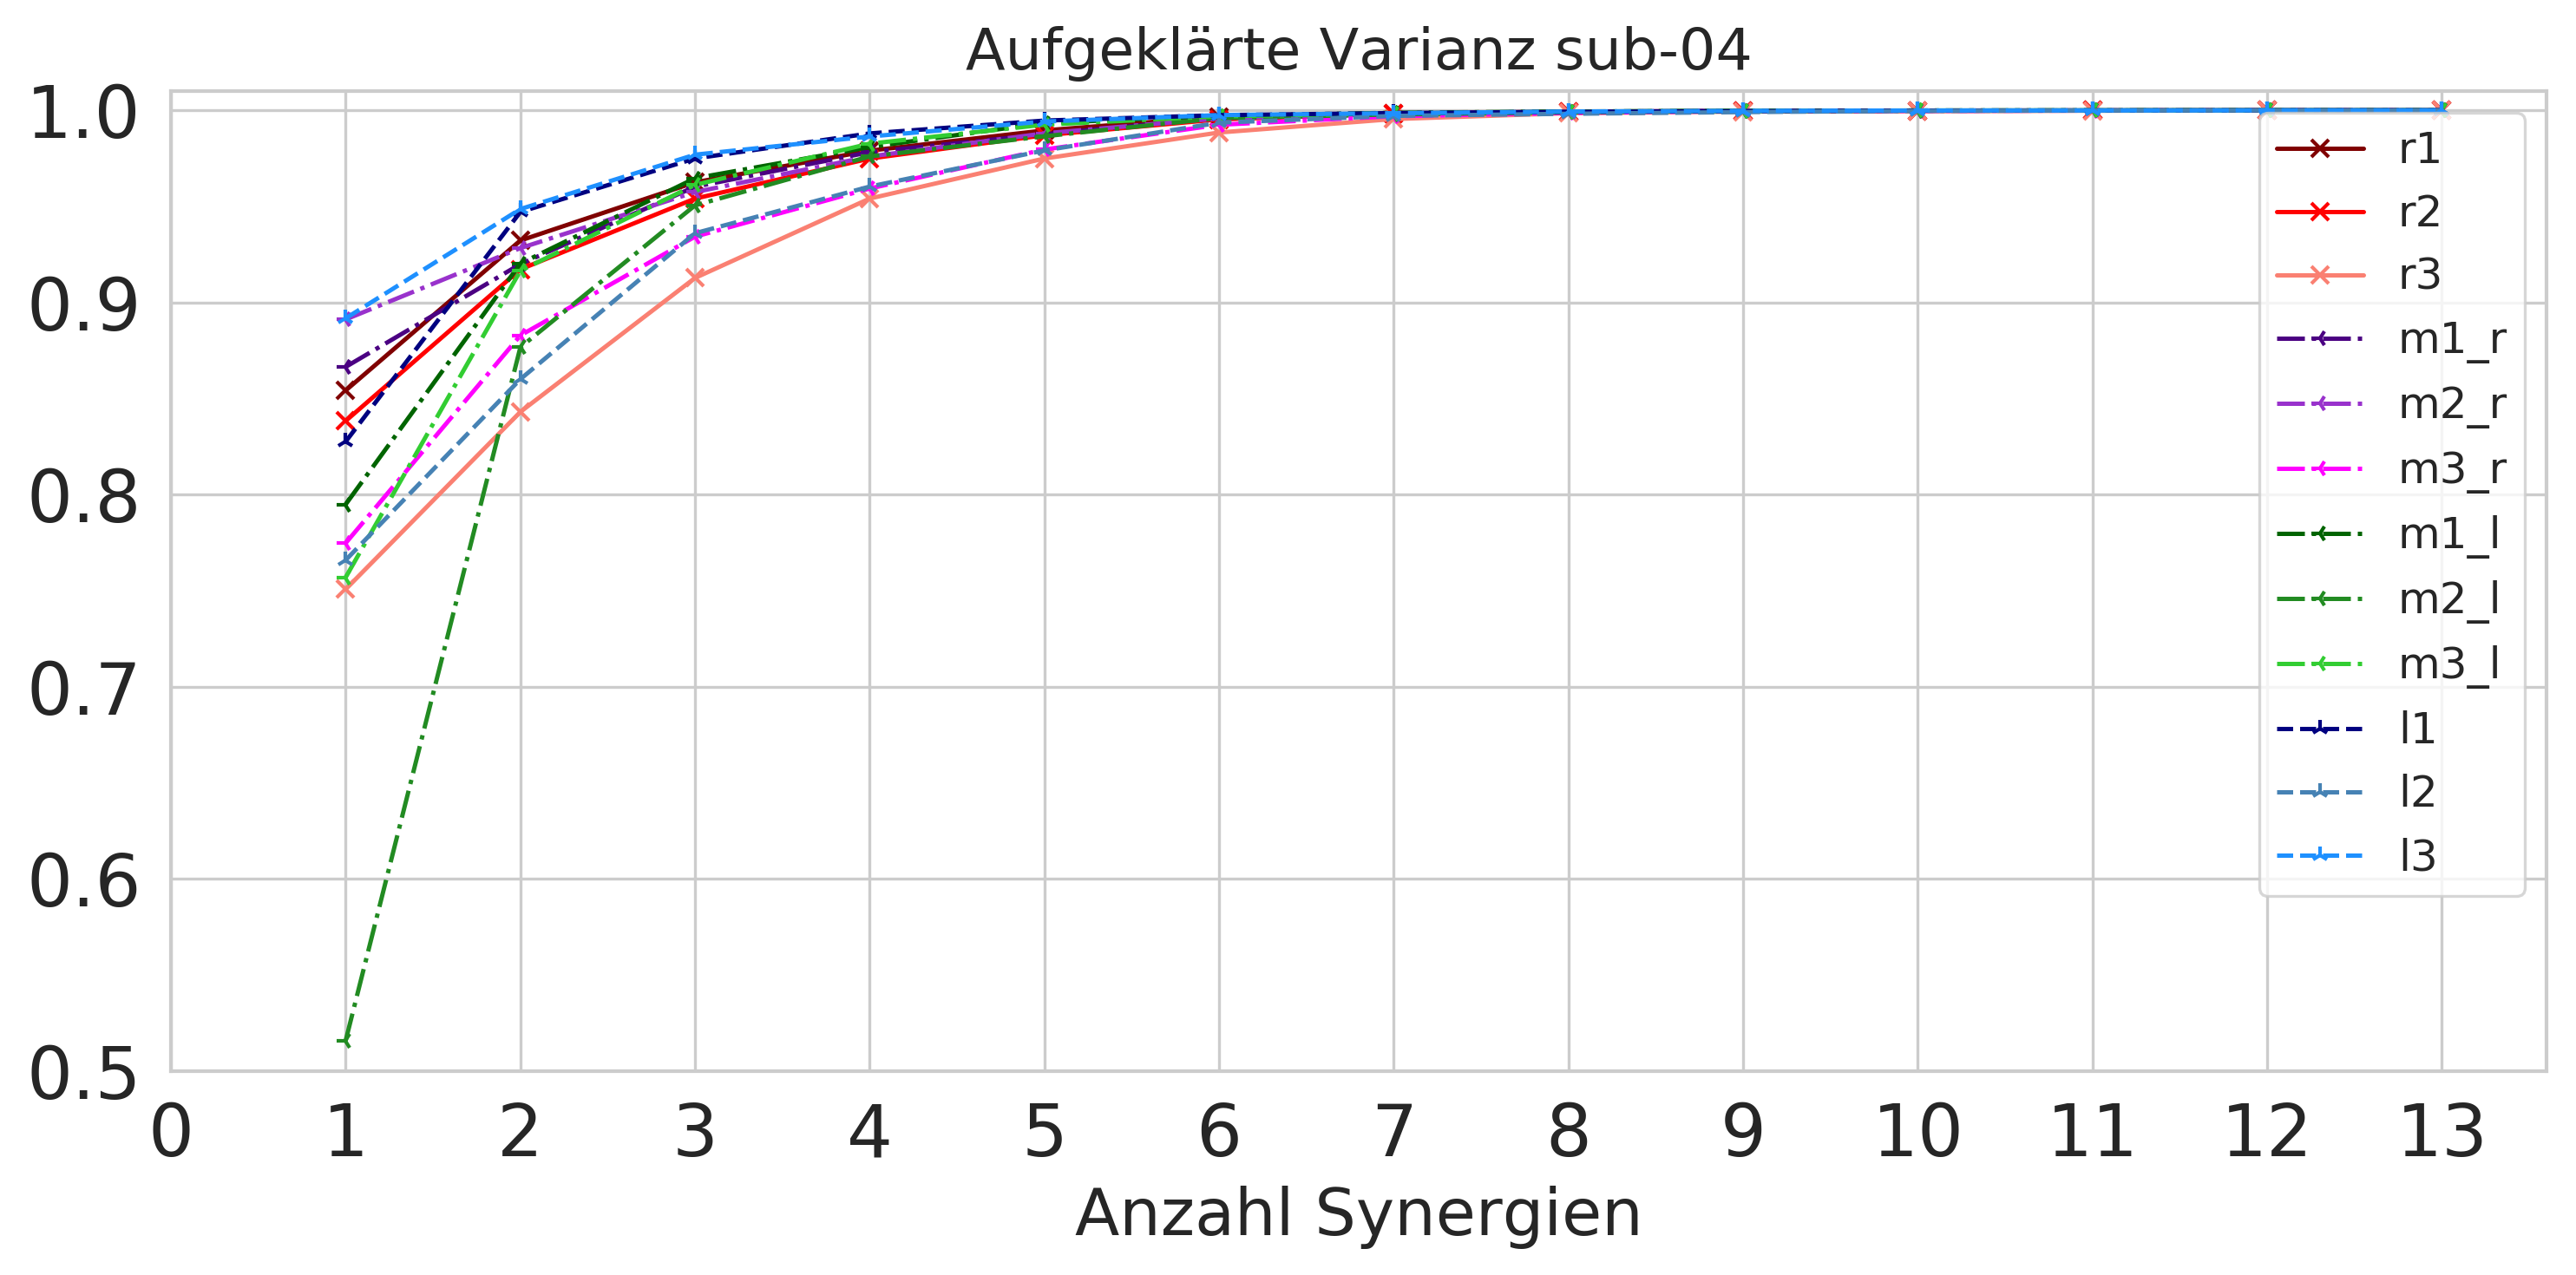

Subject Done!!
sub-09
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


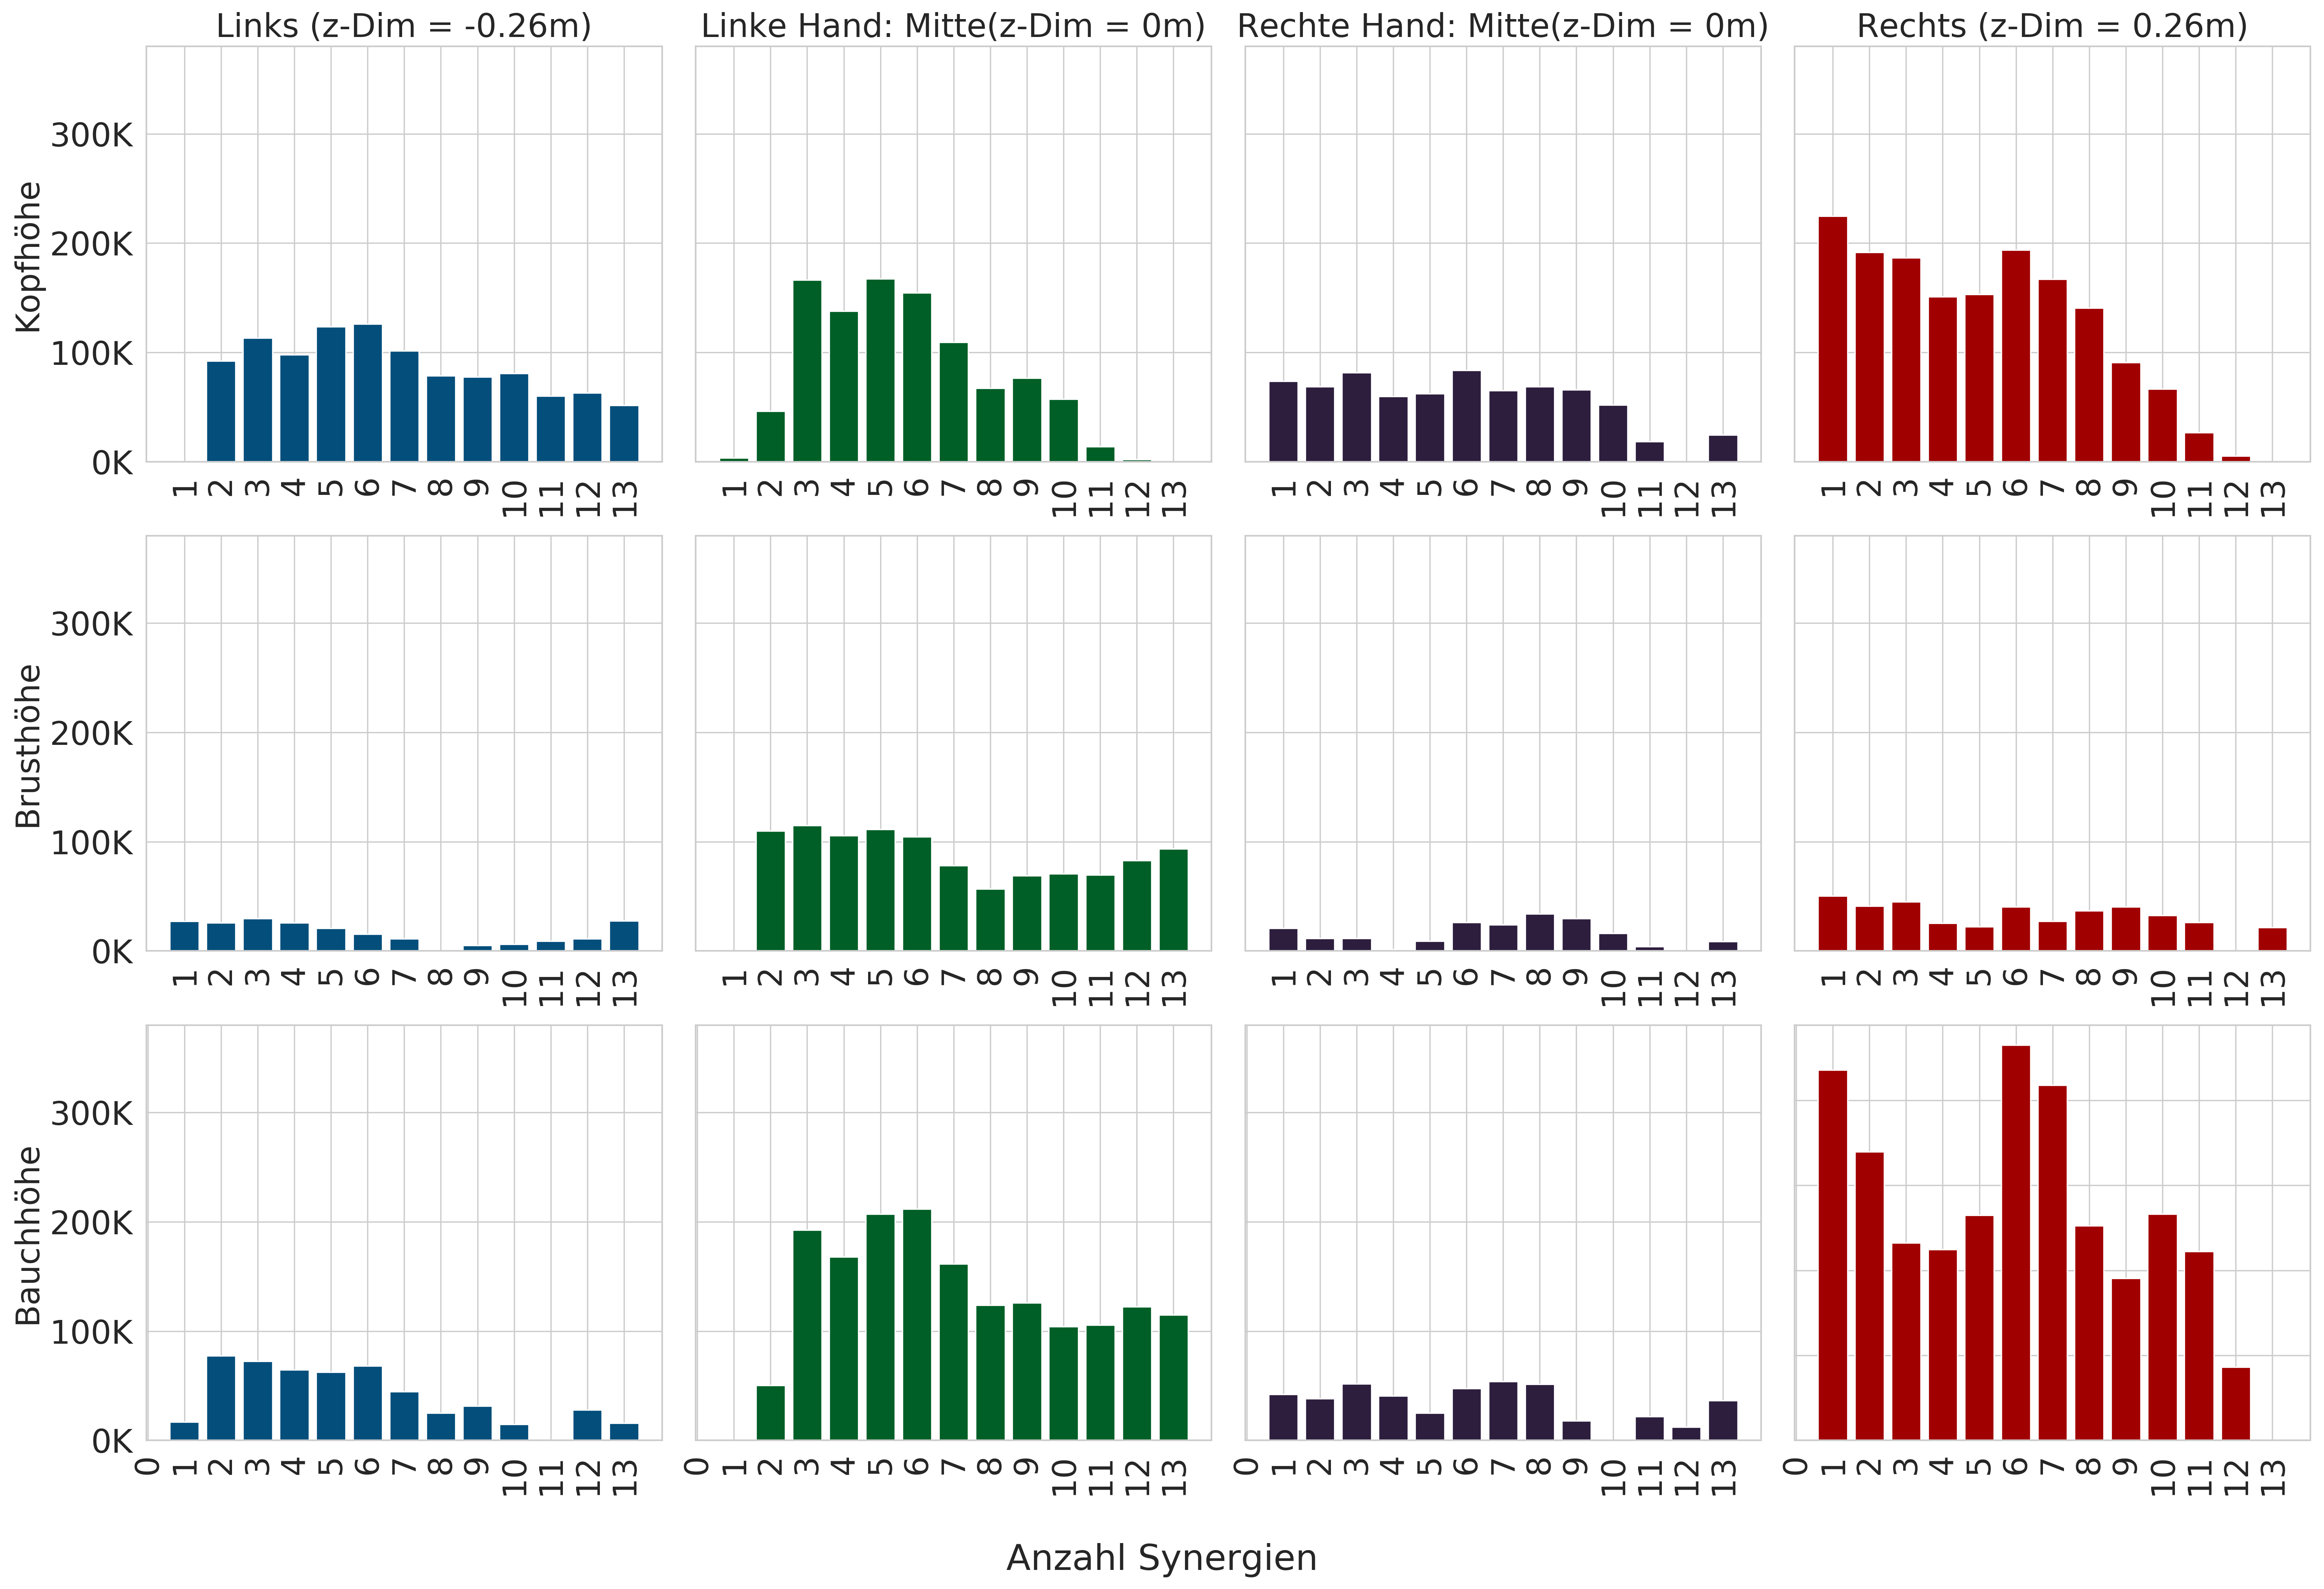

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


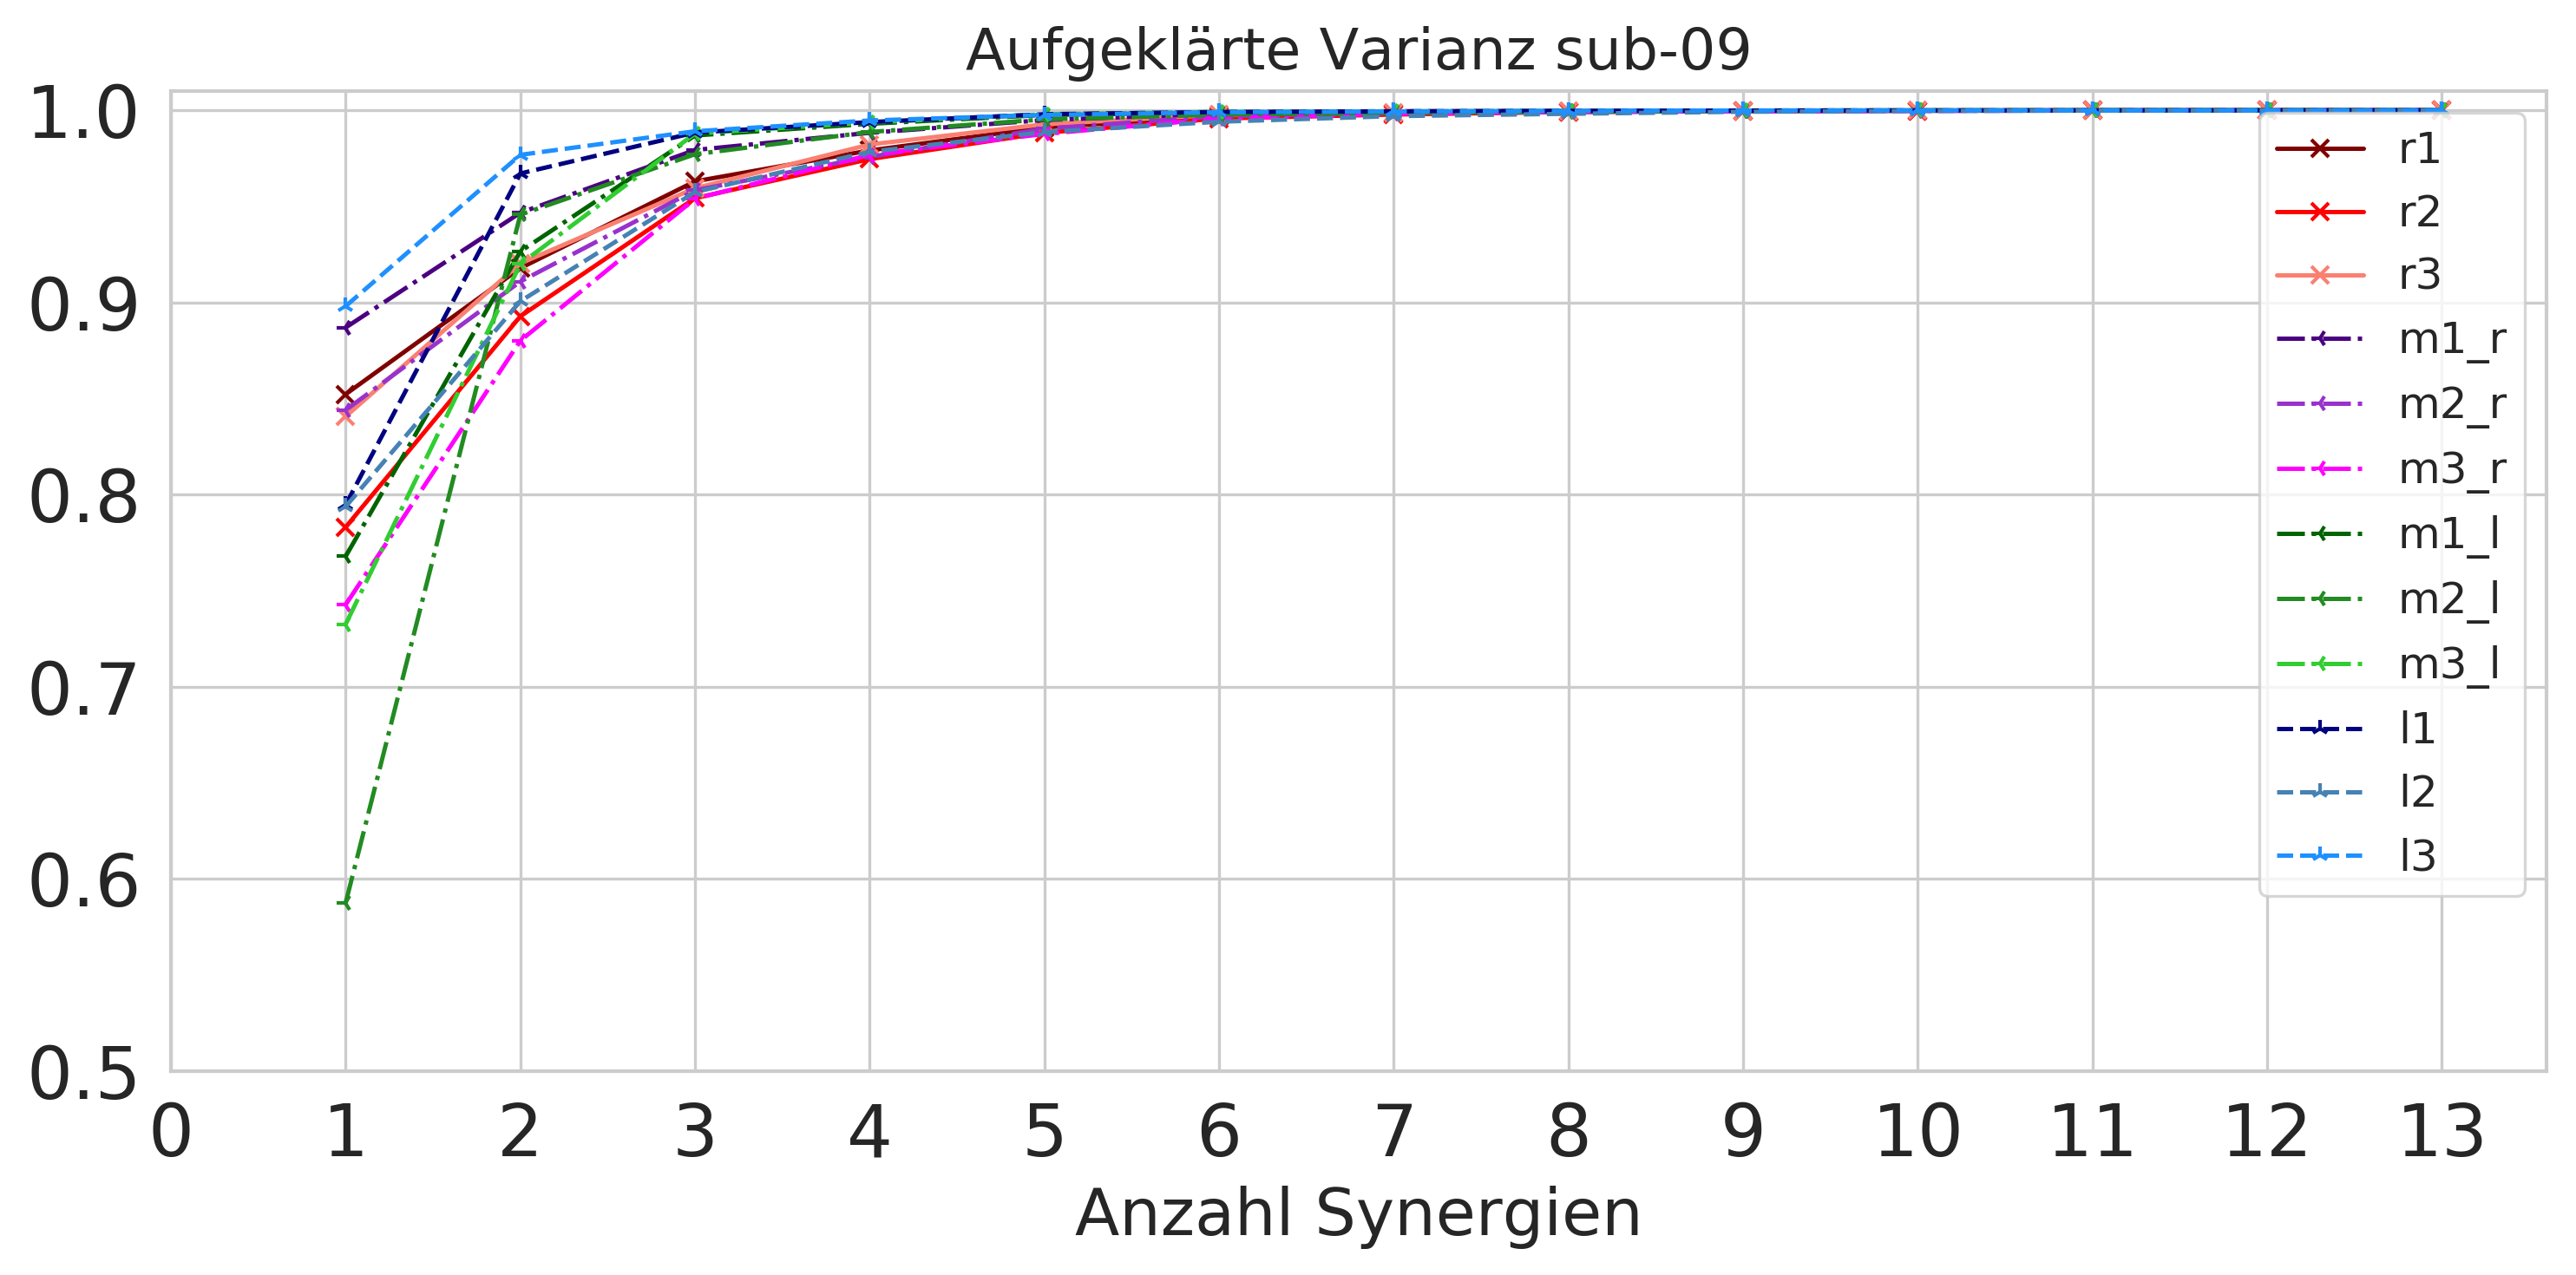

Subject Done!!
group_level
vts
me
vafs


/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


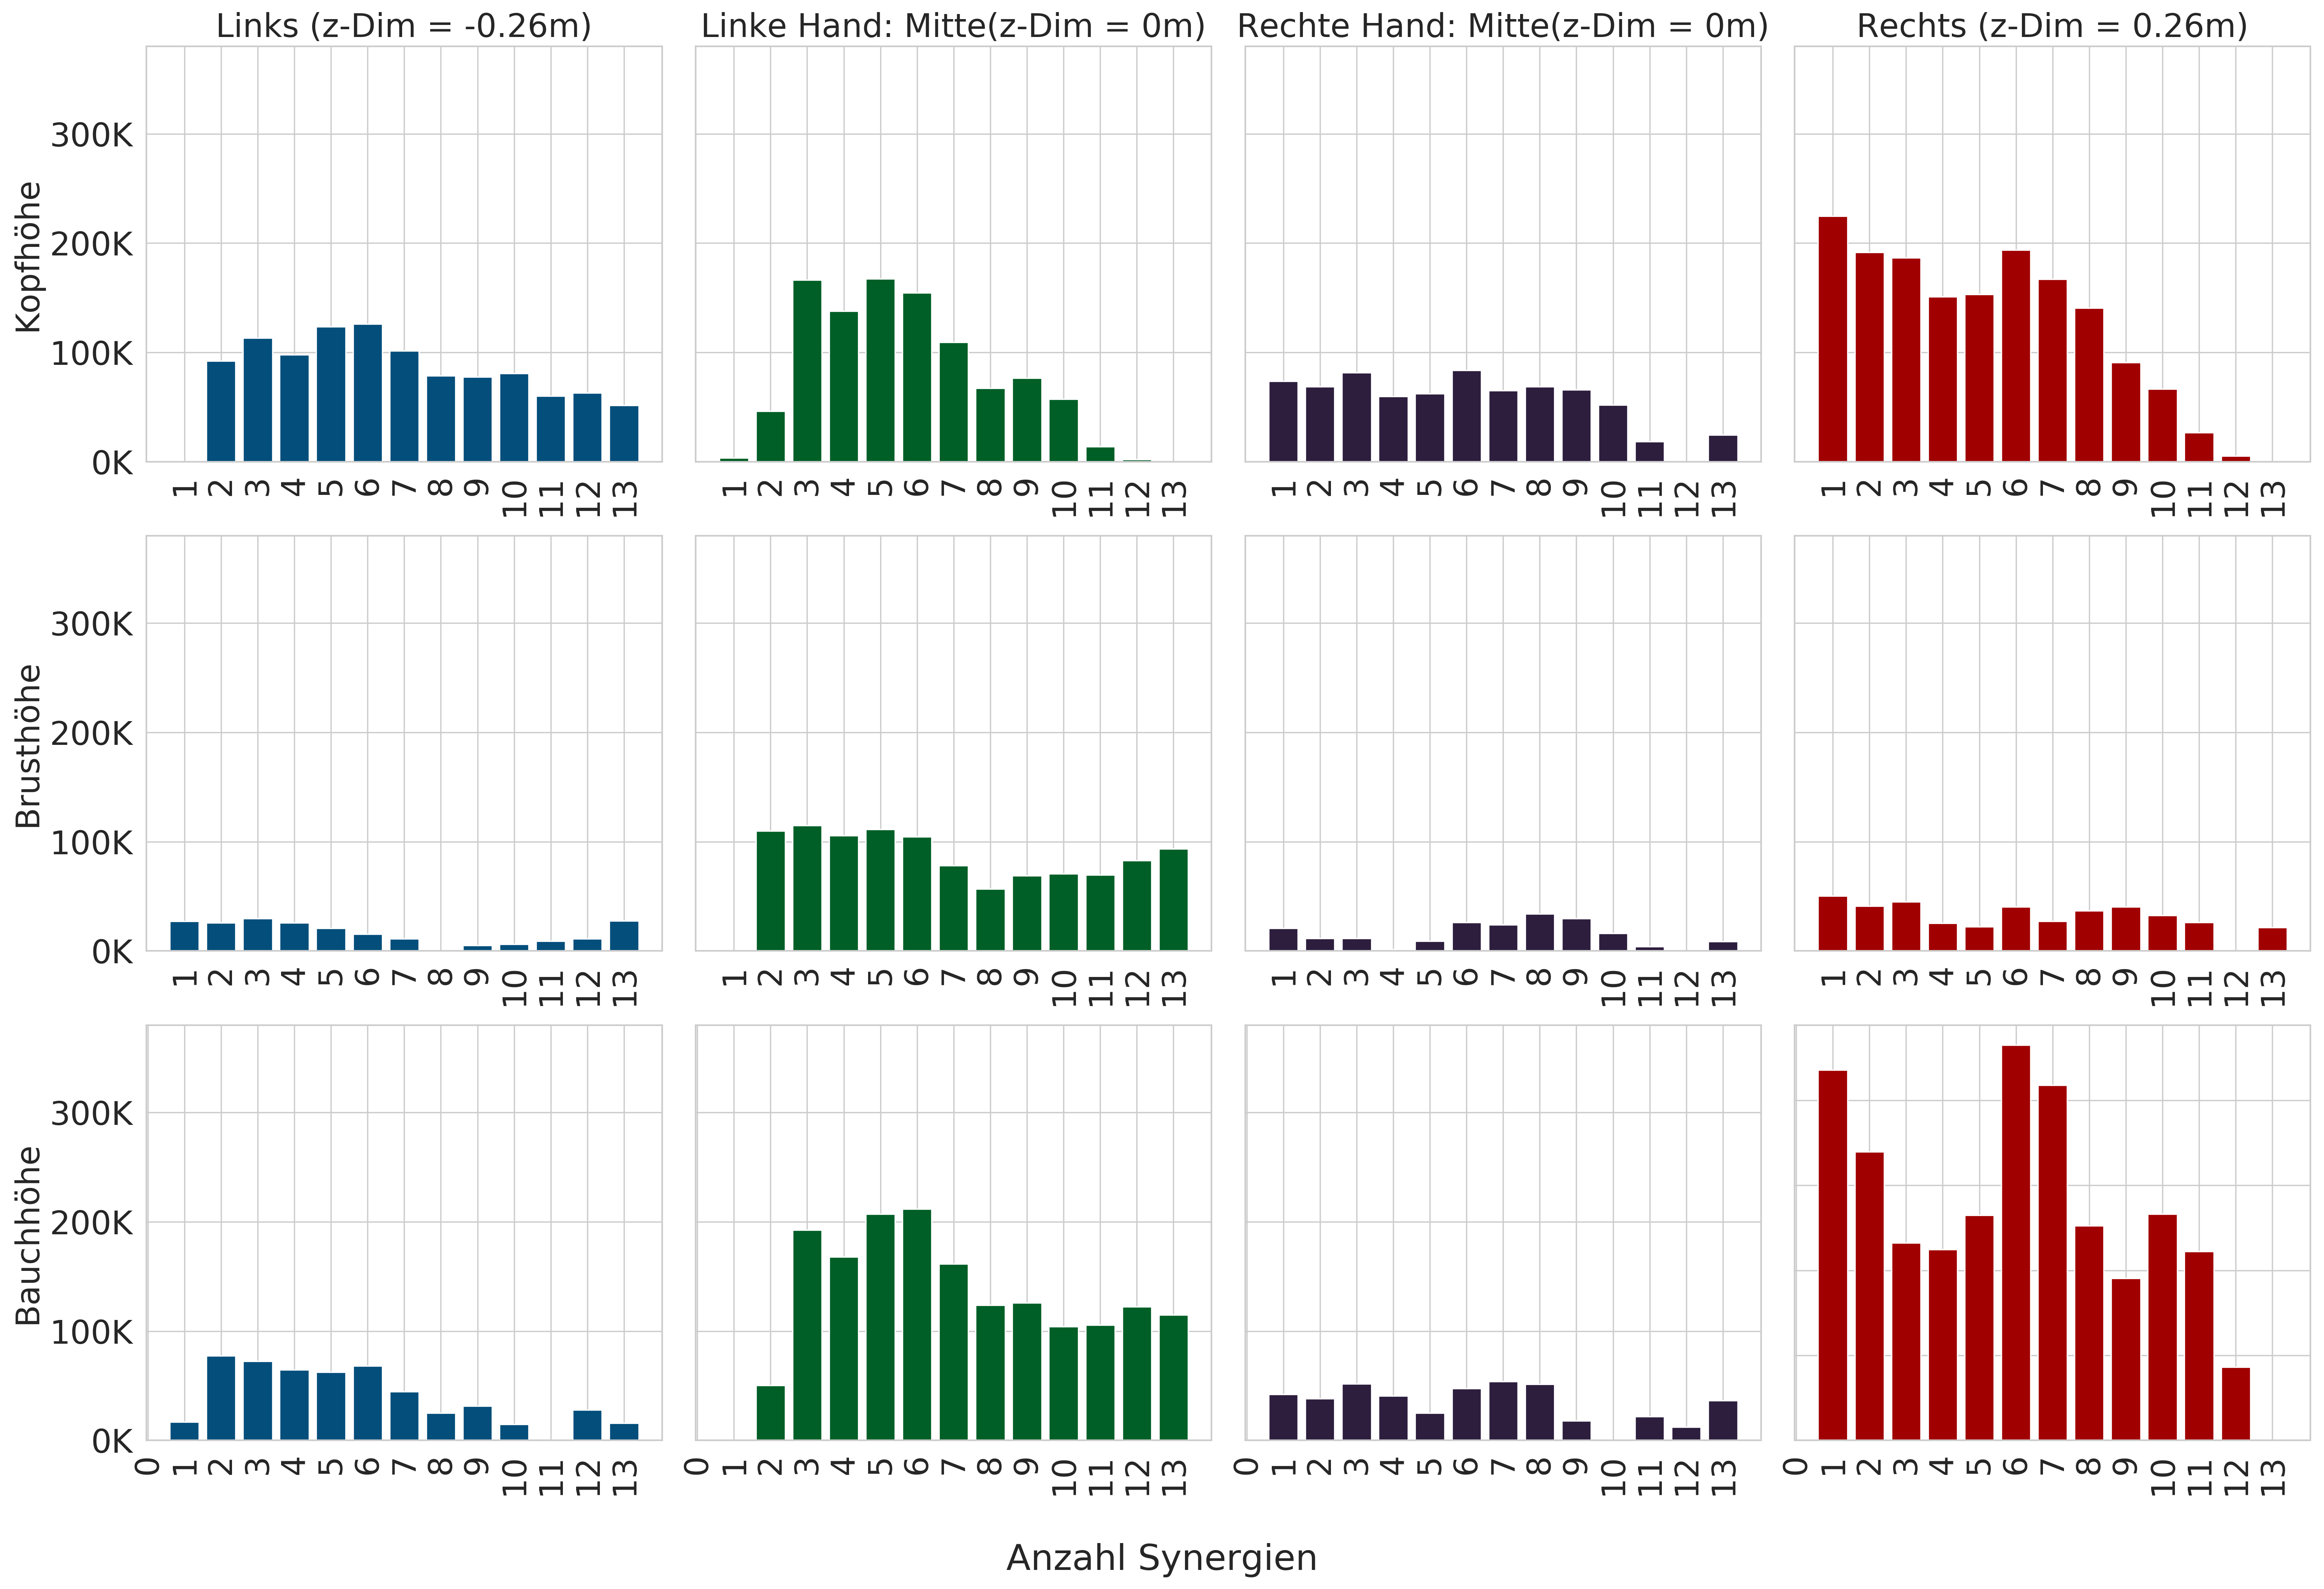

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


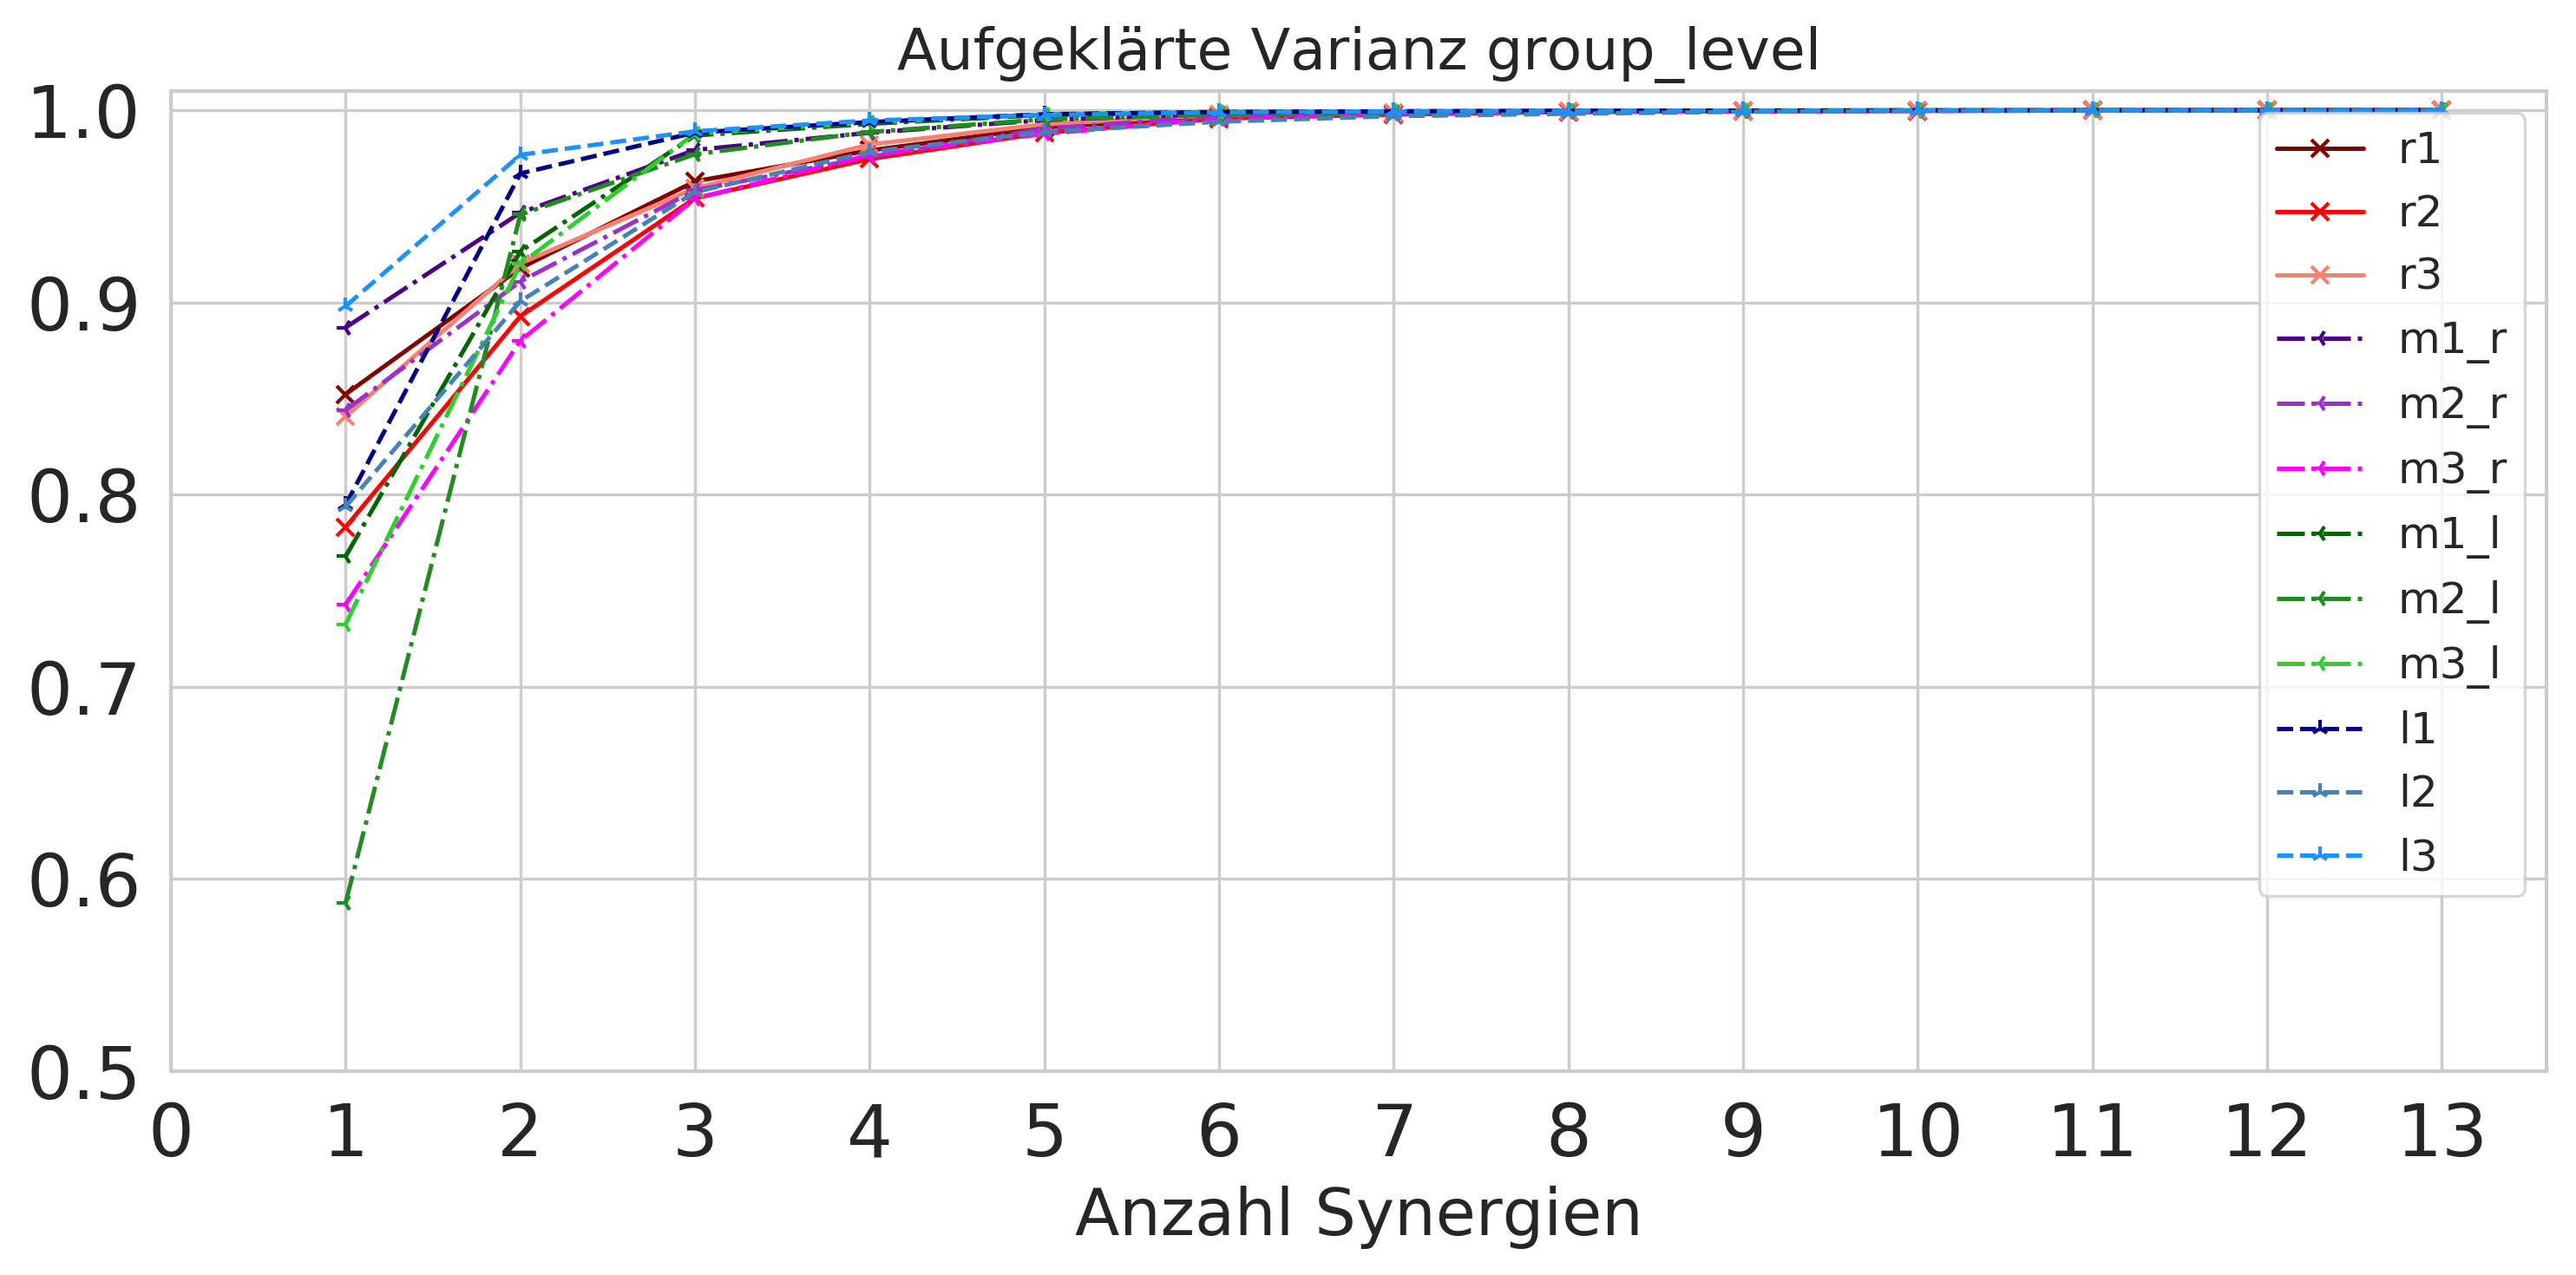

Subject Done!!
sub-08
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


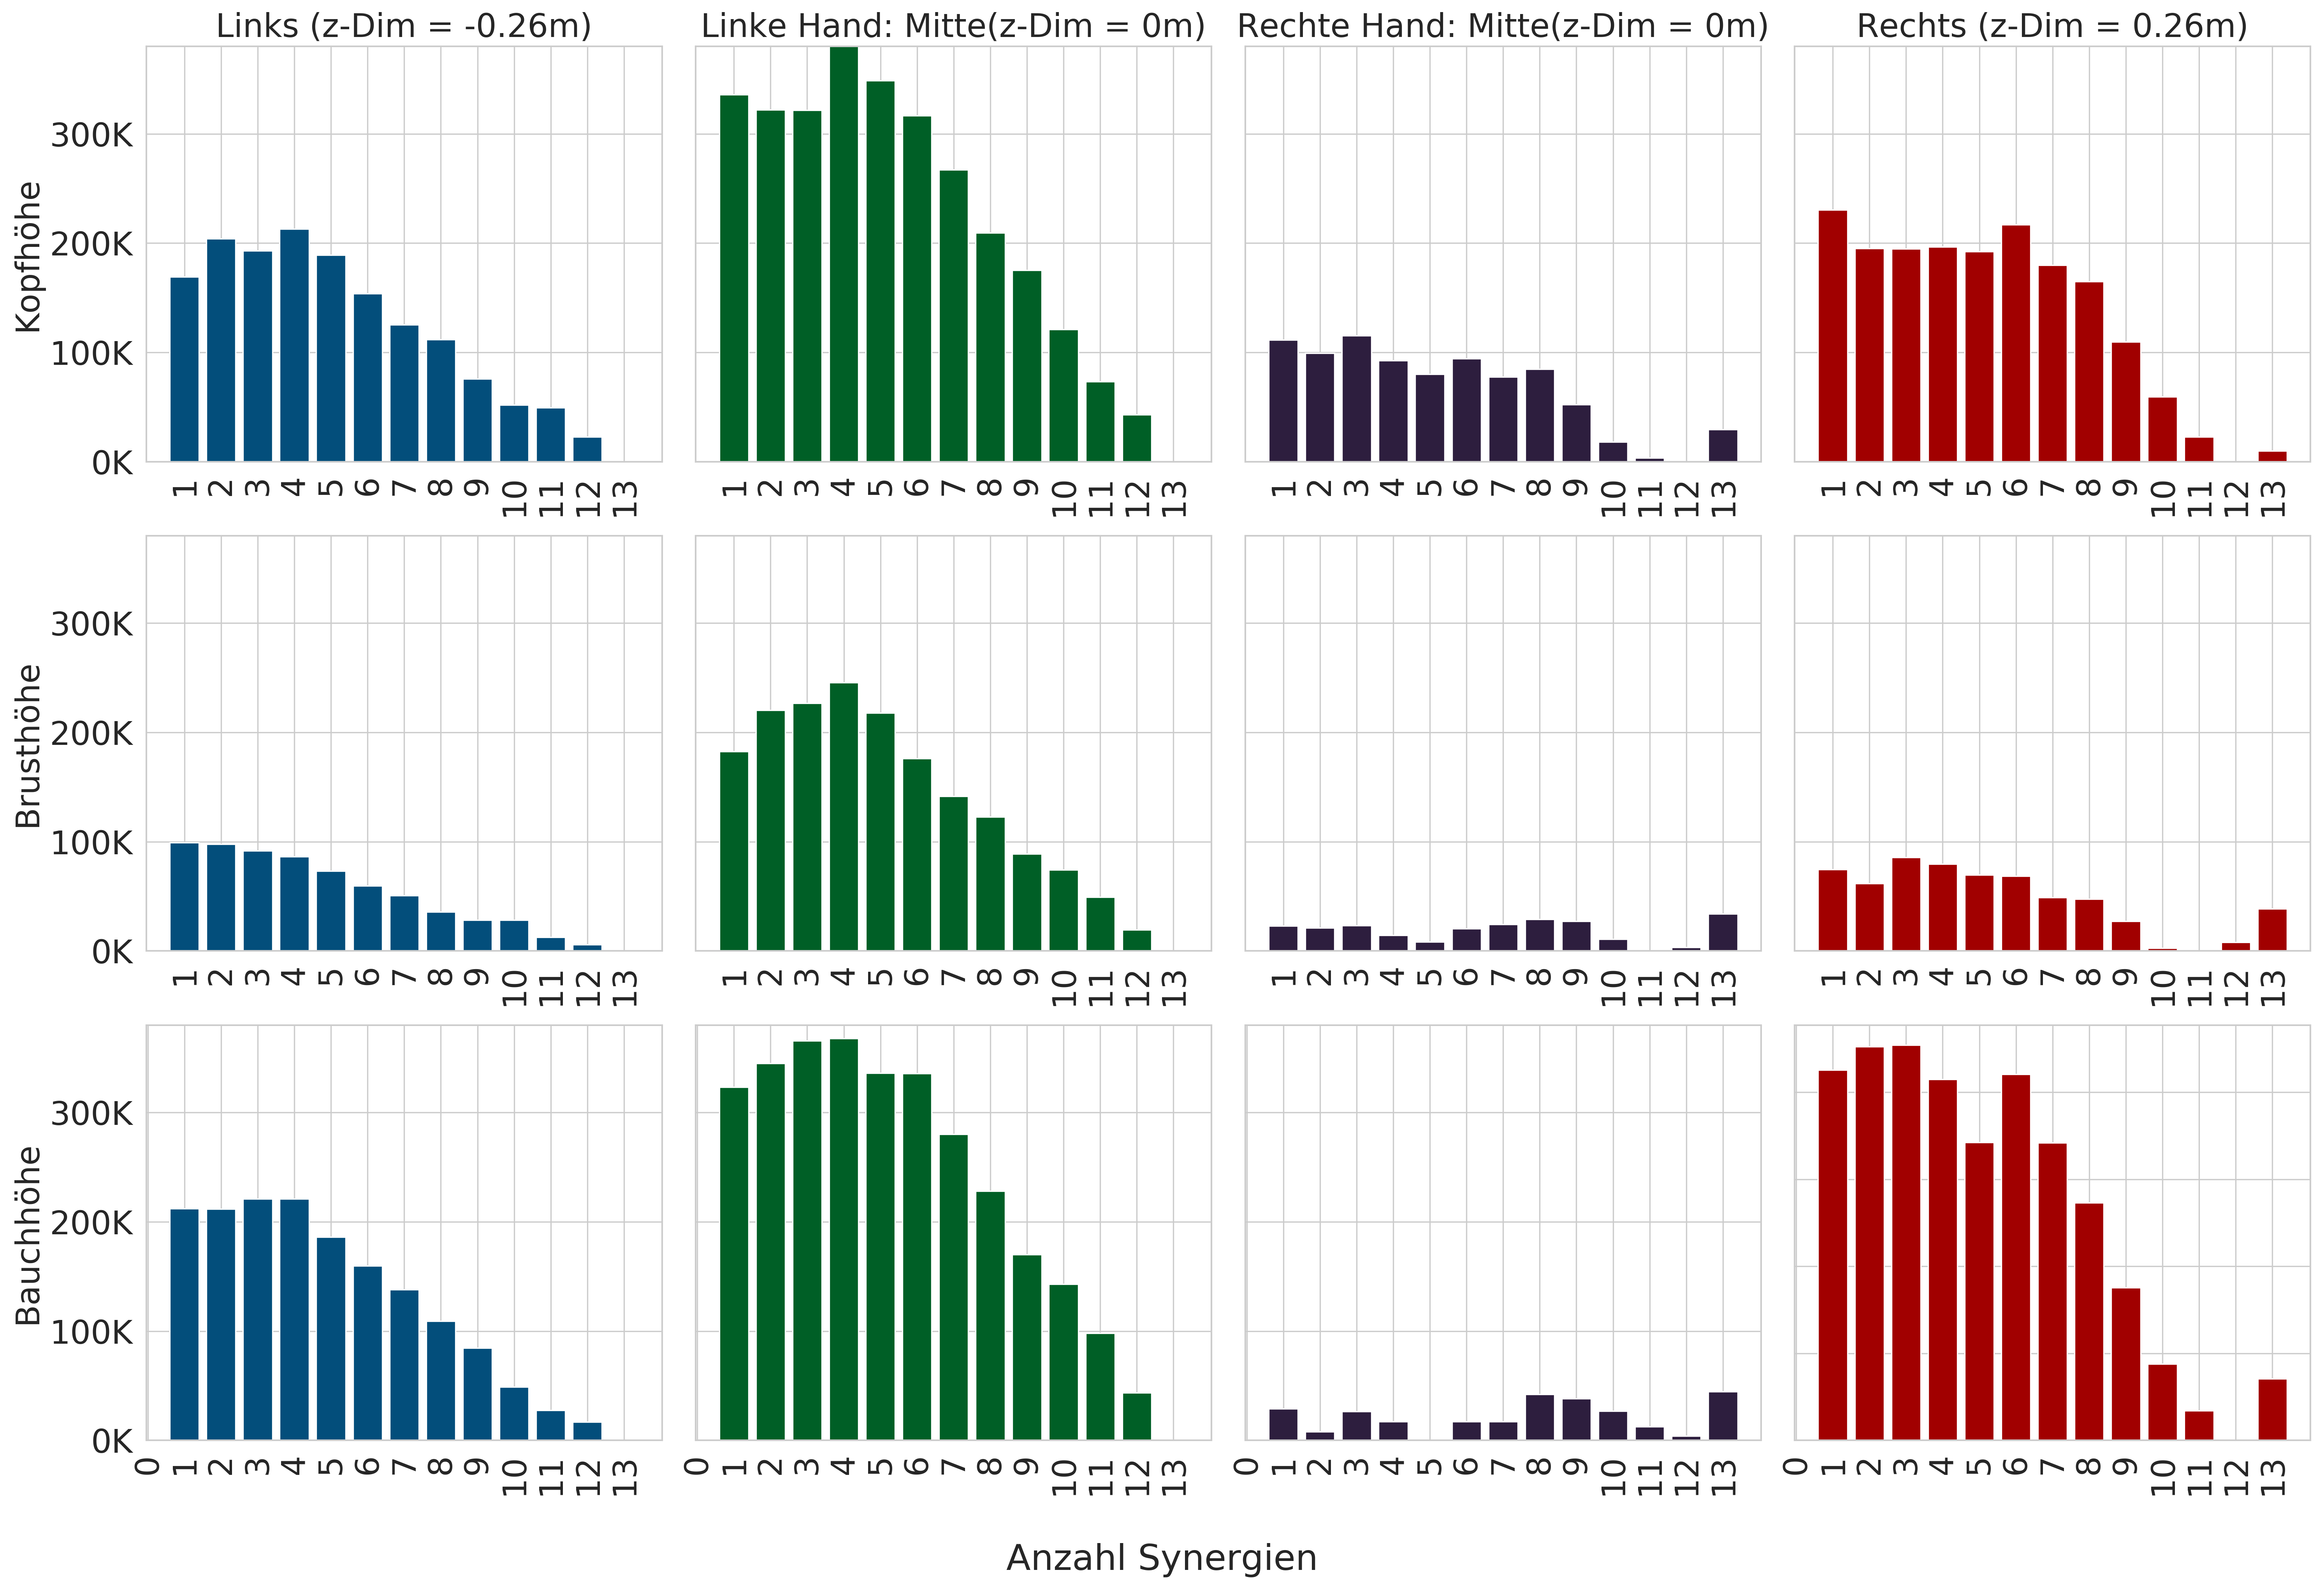

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


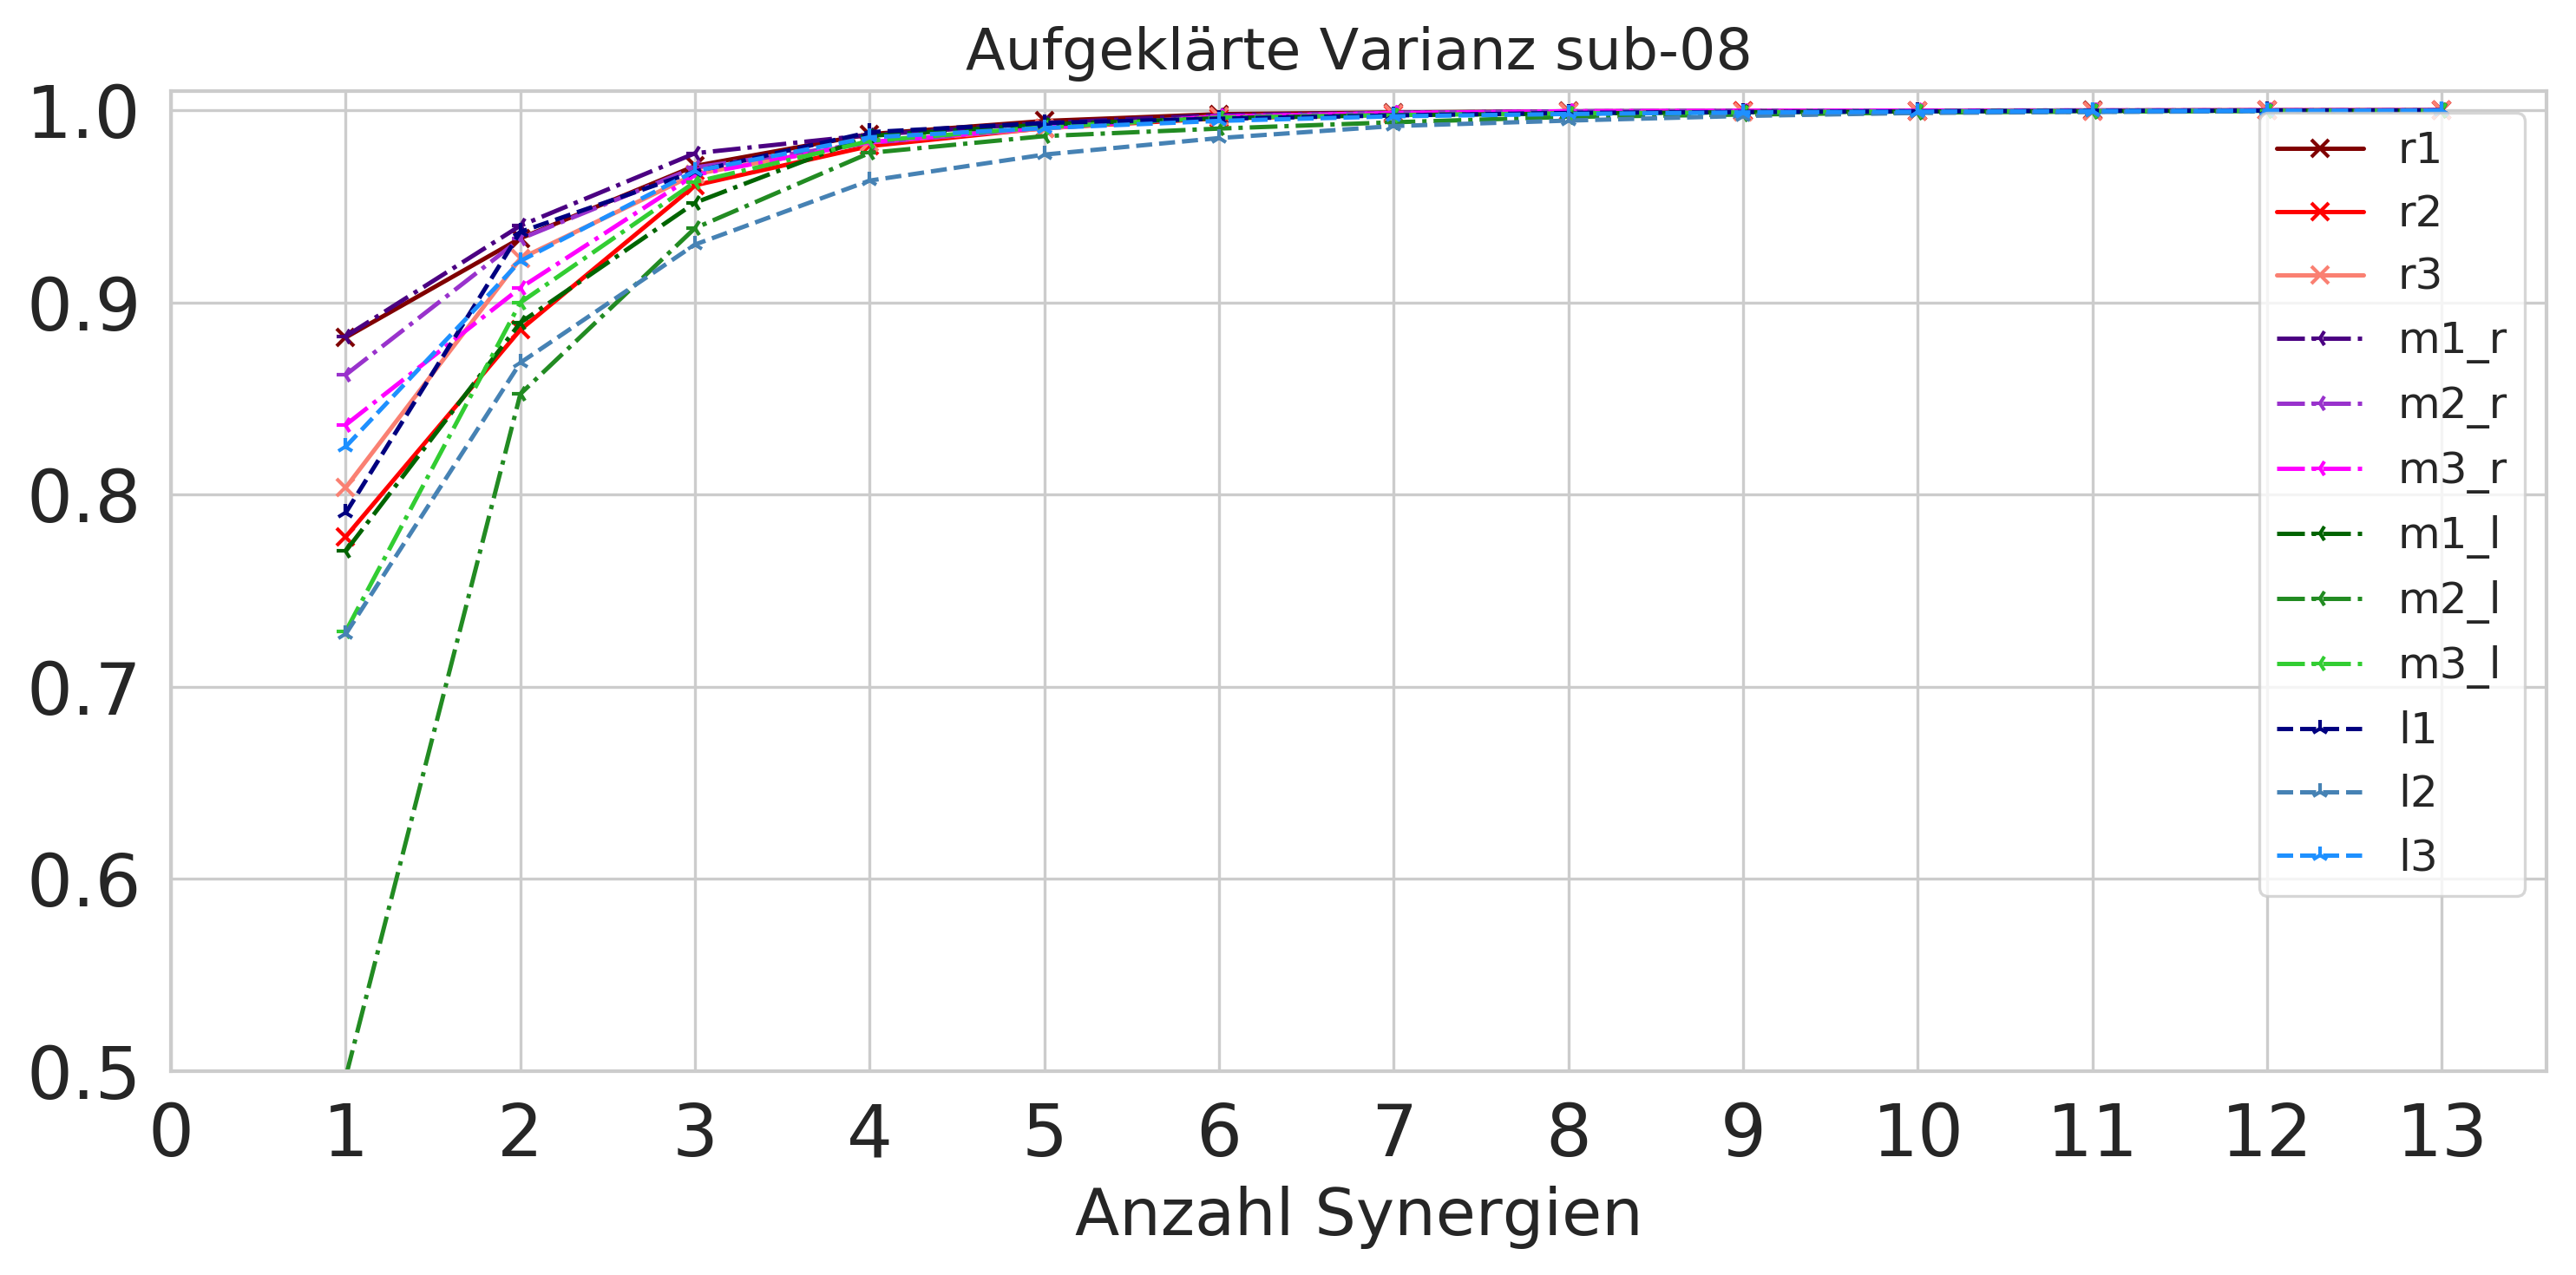

Subject Done!!
sub-11
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


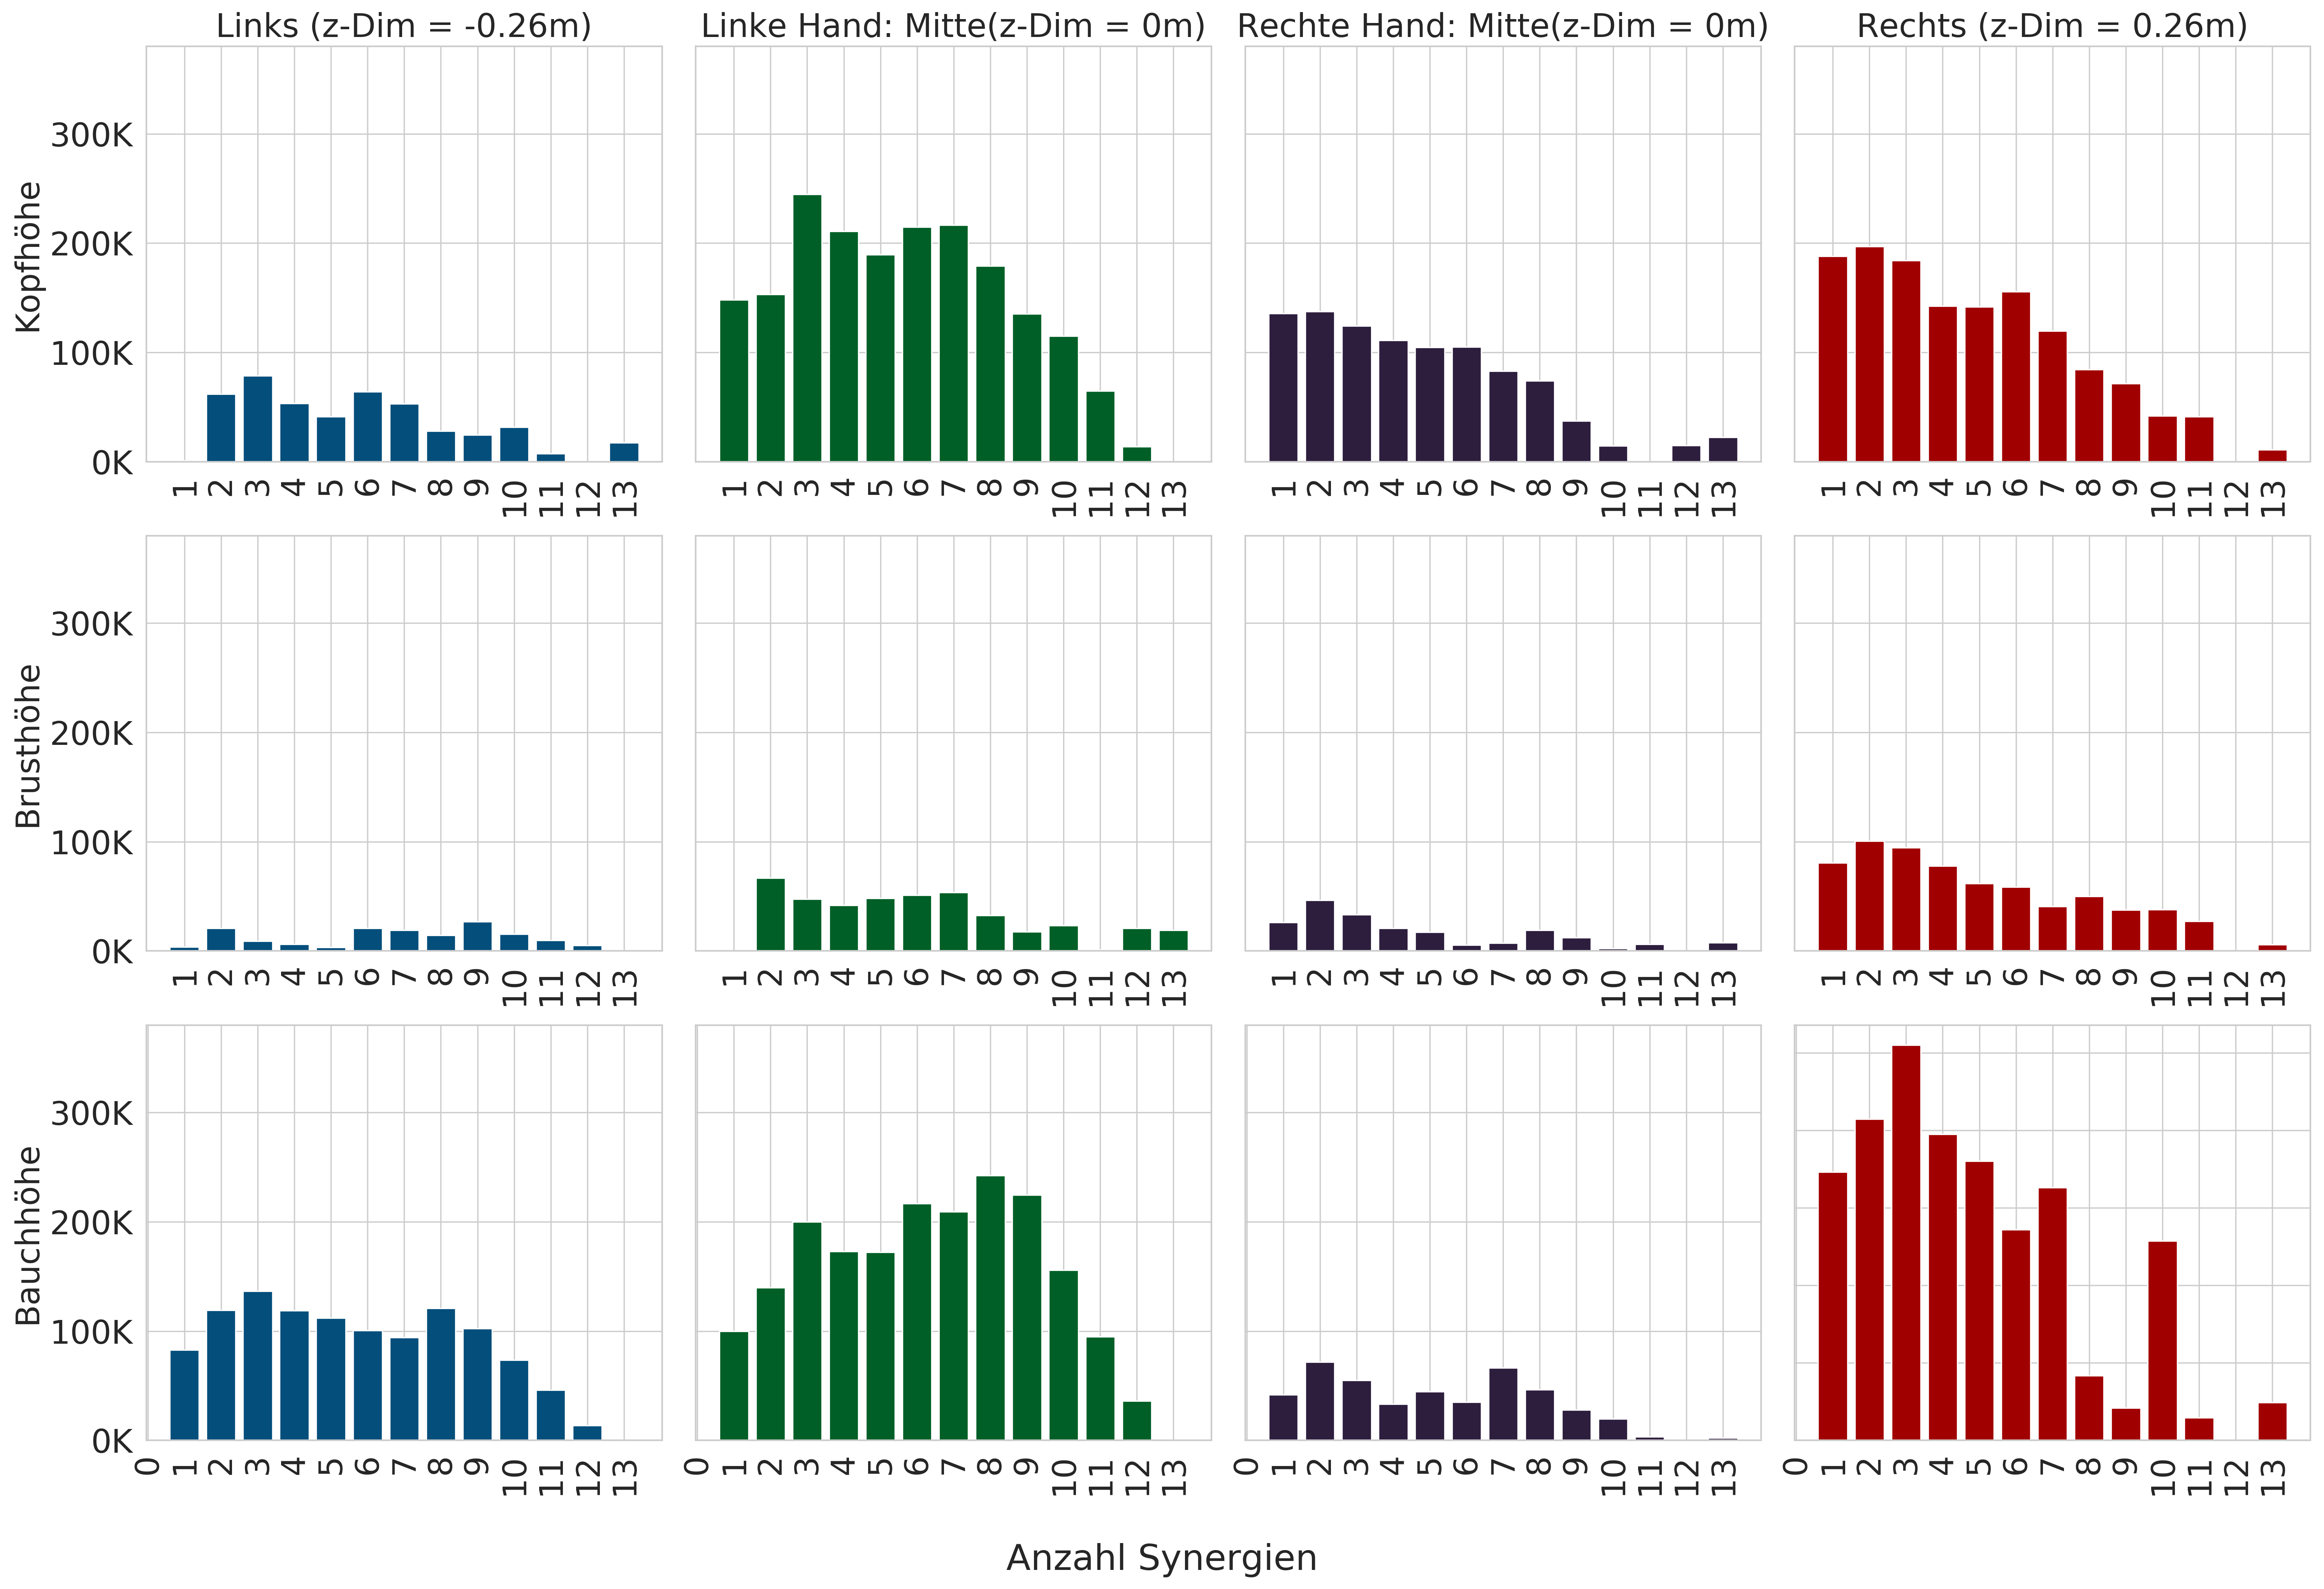

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


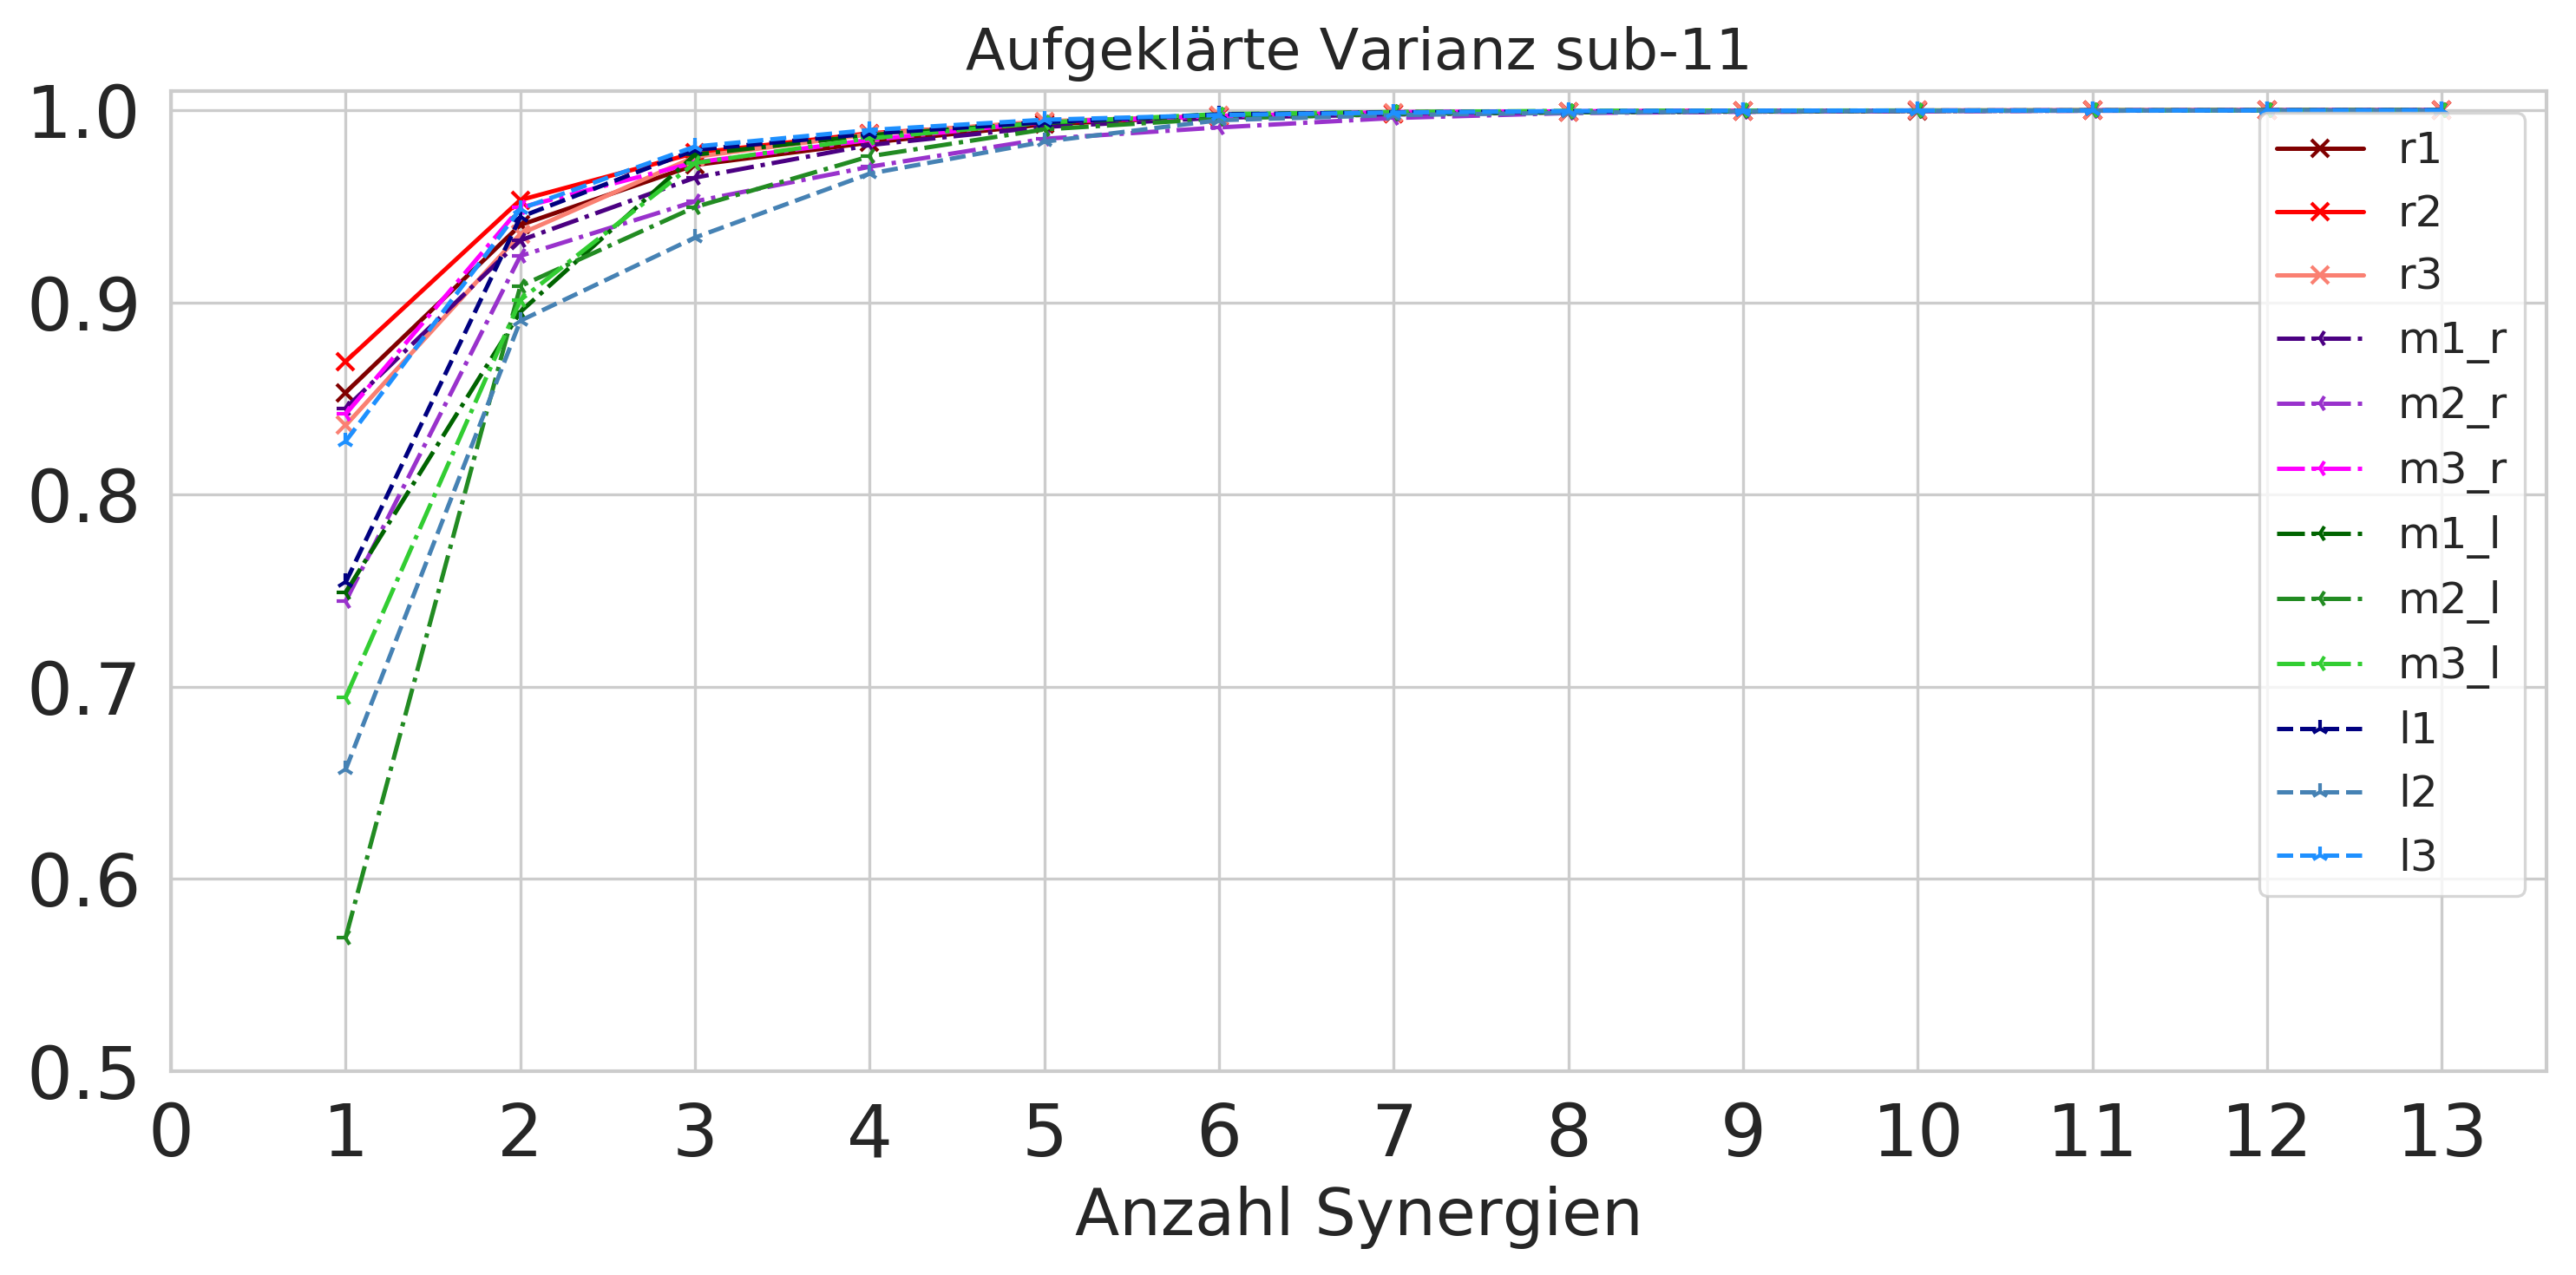

Subject Done!!
sub-10
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


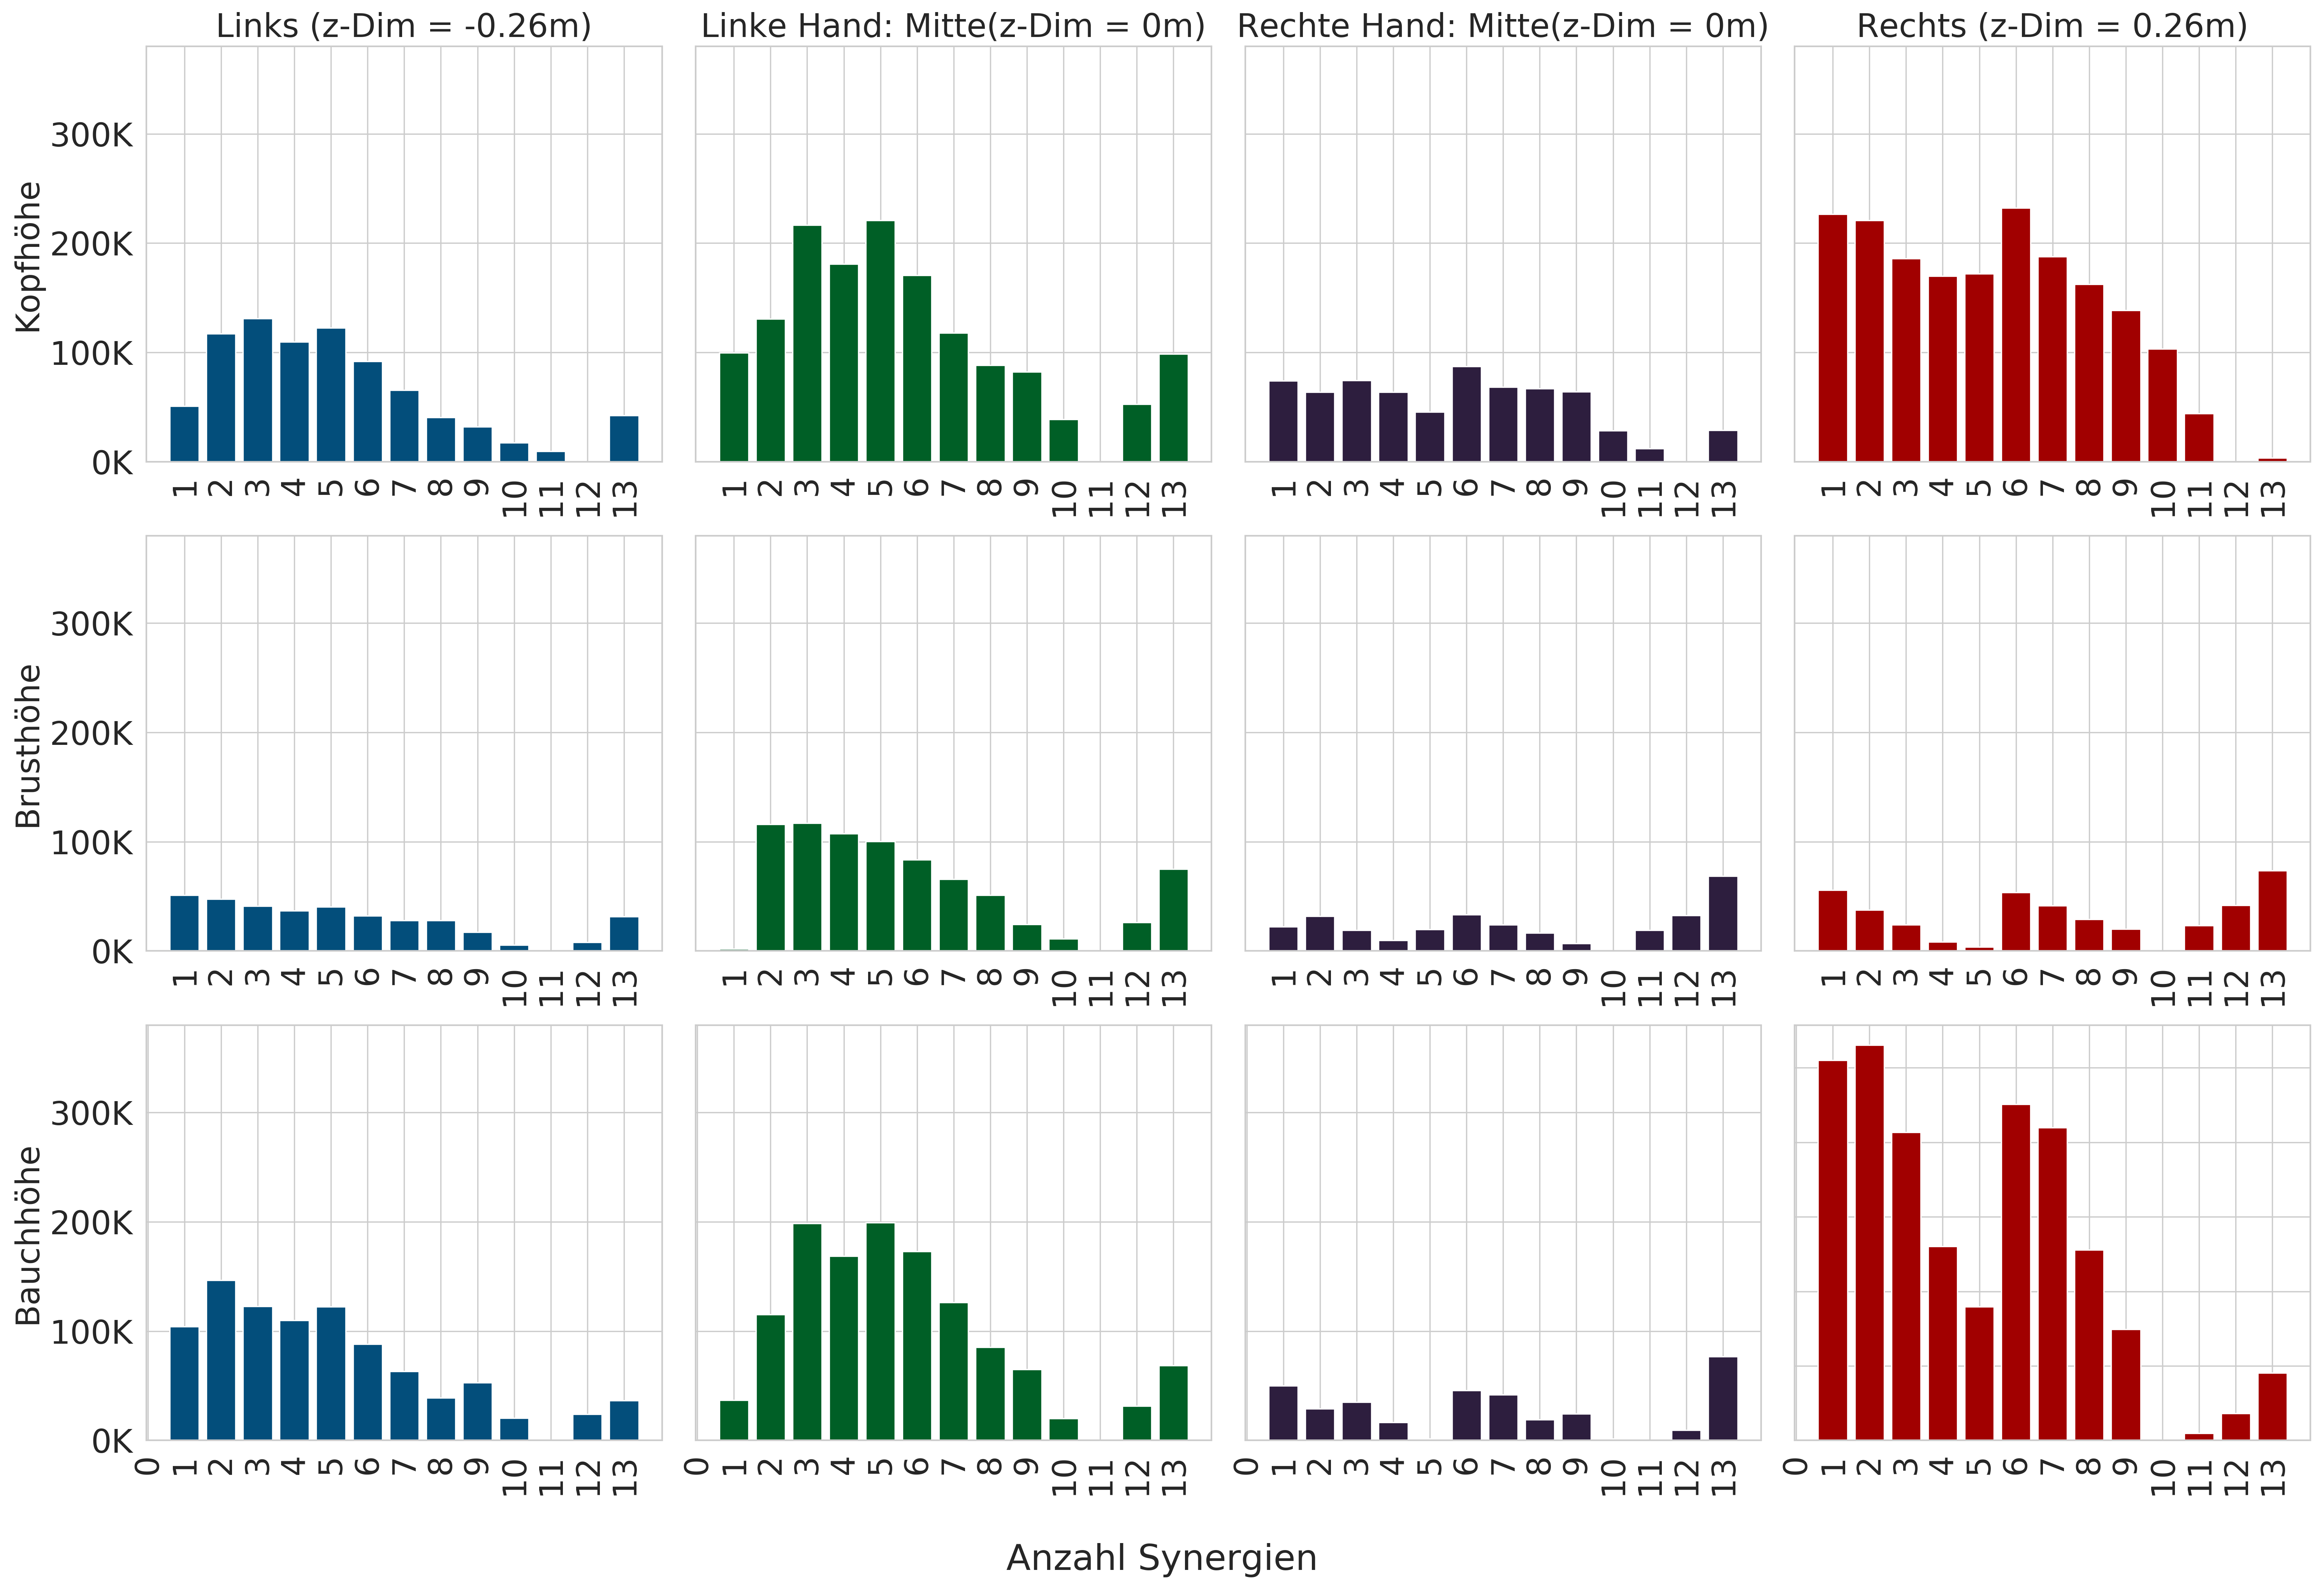

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


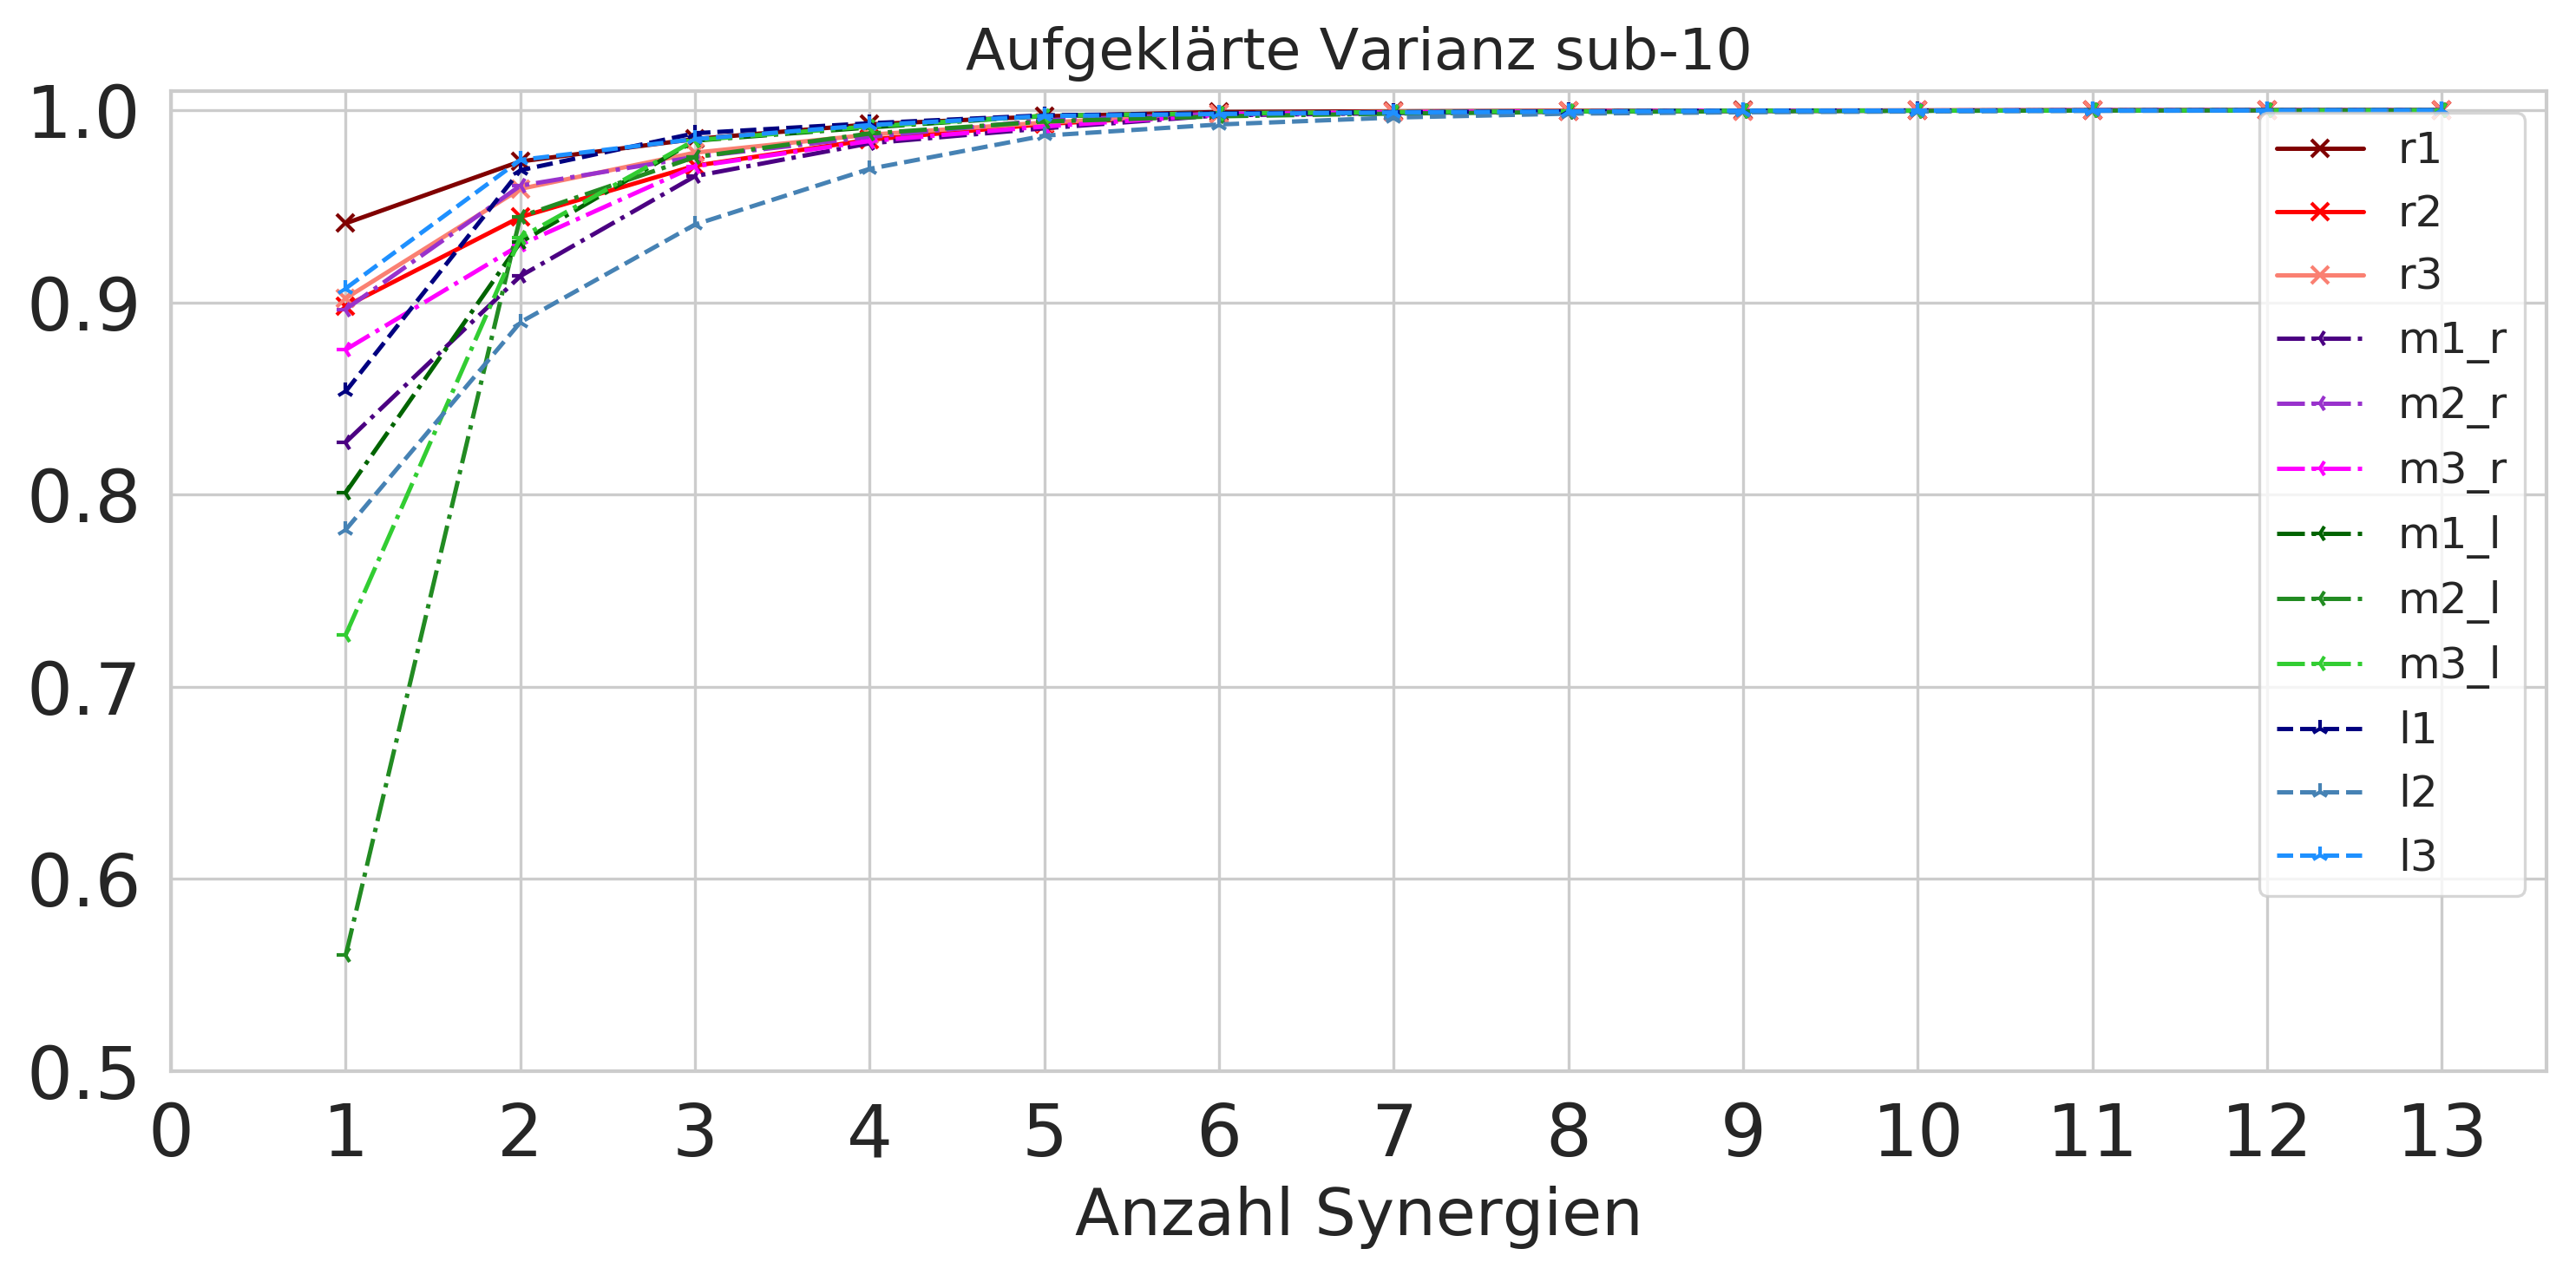

Subject Done!!


In [4]:

dir_ = '/home/michael/Desktop/model_evd/2H/*' # input directory; 1H/ -> Sub-01, Sub-02, .. 
path = '/home/michael/Desktop/model_evd/2H/group_level/' # output directory 

for subject in (glob.glob(dir_)):  # iterate through subject level folders
    subject_id = subject.split('/')[-1] # subject identifier
    print(subject_id)


    for filename in (glob.glob(subject+'/*')): 
        # iterate through target position level folders; 1H/ -> Sub-01/ -> r1, r2, ...
        pos_name = filename.split('/')[-1] # target position identifier
        print(pos_name)
        
        for x in (glob.glob(filename+'/*')): # iterate through single target pos folder
            if x.split('_')[-1] == 'vaf.csv':
                # extract Variance accounted for from df
                VAF = pd.read_csv(x)
            elif x.split('_')[-1] == 'evidence.csv' and x.split('_')[-2] == 'model':
                logPD = pd.read_csv(x, encoding='utf-8')  # extract model evidence as Log likelihood from df
                logPD = logPD['0'].values
        # sort Log-likelihoods and VAF into respective DataFrame by target position
        if pos_name == 'r1':
            r1_logPD = logPD
            r1_vaf = VAF
        elif pos_name == 'r2':
            r2_logPD = logPD
            r2_vaf = VAF
        elif pos_name == 'r3':
            r3_logPD = logPD
            r3_vaf = VAF
        elif pos_name == 'm1_l':
            m1_l_logPD = logPD
            m1_l_vaf = VAF
        elif pos_name == 'm2_l':
            m2_l_logPD = logPD
            m2_l_vaf = VAF
        elif pos_name == 'm3_l':
            m3_l_logPD = logPD
            m3_l_vaf = VAF
        elif pos_name == 'm1_r':
            m1_r_logPD = logPD
            m1_r_vaf = VAF
        elif pos_name == 'm2_r':
            m2_r_logPD = logPD
            m2_r_vaf = VAF
        elif pos_name == 'm3_r':
            m3_r_logPD = logPD
            m3_r_vaf = VAF
        elif pos_name == 'l1':
            l1_logPD = logPD
            l1_vaf = VAF
        elif pos_name == 'l2':
            l2_logPD = logPD
            l2_vaf = VAF
        elif pos_name == 'l3':
            l3_logPD = logPD
            l3_vaf = VAF

    # Plot Model Evidence
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 13),
                           gridspec_kw={'width_ratios': [5,5,5,5]})
    plt.subplots_adjust(wspace=-0.2)  # adjust space between subplots

    # Right Hand to target M1 
    ax[0][2].bar(range(1,len(m1_r_logPD)+1),m1_r_logPD,color=purples[10])
    ax[0][3].set_ylim(0,380000)
    ax[0][2].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][2].set_title('Rechte Hand: Mitte(z-Dim = 0m)', fontsize=20)
    
    # Target R1
    ax[0][3].bar(range(1, len(r1_logPD)+1),r1_logPD,color=reds[10])
    ax[0][3].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][2].set_ylim(0,380000)
    ax[0][3].set_title('Rechts (z-Dim = 0.26m)')

    # Left Hand to target M1
    ax[0][1].bar(range(1,len(m1_l_logPD)+1),m1_l_logPD,color=greens[10])
    ax[0][1].set_ylim(0,380000)
    ax[0][1].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][1].set_title('Linke Hand: Mitte(z-Dim = 0m)', fontsize=20)

    # Target L1
    ax[0][0].bar(range(1,len(l1_logPD)+1),l1_logPD,color=blues[10])
    ax[0][0].set_ylim(0,380000)
    ax[0][0].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][0].set_title('Links (z-Dim = -0.26m)', fontsize=20)
    ax[0][0].set_ylabel('Kopfhöhe', fontsize=20)
    
    # Right Hand to target M2 
    ax[1][2].bar(range(1,len(m2_r_logPD)+1),m2_r_logPD,color=purples[10])
    ax[1][3].set_ylim(0,380000)
    ax[1][2].set_xticks(np.arange(1, (len(logPD)+1), 1))

    # Target R2 
    ax[1][3].bar(range(1,len(r2_logPD)+1),r2_logPD,color=reds[10])
    ax[1][2].set_ylim(0,380000)
    ax[1][3].set_xticks(np.arange(1, (len(logPD)+1), 1))

    # Left Hand to target M2
    ax[1][1].bar(range(1,len(m2_l_logPD)+1),m2_l_logPD,color=greens[10])
    ax[1][1].set_ylim(0,380000)
    ax[1][1].set_xticks(np.arange(1, (len(logPD)+1), 1))

    # Target L2
    ax[1][0].bar(range(1,len(l2_logPD)+1),l2_logPD,color=blues[10])
    ax[1][0].set_ylim(0,380000)
    ax[1][0].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[1][0].set_ylabel('Brusthöhe', fontsize=20)

    # Right Hand to target M3     
    ax[2][2].bar(range(1,len(m3_r_logPD)+1),m3_r_logPD,color=purples[10])
    ax[2][1].set_ylim(0,380000)
    ax[2][2].set_xticks(np.arange(0, (len(logPD)+1), 1))
    
    # Target R3
    ax[2][3].bar(range(1,len(r3_logPD)+1),r3_logPD,color=reds[10])
    ax[2][2].set_ylim(0,380000)
    ax[2][3].set_xticks(np.arange(0, (len(logPD)+1), 1))

    # Left Hand to target M3
    ax[2][1].bar(range(1,len(m3_l_logPD)+1),m3_l_logPD,color=greens[10])
    ax[2][1].set_ylim(0,380000)
    ax[2][1].set_xticks(np.arange(0, (len(logPD)+1), 1))

    # Target L3
    ax[2][0].bar(range(1,len(l3_logPD)+1),l3_logPD,color=blues[10])
    ax[2][0].set_ylim(0,380000)
    ax[2][0].set_xticks(np.arange(0, (len(logPD)+1), 1))
    ax[2][0].set_ylabel('Bauchhöhe', fontsize=20)

    # specify tick params; Turn off x and y labels where redundant; rotate y Labels 
    # Row 1 Column 1; X-Axis
    ax[0][0].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',       # left ticks
       top='off',        # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 2 Column 1; X-Axis
    ax[1][0].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',        # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 3 Column 1; X-Axis
    ax[2][0].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',        # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 1 Column 2; Y-Axis
    ax[0][1].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',        # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )
    # Row 1 Column 2; X-Axis
    ax[0][1].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',        # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 1 Column 3; Y-Axis
    ax[0][2].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',        # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )
    # Row 1 Column 3; X-Axis
    ax[0][2].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',        # top ticks
       labelbottom='on', # labels along the bottom edge are off))
        labelleft='off',  # bottom labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 1 Column 4; Y-Axis
    ax[0][3].tick_params(
       axis='y',
       which='both',    # major and minor ticks
       left='off',     # left ticks
       top='off',        # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )
    # Row 1 Column 4; X-Axis
    ax[0][3].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 2 Column 2; Y-Axis
    ax[1][1].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )
    # Row 2 Column 2; X-Axis
    ax[1][1].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 2 Column 3; Y-Axis
    ax[1][2].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )
    # Row 2 Column 3; X-Axis
    ax[1][2].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels off
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 2 Column 4; Y-Axis
    ax[1][3].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )   
    # Row 2 Column 4; X-Axis
    ax[1][3].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 3 Column 2; Y-Axis
    ax[2][1].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    ) 
    # Row 3 Column 2; X-Axis
    ax[2][1].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',     # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 3 Column 3; Y-Axis
    ax[2][2].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    )  
    # Row 3 Column 3; X-Axis
    ax[2][2].tick_params(
       axis='x',
       which='both',     # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off',  # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )
    # Row 3 Column 4; Y-Axis
    ax[2][3].tick_params(
       axis='y',
       which='both',     # major and minor ticks
       left='off',     # left ticks
       top='off',         # top ticks
       labelbottom='off', # bottom labels off
        labelleft='off'  # left labels off
    ) 
    
    # Row 3 Column 4; X-Axis
    ax[2][3].tick_params(
       axis='x',
       which='both',      # major and minor ticks
       left='off',      # left ticks
       top='off',         # top ticks
       labelbottom='on', # bottom labels on
        labelleft='off', # left labels off
        labelrotation=90  # bottom labels rotated by 90°
    )

    # Change Format in which x-ticks are displayed
    ax[0][0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,
                                                            pos: '{:,.0f}'.format(x/1000) + 'K'))
    ax[1][0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,
                                                            pos: '{:,.0f}'.format(x/1000) + 'K'))
    ax[2][0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,
                                                            pos: '{:,.0f}'.format(x/1000) + 'K'))
#     ax[2][0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

    # set overall figure title
    fig.suptitle('Anzahl Synergien', y=-0.02, fontsize=22)

    fig.savefig(path+'me/'+subject_id+'_model_evidences.png') # save Figure
    plt.show()  # display Figure
    
    # Plot VAF
    fig = plt.figure(figsize=(10,5))  # create figure
    plt.title('Aufgeklärte Varianz '+ subject_id,fontsize=16)  # set overall figure title
    
    # Rightmost targets
    plt.plot(range(1,len(r1_vaf)+1), r1_vaf,  # Target R1
             marker='x', color='Maroon', label='r1')  
    plt.plot(range(1,len(r2_vaf)+1), r2_vaf,  # Target R2
             marker='x', color='red', label='r2')
    plt.plot(range(1,len(r3_vaf)+1), r3_vaf,  # Target R3
             marker='x', color='salmon', label='r3')

    # Middle targets right hand
    plt.plot(range(1,len(m1_r_vaf)+1), m1_r_vaf,
             linestyle='-.', marker='3', color='indigo', label='m1_r')
    plt.plot(range(1,len(m2_r_vaf)+1), m2_r_vaf,
             linestyle='-.', marker='3', color='darkorchid', label='m2_r')
    plt.plot(range(1,len(m3_r_vaf)+1), m3_r_vaf,
             linestyle='-.', marker='3', color='fuchsia', label='m3_r')
    
    # Middle targets left hand
    plt.plot(range(1,len(m1_l_vaf)+1), m1_l_vaf, linestyle='-.', marker='3', color='darkgreen', label='m1_l')
    plt.plot(range(1,len(m2_l_vaf)+1), m2_l_vaf, linestyle='-.', marker='3', color='forestgreen', label='m2_l')
    plt.plot(range(1,len(m3_l_vaf)+1), m3_l_vaf, linestyle='-.', marker='3', color='limegreen', label='m3_l')

    # Leftmost targets
    plt.plot(range(1,len(l1_vaf)+1), l1_vaf, linestyle='--',marker='2', color='navy', label='l1')
    plt.plot(range(1,len(l2_vaf)+1), l2_vaf, linestyle='--', marker='2', color='steelblue', label='l2')
    plt.plot(range(1,len(l3_vaf)+1), l3_vaf, linestyle='--', marker='2', color='dodgerblue', label='l3')

    # Arrange X-Ticks so that they start with the first value instead of non-infomartive Zero-Value
    plt.xticks(np.arange(0, (len(r1_vaf)+1), 1))
    plt.xlabel('Anzahl Synergien')
    plt.legend()
    plt.ylim(.50,1.01)  # set Y-lim to 50%; Change to higher % when necessary
    fig.savefig(path+'vafs/'+subject_id+'_vafs.png')  # save Figure
    plt.show()  # display Figure
    print('Subject Done!!')